# Loan Defaulter Prediction Project

Importing the libraries for preprocessing and Exploratory data analysis

In [384]:
import numpy as np  #Linear alegbra
import pandas as pd #data manipulation
import matplotlib.pyplot as plt  #plotting graphs
import seaborn as sns #visualisation
import pandas_profiling as pp
import scipy as scipy #statistics support
import re      #regular expression

# Read data file

Since the datafile is tab separated we will use the pandas read_csv function to import the datafile into the "ld" dataframe

In [385]:
ld = pd.read_csv('H:\Imarticus\Capstone Project\Python Project - Bank Lending\XYZCorp_LendingData.txt',sep="\t")

# Preprocessing of the data

First checking the basic structure of the data and its contents. 
Then we will do data profiling to get insights into the distributions of the columns.

In [386]:
ld.shape

(855969, 73)

In [387]:
ld.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


There appears to be lot of NaN's in the data in the last columns ffrom il_util.

In [388]:
ld.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
855964,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN,0
855965,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,0
855966,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN,0
855967,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN,0
855968,36271262,38982659,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,B5,...,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN,0


Similar observation is made while viewing the last 5 records of the table.
Now we will retrieve the data profiling report to able to to get a general understanding of all the variables and their distributions.

In [389]:
#profile = ld.profile_report(title='Pandas Profiling Report')
#profile.to_file(output_file="reportLoanDefaulterPredictor.html")

From profiling is it observed that a lot of columns have null values and few others have highly biased data.
1. acc_now_delinq : 99.5% zeroes
2. all_util : 98.4% missing values
3. collection_recovery_fee : 97.3% zeros
4. collections_12_mths_ex_med : 98.7% zeros
5. delinq_2yrs : 80.9% zeros
6. desc : 85.8% missing values
7. dti_joint: 99.9% missing values
8. il_util : 98.6% missing values
9. inq_fi : 98.4% missing values
10. inq_last_12m : 98.4% missing values
11. max_bal_bc : 98.4% missing values
12. mths_since_last_delinq : 51.4% missing values
13. mths_since_last_major_derog : 75.1% missing values
14. mths_since_last_record : 84.7% missing values
15. mths_since_rcnt_il: 98.5% missing values
16. open_acc_6m: 94.4% missing values
17. open_il_12m : 98.4% missing values
18. open_il_6m : 98.4% missing values
19. open_il_24m :98.4% missing values
20. open_rv_12m : 98.4% missing values
21. open_rv_24m : 98.4% missing values
22. pub_rec : 84.8% zeros
23. recoveries : 97.2% zeros
24. total_bal_il : 98.4% missing values
25. total_cu_tl : 98.4% missing values
26. total_rec_late_fee : 98.8% missing values
27. verification_status_joint : 99.9% missing values
28. annual_inc_joint : 99.9% missing values
29. tot_coll_amt : 79.1% zeros
30. policy_code : constant value 1
31. application_type : 442/855527 ratio of joint/individual
32. pymnt_plan : 32/855964 ratio of y/n values
33. emp_title: 290913 unique categories
34. id : 855969 unique values
Remove all columns which are highly biased(85% above) and with more than 45% NA's from data profiling output and all having unique values or more than 1000lac unique values
1. As we have learned that any data with more than 95 bias can bias even the results in the final model.  
2. We have decided on the threshold of 45% as if we had allowed for more than 40% NA's we would be estimating more than half    the data available to us and this coulc lead to incorrect results in the output. Initially we had decided on 30% threshold for NA's but later cosidered it to 40% percent. (As in the industry they take 30% threshold and in very rare cases they choose 50% threshold so we also thought of that aspect and rounded up to midway between the max and min thresholds for NA's percent acceptance in a column.
3. We are taking 1 lac unique values for categorical variable as having more than that no of bins will only complicate the model and also will make the model slower in execution and might make the model over fitted. and also it is not feasible to understand th edistribution using graphs with such huge no of unique categories in a single varible.

In [390]:
ldCleaned=ld.drop(["all_util","acc_now_delinq","annual_inc_joint",
                      "collection_recovery_fee","collections_12_mths_ex_med",
                      "desc","dti_joint","il_util","inq_fi",
                      "inq_last_12m","max_bal_bc","mths_since_last_major_derog",
                      "mths_since_last_record","mths_since_rcnt_il","open_acc_6m",
                      "open_il_12m","open_il_24m","open_il_6m","open_rv_12m",
                      "open_rv_24m","recoveries","tot_coll_amt",
                      "total_bal_il","total_cu_tl","total_rec_late_fee",
                      "verification_status_joint","id","policy_code",
                      "application_type","pymnt_plan","mths_since_last_delinq","emp_title"],axis=1).copy()

In [391]:
ldCleaned.member_id.nunique()

855969

As all the records are unique removing the column from analysis

In [392]:
ldCleaned=ldCleaned.drop(["member_id"],axis=1).copy()

Checking the shape of the dataframe

In [393]:
ldCleaned.shape

(855969, 40)

In [394]:
ldCleaned.dtypes

loan_amnt              float64
funded_amnt            float64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
purpose                 object
title                   object
zip_code                object
addr_state              object
dti                    float64
delinq_2yrs            float64
earliest_cr_line        object
inq_last_6mths         float64
open_acc               float64
pub_rec                float64
revol_bal              float64
revol_util             float64
total_acc              float64
initial_list_status     object
out_prncp              float64
out_prncp_inv          float64
total_pymnt            float64
total_pymnt_inv        float64
total_rec_prncp        float64
total_re

Function to get all the numeric variable column names to filter the ldCleaned dataset with it for corrplot

In [395]:
def colNum(df):
    col=pd.Series([])
    count=0
    for i in df.columns:
        if (df[i].dtype!="object"):
            col[count]=i
            count=count+1
    return col
colnum=colNum(ldCleaned)

Testing if we got all column names with numeric datatype

In [396]:
colnum

0            loan_amnt
1          funded_amnt
2      funded_amnt_inv
3             int_rate
4          installment
5           annual_inc
6                  dti
7          delinq_2yrs
8       inq_last_6mths
9             open_acc
10             pub_rec
11           revol_bal
12          revol_util
13           total_acc
14           out_prncp
15       out_prncp_inv
16         total_pymnt
17     total_pymnt_inv
18     total_rec_prncp
19       total_rec_int
20     last_pymnt_amnt
21         tot_cur_bal
22    total_rev_hi_lim
23         default_ind
dtype: object

Plot the correlation plot using the heat-map.

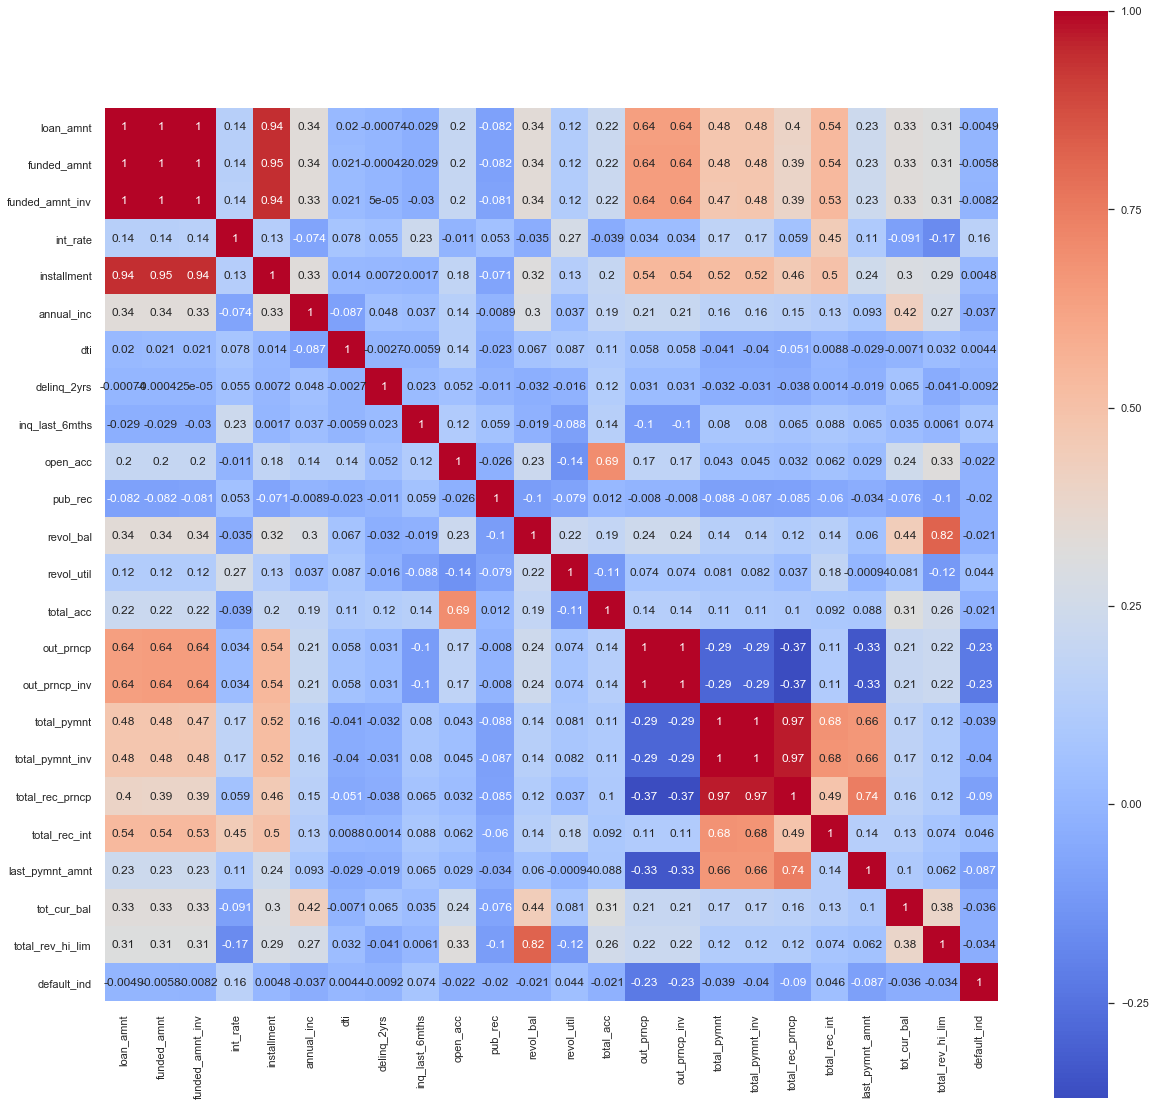

In [397]:
plt.figure(figsize=(20,20))
sns.heatmap(ldCleaned[colnum].corr(),annot=True,square=True,cmap="coolwarm") #annot: If True, write the data value in each cell
plt.show()

From the heatmap below columns are highly correlated:

1. Funded amount-loan amount-funded amount by investors As we are concerned with the funded amount an dloan amount./ the amount funded by investors has no direct impact on whether the customer will default or not. Its completely irrelevant field. Therefore dropping that field As funded amount directly impacts the customers defaulter status we will keep the funded amount. But if the loan amount is higher than the funded amount, there are chances that the customer may not be able to repay the funded amount given his plans may fail is loan amount (amount needed to succeed on his task) is far greater than the amount funded by the bank. Therefore we will take the difference between the Loan amount and funded amount for analysis. As it could have a direct impact on the defaulter status of the customer.

2. Installment amount-Funded amount-loan_amount-funded amount by investors The installment is directly proportional to the funded amount/loan amount/funded_amnt_inv. So we can instead calculate the funded amount to installment ratio for our analysis.Therefore we will remove this field directly.

3. Total_revolving high credit limit with revolving balance Total revolving high credit limit meaning the max credit that the customer holds across all accounts. Whereas the revolving balance is the available credit limit left with the customer that he can use. So the high limit doesnt actually play a role since even if the high limit is of 100000/month but the expenses of the customer are above 100000 then the field doesnt provide insight into the defaulter status, as the higher the credit limit there could be a possibility of high expenses or low expenses. We cannot comment on that. And without that factor into picture we cannot analyse the impact of that field on the defaulter status. Therefore revolving balance helps in this case. It tells the available balance across all accounts that the person can use. Meaning is the balance is always low we can infer he may have a high probability of becoming a defaulter whereas if the balance is consistently higher we may infer that he has a lower probability of being defaulter

4. out principal amount by investors and out principal amount: Out principal amount means the total amount remaining out of the principal amount funded. and out principal by investors is the amount remaining of the total principal amount funded by investors. Here the customer will not know and care who funded the amount. And his defaulter status will never depend on the amount funded by investors. Therefore we will remove the out principal outstanding amount funded by investors from the analysis. We will retain however the total out principal outstanding amount as the amount of principal matters to the customer that he has been paying. It may have a direct impact on the defaulter status of the customer.

5. total payment by investors - total payment -total received principal :Total payment by investors , total payment and total received principal. Of these the total payment received from the amount invested by investors has no impact on whether the person will default or not. As the customer has no knowledge and concern of who funded the amount. So we will remove this column. The total received principal and the outstanding principal will capture the same information in different angles. Therefore we can retain either of the two columns, and so we remove the total received principal column. Total payment received since the other collinear columns are removed can be safely kept for analysis, as the total payment received includes both the principal and interest received and it may be of concern to the customer how much he is repaying at some point of time in period and he may default on his payments. Therefore we retain this column for analysis

# Feature Engineering

In [398]:
ldCleaned["loan_funded_diff"]=ldCleaned.loan_amnt-ldCleaned.funded_amnt

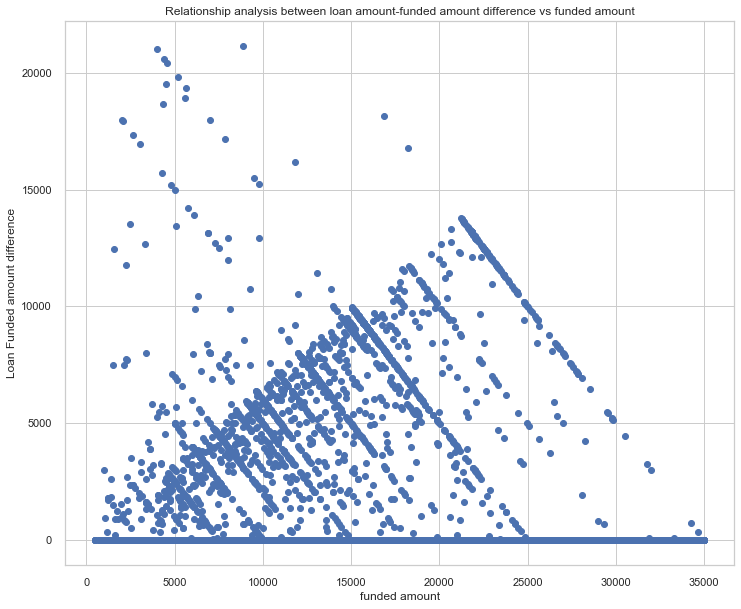

In [399]:
plt.scatter(ldCleaned.funded_amnt,ldCleaned.loan_funded_diff)
plt.xlabel("funded amount")
plt.ylabel("Loan Funded amount difference")
plt.title("Relationship analysis between loan amount-funded amount difference vs funded amount")
plt.show()

In [400]:
ldCleaned=ldCleaned.drop(["loan_amnt","funded_amnt_inv"],axis=1).copy()

Since we are going to take ratio of funded amount to installment : we will be checking if installment amount has 0 in it.

In [401]:
count=0
for i in ldCleaned.installment:
    if i == 0:
        count=count+1
count

0

In [402]:
ldCleaned["fundedtoinstallmentratio"]=ldCleaned.funded_amnt/ldCleaned.installment

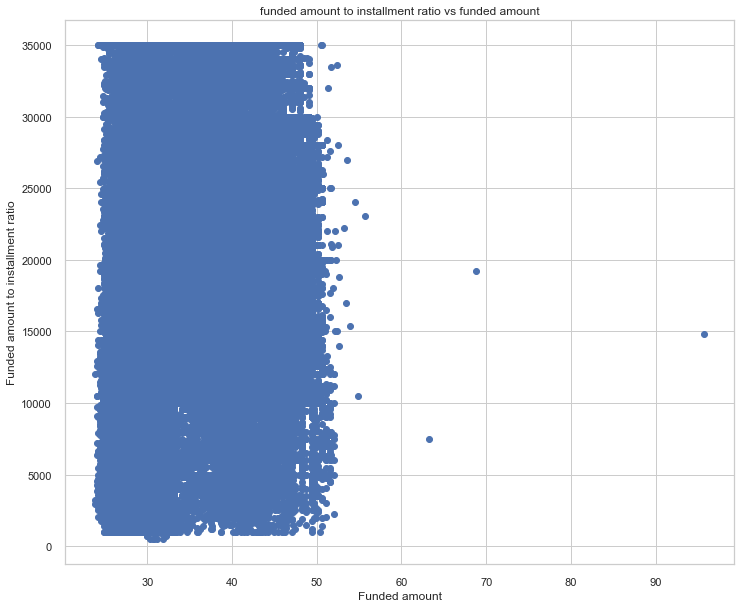

In [403]:
plt.scatter(ldCleaned.fundedtoinstallmentratio,ldCleaned.funded_amnt)
plt.xlabel("Funded amount")
plt.ylabel("Funded amount to installment ratio")
plt.title("funded amount to installment ratio vs funded amount")
plt.show()

In [404]:
ldCleaned=ldCleaned.drop(["installment"],axis=1).copy()

In [405]:
ldCleaned=ldCleaned.drop(["out_prncp_inv","total_pymnt_inv","total_rec_prncp"],axis=1)

In [406]:
ldCleaned=ldCleaned.drop(["total_rev_hi_lim"],axis=1).copy()

In [407]:
ldCleaned.shape

(855969, 35)

Checking the heatmap again to see if any correlations in existing variables exist.

In [408]:
colnum2=colNum(ldCleaned)

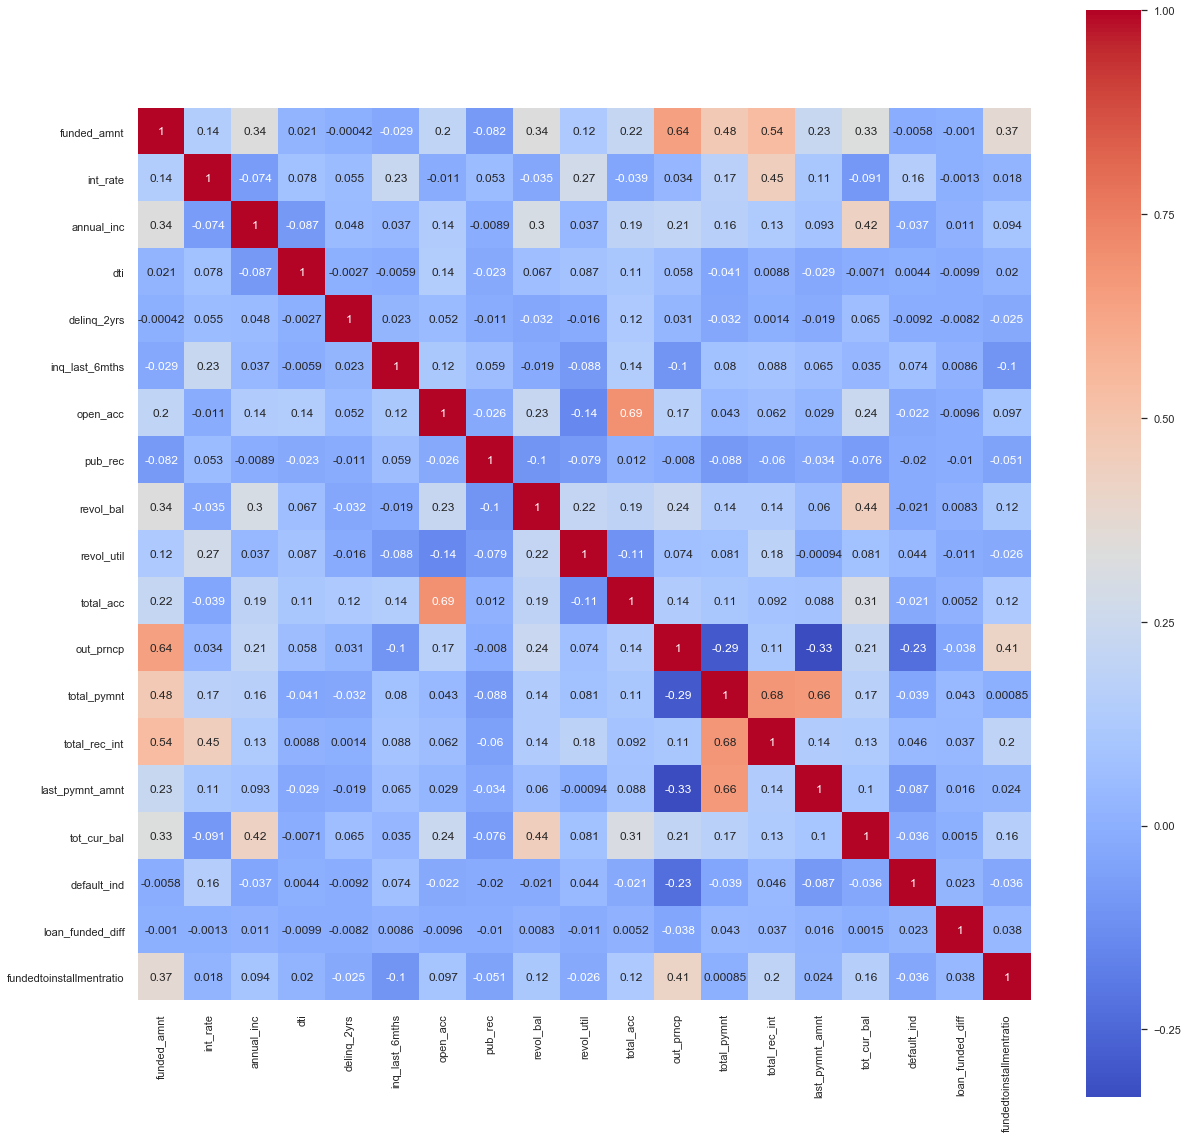

In [409]:
plt.figure(figsize=(20,20))
sns.heatmap(ldCleaned[colnum2].corr(),annot=True,square=True,cmap="coolwarm")
plt.show()

6. total payment and total received interest columns are correlated. As we have already retained outstaning principal amount and the funded amount, we thus easily have the impact of interest amount pending on the defaulter status. Therefore there is no need to retain the total received interest. However as also we are retaining the total_payment column we here too have the impact of total received interest as outstanding principal and funded amount are present. Therefore we will retain the total payment column only

In [410]:
ldCleaned=ldCleaned.drop(["total_rec_int"],axis=1).copy()

In [411]:
ldCleaned.shape

(855969, 34)

End of feature engineering and initial column filtering for numeric column variables. Now we will filter columns for categorical variables where ever any correlation existes between the categorical variables

# Categorial variable initial filtering of columns

To analyse categorical variables defining a function to get all categorical variable names (object)

In [412]:
def colCat(df):
    col=pd.Series([])
    count=0
    for i in df.columns:
        if (df[i].dtype=="object"):
            col[count]=i
            count=count+1
    return col
colcat=colCat(ldCleaned)

Checking if we are getting all categorical variables

In [413]:
colcat

0                    term
1                   grade
2               sub_grade
3              emp_length
4          home_ownership
5     verification_status
6                 issue_d
7                 purpose
8                   title
9                zip_code
10             addr_state
11       earliest_cr_line
12    initial_list_status
13           last_pymnt_d
14           next_pymnt_d
15     last_credit_pull_d
dtype: object

Printing all objects to check the contents if categorical or datetime variables, and as title and purpose seems to be related and so also grade and subgrade. checking if they are related byy understanding data in it.

In [414]:
print("grade:",ldCleaned.grade.head(3))
print("subgrade: ",ldCleaned.sub_grade.head(3))
print("purpose: ",ldCleaned.purpose.head(3))
print("title: ",ldCleaned.title.head(3))
print("grade : ",ldCleaned.grade.isnull().sum())
print("subgrade : ",ldCleaned.sub_grade.isnull().sum())
print("purpose : ",ldCleaned.purpose.isnull().sum())
print("title : ",ldCleaned.title.isnull().sum())
print("grade Uniquecount: ",ldCleaned.grade.nunique())
print("subgrade Uniquecount: ",ldCleaned.sub_grade.nunique())
print("purpose Uniquecount: ",ldCleaned.purpose.nunique())
print("title Uniquecount: ",ldCleaned.title.nunique())

grade: 0    B
1    C
2    C
Name: grade, dtype: object
subgrade:  0    B2
1    C4
2    C5
Name: sub_grade, dtype: object
purpose:  0       credit_card
1               car
2    small_business
Name: purpose, dtype: object
title:  0                Computer
1                    bike
2    real estate business
Name: title, dtype: object
grade :  0
subgrade :  0
purpose :  0
title :  33
grade Uniquecount:  7
subgrade Uniquecount:  35
purpose Uniquecount:  14
title Uniquecount:  60991


1. As we are not going to do analysis as per date columns we will be removing all the date fields.
2. Sub grade and grade has relationship that the sub grade is the most atomic level data of grade field. As we want to retain maximum information we will retain subgrade field and remove the grade field.
3. Purpose and title have the same data only in more elaborated format in title. There are 60991 unique values and in purpose just 14 unique values. Therefore even if title contains more information further investigation needs to be done if the no of unique records are less and the unique categories count is increased due to typos.

Checking unique values in title just to be sure of the assumption made

In [415]:
pd.Series(ldCleaned.title.unique()).head(20)

0                                  Computer
1                                      bike
2                      real estate business
3                                  personel
4                                  Personal
5     My wedding loan I promise to pay back
6                                      Loan
7                           Car Downpayment
8      Expand Business & Buy Debt Portfolio
9               Building my credit history.
10               High intrest Consolidation
11                            Consolidation
12                                  freedom
13                            citicard fund
14                               Other Loan
15                  Debt Consolidation Loan
16                                     Home
17                                  Holiday
18                                  Medical
19      lowerratemeanseasiertogetoutofdebt!
dtype: object

As we can see there are lot of typos in the data, which has led to the increased categories in the title. Therefore we retain purpose column, since its refined than title

In [416]:
print(ldCleaned.grade.head(5),ldCleaned.sub_grade.head(5))

0    B
1    C
2    C
3    C
4    B
Name: grade, dtype: object 0    B2
1    C4
2    C5
3    C1
4    B5
Name: sub_grade, dtype: object


Therefore it is now confirmed that sub grade is further segregation of grade, and to retain the most information  of the data we will retain sub_grade and remove the grade field.

In [417]:
ldCleaned=ldCleaned.drop(["title","grade"],axis=1).copy()

In [418]:
ldCleaned.shape

(855969, 32)

Initial analysis for remaining variables

In [419]:
colcat1=colCat(ldCleaned).copy()
colcat1

0                    term
1               sub_grade
2              emp_length
3          home_ownership
4     verification_status
5                 issue_d
6                 purpose
7                zip_code
8              addr_state
9        earliest_cr_line
10    initial_list_status
11           last_pymnt_d
12           next_pymnt_d
13     last_credit_pull_d
dtype: object

1 Zip code and Address state. As we already have the address state we will remove the zip code from analysis.

In [420]:
ldCleaned=ldCleaned.drop(["zip_code"],axis=1).copy()

In [421]:
print("earliest_cr_line :",ldCleaned.earliest_cr_line.head(2))
print("last_pymnt_d :",ldCleaned.last_pymnt_d.head(2))
print("next_pymnt_d :",ldCleaned.next_pymnt_d.head(2))
print("last_credit_pull_d :",ldCleaned.last_credit_pull_d.head(2))

earliest_cr_line : 0    Jan-1985
1    Apr-1999
Name: earliest_cr_line, dtype: object
last_pymnt_d : 0    Jan-2015
1    Apr-2013
Name: last_pymnt_d, dtype: object
next_pymnt_d : 0    NaN
1    NaN
Name: next_pymnt_d, dtype: object
last_credit_pull_d : 0    Jan-2016
1    Sep-2013
Name: last_credit_pull_d, dtype: object


In [422]:
print(ldCleaned.last_pymnt_d.tail(2))

855967    Jan-2016
855968    Jan-2016
Name: last_pymnt_d, dtype: object


As we are not doing analysis as per time we will be removing all the date columns from the analysis. Though please note that we could have done the analysis as to in which month we get maximum defaulters or which year we get maximum defaulters and is there a trend in it. But it would become very complex to analyse that so we are dropping that analysis from our study as of now.

In [423]:
ldCleaned=ldCleaned.drop(["earliest_cr_line","last_pymnt_d","next_pymnt_d","last_credit_pull_d"],axis=1).copy()

In [424]:
ldCleaned.shape

(855969, 27)

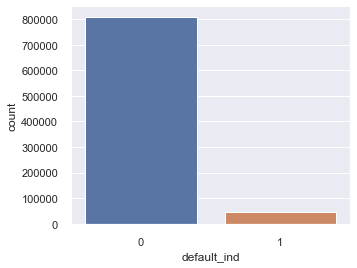

In [425]:
sns.set(rc={"figure.figsize":(5,4)})
sns.countplot(x="default_ind",data=ldCleaned)
plt.show()

# Exploratory data analysis of categorical variables

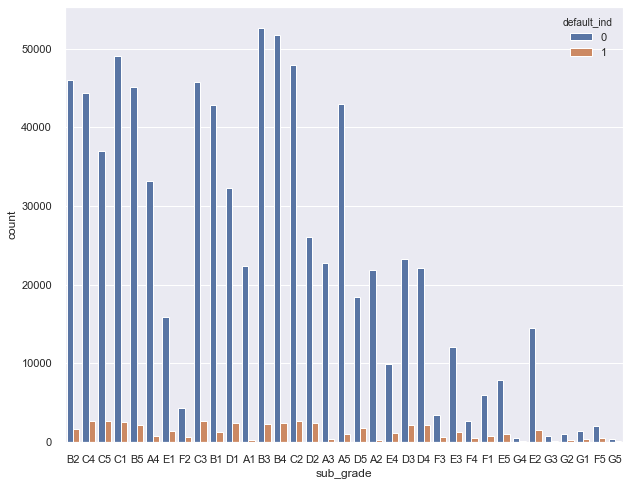

In [426]:
sns.set(rc={"figure.figsize":(10,8)})
sns.countplot(x="sub_grade",hue="default_ind",data=ldCleaned)
plt.show()

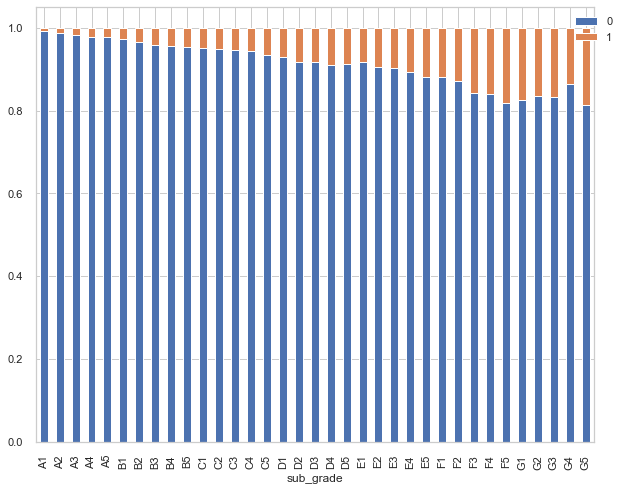

In [427]:
sns.set(rc={"figure.figsize":(10,8)})
sns.set_style("whitegrid")
stack=ldCleaned.groupby("sub_grade")["default_ind"].value_counts(normalize=True).unstack()
stack.plot(kind="bar",stacked=True )
plt.legend(loc='upper center',bbox_to_anchor=(1,1))
plt.show()

The above chart has normalized all the counts across categories and showed the percentage of per category count involved in defaulter status=0/1. This gives us an idea that the subgrade G1-G5 has the highest percentage of defaulters though from the countplot it is cleaer that percentage of people who have got loan unde the sub grade = G1-G4 category are very less. Similarly the total percentage of defaulters in each categories increases from lowest in A1 to highest G5 with slight fluctuation in G1-G4. This implies that the bank should refrain from giving loans to the people who are rated at lower subgrades.

In [428]:
ldFinalDataset=pd.DataFrame({})
ldFinalDataset=pd.concat([ldFinalDataset,ldCleaned.sub_grade],axis=1).copy()

In [429]:
ldFinalDataset.columns

Index(['sub_grade'], dtype='object')

In [430]:
colcat1.head(2)

0         term
1    sub_grade
dtype: object

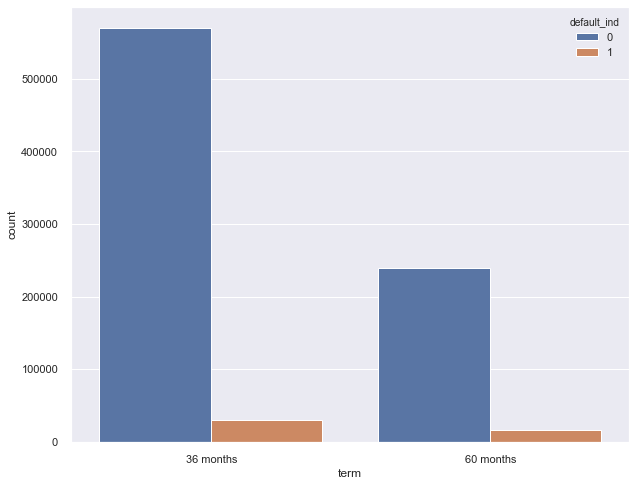

In [431]:
sns.set(rc={"figure.figsize":(10,8)})
sns.countplot(x="term",hue="default_ind",data=ldCleaned)
plt.show()

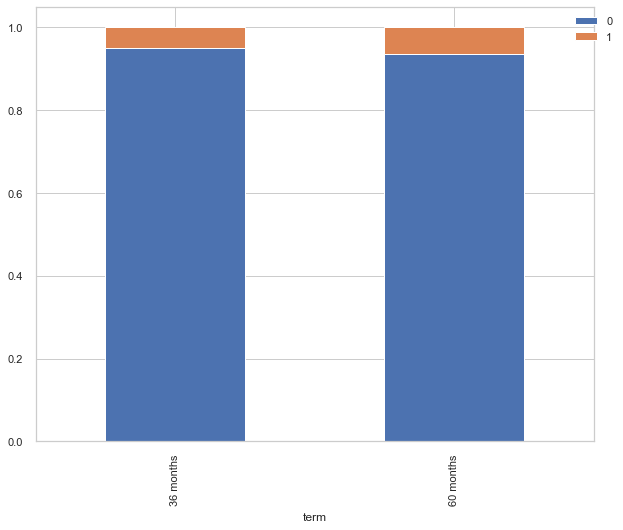

In [432]:
sns.set(rc={"figure.figsize":(10,8)})
sns.set_style("whitegrid")
stack=ldCleaned.groupby("term")["default_ind"].value_counts(normalize=True).unstack()
stack.plot(kind="bar",stacked=True )
plt.legend(loc='upper center',bbox_to_anchor=(1,1))
plt.show()

This indicates that though the percentage of loans for 60months duration term are lower we have maximum defaulters in that term than the 36 months duration. We need to check the chi square distribution for this variable to see if it really impacts the target variable or not.

In [433]:
ldFinalDataset=pd.concat([ldFinalDataset,ldCleaned.term],axis=1).copy()
ldFinalDataset.columns

Index(['sub_grade', 'term'], dtype='object')

In [434]:
colcat1.head(3)

0          term
1     sub_grade
2    emp_length
dtype: object

In [435]:
ldCleaned.emp_length.isnull().sum()

43061

As we dont know the employment length its best to assume that the employment length is 0 years.

Checking for available categories in emp_length

In [436]:
ldCleaned.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

Therefore the 0 years falls into the category < 1 year. Hence filling < 1 year in the null values

In [437]:
ldCleaned.emp_length.fillna("< 1 year",inplace=True)

In [438]:
ldCleaned.emp_length.isnull().sum()

0

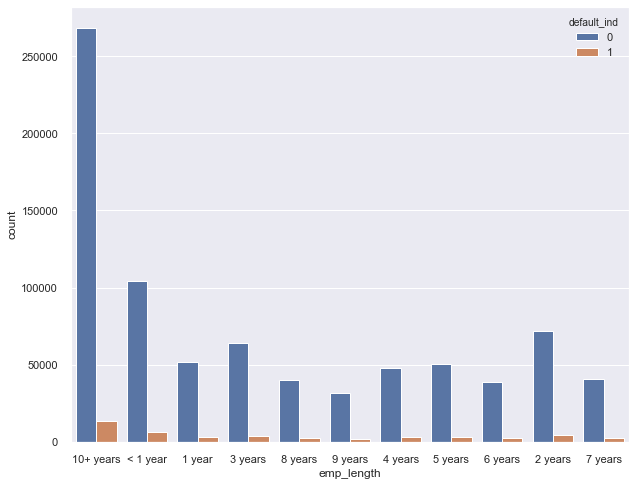

In [439]:
sns.set(rc={"figure.figsize":(10,8)})
sns.countplot(x="emp_length",hue="default_ind",data=ldCleaned)
plt.show()

In [440]:
ldCleaned["emp_length_ord"]=pd.Categorical(ldCleaned.emp_length,['10+ years','9 years','8 years','7 years',
                                                '6 years','5 years','4 years','3 years',
                                                '2 years','1 year','< 1 year'],ordered=True).copy()

The graph shows that the no of people applying for loan with more than 10 years experience is way higher than people with less years experience than that. The second largest loan appliers are from the <1 year category of employment length. So which categories people are more defaulters according to the percent of applied loans in that category is be to be further investigated by stackplot.

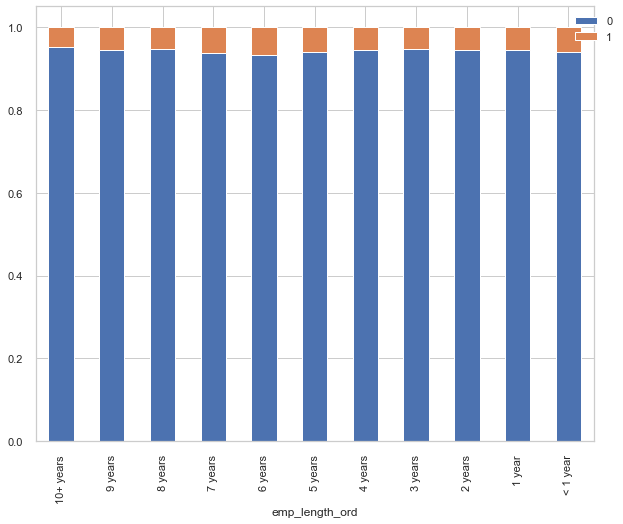

In [441]:
sns.set(rc={"figure.figsize":(10,8)})
sns.set_style("whitegrid")
stack=ldCleaned.groupby("emp_length_ord")["default_ind"].value_counts(normalize=True).unstack()
stack.plot(kind="bar",stacked=True )
plt.legend(loc='upper center',bbox_to_anchor=(1,1))
plt.show()

It is appeared that the people defaulting from each category is almost same except their slight difference in the no of people defaulting in 10+ years experience and people with <1 year experience with 10+ being on the lower end of defaulters. Between 6 years also shows an unsual increase in defaulters. We need to check with chi square test if this variable has a significant impact on the defaulter status or not.

In [442]:
ldFinalDataset=pd.concat([ldFinalDataset,ldCleaned.emp_length_ord],axis=1).copy()
ldFinalDataset.columns

Index(['sub_grade', 'term', 'emp_length_ord'], dtype='object')

In [443]:
colcat1.head(4)

0              term
1         sub_grade
2        emp_length
3    home_ownership
dtype: object

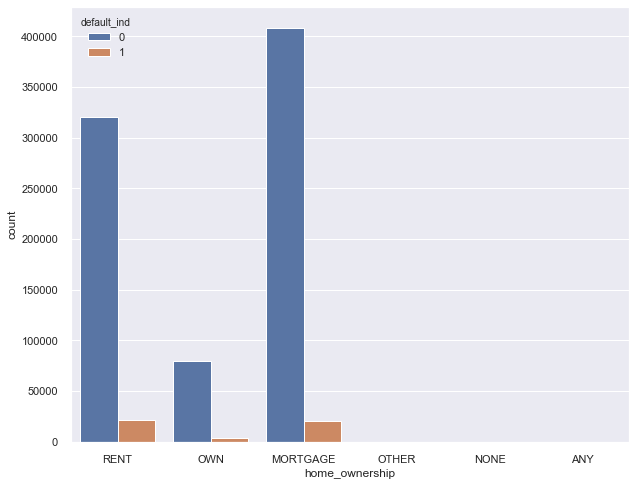

In [444]:
sns.set(rc={"figure.figsize":(10,8)})
sns.countplot(x="home_ownership",hue="default_ind",data=ldCleaned)
plt.show()

In [445]:
ldCleaned.home_ownership.value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

It is appeared that the number of records in the other/none/any category is way lower than the other three categories. Also it is seen that the people with home_ownership as mortgage and rent are applying more for loan than with own house. We need to investigate the percent of defaulter per category against the applied loans in that category

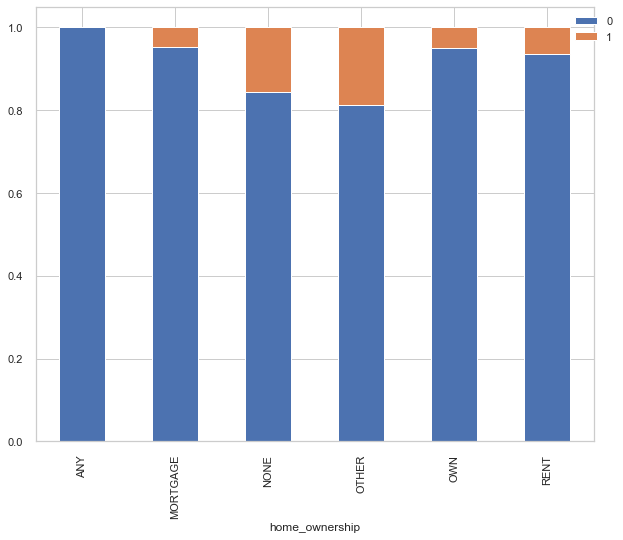

In [446]:
sns.set(rc={"figure.figsize":(10,8)})
sns.set_style("whitegrid")
stack=ldCleaned.groupby("home_ownership")["default_ind"].value_counts(normalize=True).unstack()
stack.plot(kind="bar",stacked=True )
plt.legend(loc='upper center',bbox_to_anchor=(1,1))
plt.show()

We need to combine the other none and any category since there are less records in those categories. and reanlyse the percent count per category: as per the data dictionary there are only 4 categories: other/rent/mortgage/own.

In [447]:
def Filter(string , substr):
    count=0
    values=pd.Series([])
    for i in string:
        for j in substr:
            if i.find(j) == -1:
                continue
            else:
                values[count]=i
                count=count+1
    return values

string = list(ldCleaned['home_ownership'])
substr = ["ANY","NONE"]

In [448]:
matchho_other=Filter(string,substr)
print("head", matchho_other.head())
print("tail",matchho_other.tail())

head 0    NONE
1    NONE
2    NONE
3    NONE
4    NONE
dtype: object
tail 43    NONE
44    NONE
45     ANY
46     ANY
47     ANY
dtype: object


In [449]:
ldCleaned.loc[ldCleaned.home_ownership.isin(matchho_other),'home_ownership'] = "OTHER" 

In [450]:
ldCleaned.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

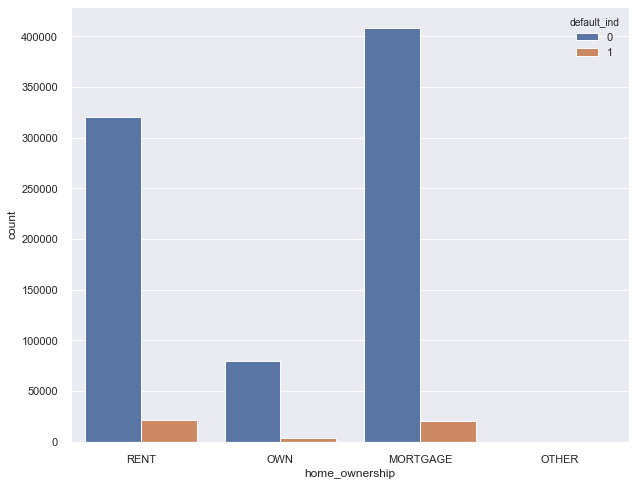

In [451]:
sns.set(rc={"figure.figsize":(10,8)})
sns.countplot(x="home_ownership",hue="default_ind",data=ldCleaned)
plt.show()

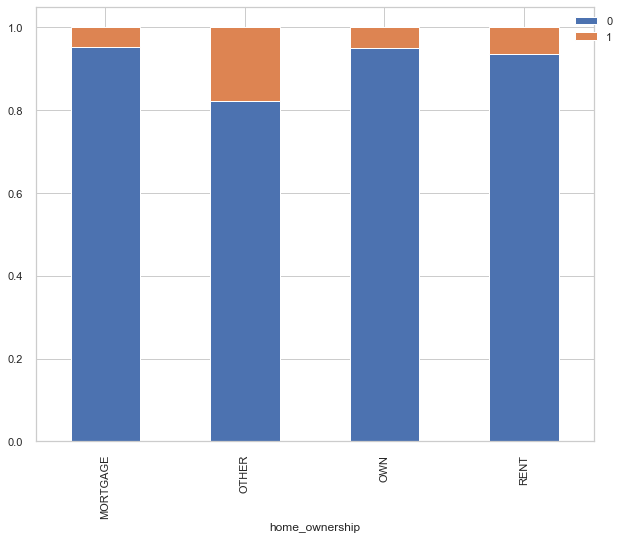

In [452]:
sns.set(rc={"figure.figsize":(10,8)})
sns.set_style("whitegrid")
stack=ldCleaned.groupby("home_ownership")["default_ind"].value_counts(normalize=True).unstack()
stack.plot(kind="bar",stacked=True )
plt.legend(loc='upper center',bbox_to_anchor=(1,1))
plt.show()

It is appeared that the other category has larger percentage of defaulters. Next comes Rented house category which has secodn largest percentage of defaulters. Therefore this variable is having an impact on the defaulter status. So we will check its chi square distribution later.

In [453]:
ldFinalDataset=pd.concat([ldFinalDataset,ldCleaned.home_ownership],axis=1).copy()
ldFinalDataset.columns

Index(['sub_grade', 'term', 'emp_length_ord', 'home_ownership'], dtype='object')

In [454]:
colcat1.head(5)

0                   term
1              sub_grade
2             emp_length
3         home_ownership
4    verification_status
dtype: object

In [455]:
print("unique values in verification status :",ldCleaned.verification_status.unique())
print("value counts :",ldCleaned.verification_status.value_counts())
print("null count",ldCleaned.verification_status.isnull().sum())

unique values in verification status : ['Verified' 'Source Verified' 'Not Verified']
value counts : Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64
null count 0


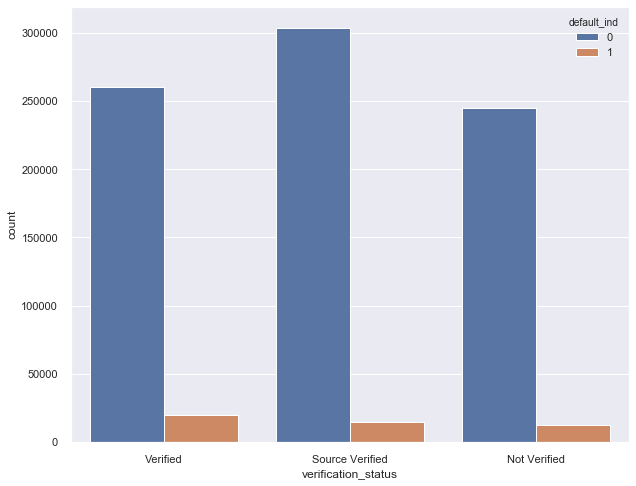

In [456]:
sns.set(rc={"figure.figsize":(10,8)})
sns.countplot(x="verification_status",hue="default_ind",data=ldCleaned)
plt.show()

The no of loan appliers with source verified are higher than the other two categories. Though we need to still check if the percent of loan appliers from which categories has higher defaulter ratio with respect to the defaulters in that category

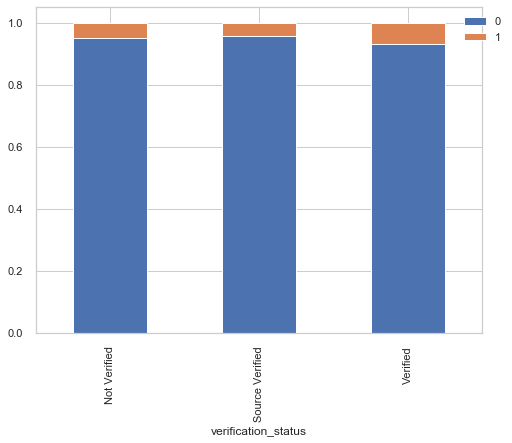

In [457]:
sns.set(rc={"figure.figsize":(8,6)})
sns.set_style("whitegrid")
stack=ldCleaned.groupby("verification_status")["default_ind"].value_counts(normalize=True).unstack()
stack.plot(kind="bar",stacked=True )
plt.legend(loc='upper center',bbox_to_anchor=(1,1))
plt.show()

The verified people are likely to default more than the source verified and not verified. So it is advisable before giving loan that the source be verified so that the probability of defaulting reduces. This variable needs further investigation if it has significant impact on the target variable or not, for that we will see the chi square distribution for it later.

In [458]:
ldFinalDataset=pd.concat([ldFinalDataset,ldCleaned.verification_status],axis=1).copy()
ldFinalDataset.columns

Index(['sub_grade', 'term', 'emp_length_ord', 'home_ownership',
       'verification_status'],
      dtype='object')

In [459]:
colcat.head(8)

0                   term
1                  grade
2              sub_grade
3             emp_length
4         home_ownership
5    verification_status
6                issue_d
7                purpose
dtype: object

In [460]:
print("unique values in purpose :",ldCleaned.purpose.unique())
print("value counts :",ldCleaned.purpose.value_counts())
print("null count",ldCleaned.purpose.isnull().sum())

unique values in purpose : ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
value counts : debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: purpose, dtype: int64
null count 0


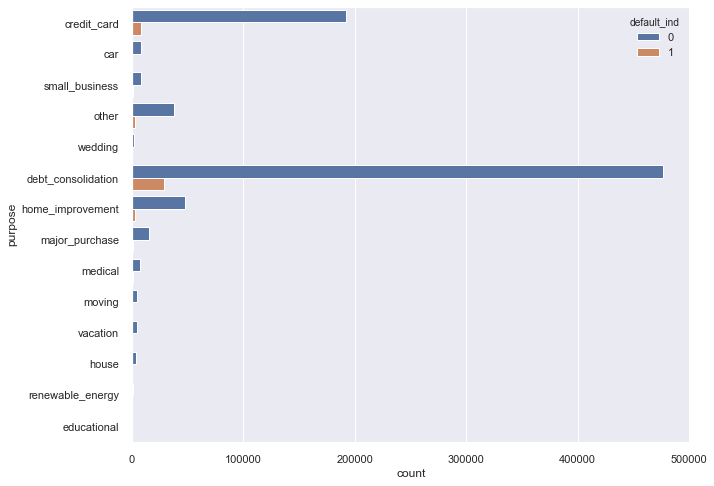

In [461]:
sns.set(rc={"figure.figsize":(10,8)})
sns.countplot(y="purpose",hue="default_ind",data=ldCleaned)
plt.show()

Maximum people have applied loan for debt consolidation and credit card. Very few compared to that apply loan for other purposes. We need to see the impact of each category by checking the percent of that category which is under defaulter per category

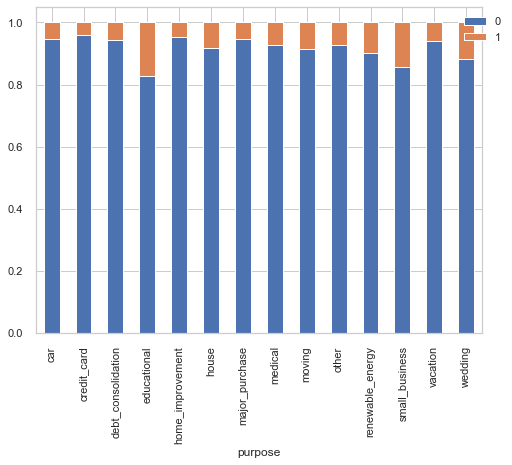

In [462]:
sns.set(rc={"figure.figsize":(8,6)})
sns.set_style("whitegrid")
stack=ldCleaned.groupby("purpose")["default_ind"].value_counts(normalize=True).unstack()
stack.plot(kind="bar",stacked=True )
plt.legend(loc='upper center',bbox_to_anchor=(1,1))
plt.show()

Maximum ratio of defaulters according to no of applicants in each category to their default ratio is higher in educational/small businesses. Overall we can see a significant impact of the category on the defaulter status. We need to confirm this observation using the chi square distribution for this column.

In [463]:
ldFinalDataset=pd.concat([ldFinalDataset,ldCleaned.purpose],axis=1).copy()
ldFinalDataset.columns

Index(['sub_grade', 'term', 'emp_length_ord', 'home_ownership',
       'verification_status', 'purpose'],
      dtype='object')

In [464]:
colcat2=colCat(ldCleaned)

In [465]:
colcat2.head(10)

0                   term
1              sub_grade
2             emp_length
3         home_ownership
4    verification_status
5                issue_d
6                purpose
7             addr_state
8    initial_list_status
dtype: object

In [466]:
stackAS=pd.DataFrame(ldCleaned["addr_state"].value_counts())
print(stackAS.head())
stackAS.index.name="Value"
stackAS.reset_index(inplace=True)
stackAS.columns=["addr_state","count"]
print(stackAS.columns)
stackAS.columns
stackAS.head()

    addr_state
CA      125172
NY       71114
TX       68708
FL       58639
IL       34379
Index(['addr_state', 'count'], dtype='object')


,addr_state,count
0,CA,125172
1,NY,71114
2,TX,68708
3,FL,58639
4,IL,34379


Import libraries for geographic plots

In [467]:
import chart_studio.plotly as py 
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 

In [468]:
data1 = dict(type = 'choropleth', 
  
            # location: Arizoana, California, Newyork 
            locations = stackAS["addr_state"], 
              
            # States of USA 
            locationmode = 'USA-states', 
              
            # colorscale can be added as per requirement 
            colorscale = 'Portland', 
              
            # text can be given anything you like 
            text = stackAS["addr_state"], 
            z = stackAS["count"], 
            colorbar = {'title': 'Colorbar Title Goes Here'}) 

In [469]:
layout = dict(geo ={'scope': 'usa'}) 
  
# passing data dictionary as a list  
choromap = go.Figure(data = [data1], layout = layout) 
  
# plotting graph 
iplot(choromap) 

It appears fromt the graph that the texas/california/new york/florida have highest no of loan appliers. We need to investigate the total percent of defaulters in the data in each state

In [470]:
stackASDP=ldCleaned.groupby("addr_state")["default_ind"].value_counts(normalize=True).unstack()
print(stackASDP.head())
stackASDP.index.name="Value"
stackASDP.reset_index(inplace=True)
stackASDP.columns=["addr_state","nondefaulterpercent","defaulterpercent"]
print(stackASDP.columns)
stackASDP.columns
stackASDP.head()

default_ind         0         1
addr_state                     
AK           0.954077  0.045923
AL           0.937477  0.062523
AR           0.946085  0.053915
AZ           0.944752  0.055248
CA           0.939739  0.060261
Index(['addr_state', 'nondefaulterpercent', 'defaulterpercent'], dtype='object')


,addr_state,nondefaulterpercent,defaulterpercent
0,AK,0.954077,0.045923
1,AL,0.937477,0.062523
2,AR,0.946085,0.053915
3,AZ,0.944752,0.055248
4,CA,0.939739,0.060261


In [471]:
data2 = dict(type = 'choropleth', 
  
            # location: Arizoana, California, Newyork 
            locations = stackASDP["addr_state"], 
              
            # States of USA 
            locationmode = 'USA-states', 
              
            # colorscale can be added as per requirement 
            colorscale = 'Portland', 
              
            # text can be given anything you like 
            text = stackASDP["addr_state"], 
            z = stackASDP["defaulterpercent"], 
            colorbar = {'title': 'Colorbar Title Goes Here'}) 

In [472]:
layout = dict(geo ={'scope': 'usa'}) 
  
# passing data dictionary as a list  
choromap = go.Figure(data = [data2], layout = layout) 
  
# plotting graph 
iplot(choromap) 

It is clear from the above figure that the percent of defaulters varies from state to state. With minimum being at NE and max being at IA then folowed by ID and NV. So we need to check the chi square distribution in order to confirm if the variable has a significant impact on the defaulter status

In [473]:
ldFinalDataset=pd.concat([ldFinalDataset,ldCleaned.addr_state],axis=1).copy()
ldFinalDataset.columns

Index(['sub_grade', 'term', 'emp_length_ord', 'home_ownership',
       'verification_status', 'purpose', 'addr_state'],
      dtype='object')

In [474]:
colcat2.head(10)

0                   term
1              sub_grade
2             emp_length
3         home_ownership
4    verification_status
5                issue_d
6                purpose
7             addr_state
8    initial_list_status
dtype: object

In [475]:
print("unique values in initial list status :",ldCleaned.initial_list_status.unique())
print("value counts :",ldCleaned.initial_list_status.value_counts())
print("null count",ldCleaned.initial_list_status.isnull().sum())

unique values in initial list status : ['f' 'w']
value counts : f    442555
w    413414
Name: initial_list_status, dtype: int64
null count 0


Text(0.5, 1.0, 'initial list status distribution according to default indicator')

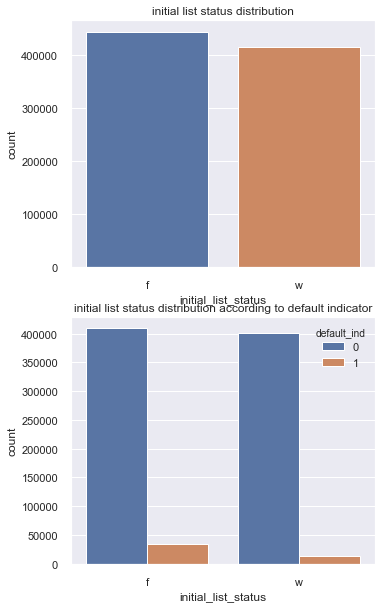

In [476]:
from pylab import *
sns.set(rc={"figure.figsize":(12,10)})
subplot(2,2,1)
sns.countplot(ldCleaned.initial_list_status)
plt.title("initial list status distribution")

subplot(2,2,3)
sns.countplot(ldCleaned.initial_list_status,hue=ldCleaned.default_ind)
plt.title("initial list status distribution according to default indicator")

It is observed that the data is almost equally distributed between both the groups though there is slight difference in the no of defaulters in each group. To clarify the difference plotting percent stack plot

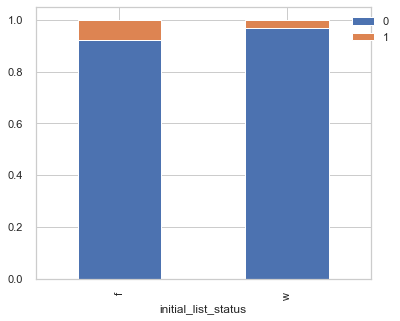

In [477]:
sns.set(rc={"figure.figsize":(6,5)})
sns.set_style("whitegrid")
stackILS=ldCleaned.groupby("initial_list_status")["default_ind"].value_counts(normalize=True).unstack()
stackILS.plot(kind="bar",stacked=True)
plt.legend(loc="upper center",bbox_to_anchor=(1,1))

It indicates that the defualters are more in "f" initial status and half of that percent are defaulters in the "w" cateory. This shows that there is an impact of the values in this field on the defaulter status. Need to check chi square distribution in order to confirm its significance.

In [478]:
ldFinalDataset=pd.concat([ldFinalDataset,ldCleaned.initial_list_status],axis=1).copy()
ldFinalDataset.columns

Index(['sub_grade', 'term', 'emp_length_ord', 'home_ownership',
       'verification_status', 'purpose', 'addr_state', 'initial_list_status'],
      dtype='object')

In [479]:
colcat2.head(13)

0                   term
1              sub_grade
2             emp_length
3         home_ownership
4    verification_status
5                issue_d
6                purpose
7             addr_state
8    initial_list_status
dtype: object

# Independent variable analysis and initial filtering is now complete for Categorical variables

# Numeric variable independent variables analysis

In [480]:
colnum3=colNum(ldCleaned)

In [481]:
colnum3

0                  funded_amnt
1                     int_rate
2                   annual_inc
3                          dti
4                  delinq_2yrs
5               inq_last_6mths
6                     open_acc
7                      pub_rec
8                    revol_bal
9                   revol_util
10                   total_acc
11                   out_prncp
12                 total_pymnt
13             last_pymnt_amnt
14                 tot_cur_bal
15                 default_ind
16            loan_funded_diff
17    fundedtoinstallmentratio
18              emp_length_ord
dtype: object

In [482]:
print("max delinq_2yrs",ldCleaned.delinq_2yrs.max())
print("max delinq_2yrs",ldCleaned.delinq_2yrs.min())

max delinq_2yrs 39.0
max delinq_2yrs 0.0


In [483]:
delinq2yrs=ldCleaned.delinq_2yrs.copy()
delinq2yrs=delinq2yrs.astype("object")
maxdelinq2yrs=ldCleaned.delinq_2yrs.max().copy()
print(maxdelinq2yrs)

39.0


In [484]:
j1=maxdelinq2yrs*20/100
j2=maxdelinq2yrs*40/100
j3=maxdelinq2yrs*60/100
j4=maxdelinq2yrs*80/100
delinq2yrs.loc[ldCleaned.delinq_2yrs<=j1]="0-20percentile"
delinq2yrs.loc[(ldCleaned.delinq_2yrs>j1)&(ldCleaned.delinq_2yrs<=j2)]="20-40percentile"
delinq2yrs.loc[(ldCleaned.delinq_2yrs>j2)&(ldCleaned.delinq_2yrs<=j3)]="40-60percentile"
delinq2yrs.loc[(ldCleaned.delinq_2yrs>j3)&(ldCleaned.delinq_2yrs<=j4)]="60-80percentile"
delinq2yrs[ldCleaned.delinq_2yrs>j4]="> 80 percentile"
print(delinq2yrs.tail(10),"delinq_2yrs :",ldCleaned.delinq_2yrs.tail(10))
delinq2yrs.value_counts()

855959    0-20percentile
855960    0-20percentile
855961    0-20percentile
855962    0-20percentile
855963    0-20percentile
855964    0-20percentile
855965    0-20percentile
855966    0-20percentile
855967    0-20percentile
855968    0-20percentile
Name: delinq_2yrs, dtype: object delinq_2yrs : 855959    0.0
855960    0.0
855961    0.0
855962    1.0
855963    0.0
855964    0.0
855965    0.0
855966    0.0
855967    1.0
855968    0.0
Name: delinq_2yrs, dtype: float64


0-20percentile     854695
20-40percentile      1216
40-60percentile        51
60-80percentile         6
> 80 percentile         1
Name: delinq_2yrs, dtype: int64

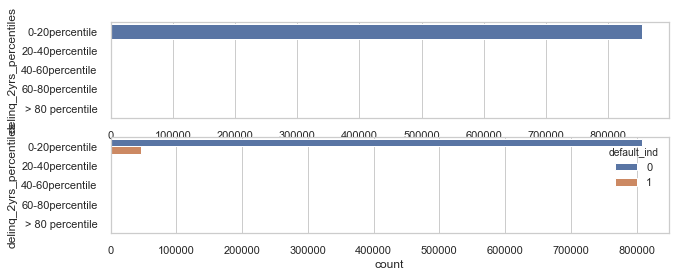

In [485]:
ldCleaned["delinq_2yrs_percentiles"]=pd.Categorical(delinq2yrs,["0-20percentile","20-40percentile","40-60percentile",
                                                            "60-80percentile","> 80 percentile"],ordered=True).copy()


stackD2YP=ldCleaned.groupby("delinq_2yrs_percentiles")["default_ind"].value_counts(normalize=True).unstack()

sns.set(rc={"figure.figsize":(10,6)})
sns.set_style("whitegrid")
subplot(3,1,1)
sns.countplot(y=ldCleaned.delinq_2yrs_percentiles)

subplot(3,1,2)
sns.countplot(y=ldCleaned.delinq_2yrs_percentiles,hue=ldCleaned.default_ind)

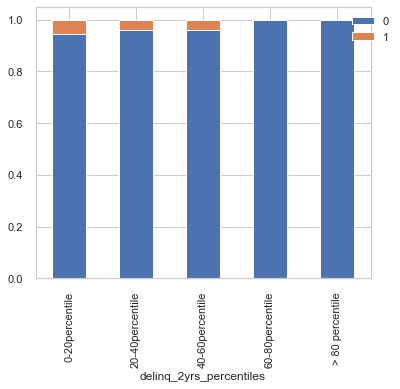

In [486]:
sns.set(rc={"figure.figsize":(6,5)})
sns.set_style("whitegrid")
stackD2YP.plot(kind="bar",stacked=True)
plt.legend(loc="upper center",bbox_to_anchor=(1,1))

It is appeared that the delinquency increases the defaulter percentage decreases.

In [487]:
#removing outliers
ub=ldCleaned.delinq_2yrs.mean()+4.5*ldCleaned.delinq_2yrs.std()
lb=ldCleaned.delinq_2yrs.mean()-4.5*ldCleaned.delinq_2yrs.std()
count=0
for i in ldCleaned.delinq_2yrs:
    if (i >lb) & (i < ub):
        count=count+1
print(count)
print(ldCleaned.delinq_2yrs.shape[0]-count)

849981
5988


In [488]:
ldCleaned.loc[-((ldCleaned.delinq_2yrs>lb)&(ldCleaned.delinq_2yrs<ub)),"delinq_2yrs"]=ldCleaned.delinq_2yrs.mean()
ld.loc[-((ld.delinq_2yrs>lb)&(ld.delinq_2yrs<ub)),"delinq_2yrs"].head()

3906    6.0
4044    5.0
6437    5.0
6853    5.0
7981    5.0
Name: delinq_2yrs, dtype: float64

In [489]:
delinq2yrs1=ldCleaned.delinq_2yrs.copy()
delinq2yrs1=delinq2yrs1.astype("object")
maxdelinq2yrs1=ldCleaned.delinq_2yrs.max().copy()
print(maxdelinq2yrs1)


4.0


In [490]:
j1=maxdelinq2yrs1*20/100
j2=maxdelinq2yrs1*40/100
j3=maxdelinq2yrs1*60/100
j4=maxdelinq2yrs1*80/100
delinq2yrs1.loc[ldCleaned.delinq_2yrs<=j1]="0-20percentile"
delinq2yrs1.loc[(ldCleaned.delinq_2yrs>j1)&(ldCleaned.delinq_2yrs<=j2)]="20-40percentile"
delinq2yrs1.loc[(ldCleaned.delinq_2yrs>j2)&(ldCleaned.delinq_2yrs<=j3)]="40-60percentile"
delinq2yrs1.loc[(ldCleaned.delinq_2yrs>j3)&(ldCleaned.delinq_2yrs<=j4)]="60-80percentile"
delinq2yrs1[ldCleaned.delinq_2yrs>j4]="> 80 percentile"
print(delinq2yrs1.tail(10),"delinq_2yrs :",ldCleaned.delinq_2yrs.tail(10))
delinq2yrs1.value_counts()

855959     0-20percentile
855960     0-20percentile
855961     0-20percentile
855962    20-40percentile
855963     0-20percentile
855964     0-20percentile
855965     0-20percentile
855966     0-20percentile
855967    20-40percentile
855968     0-20percentile
Name: delinq_2yrs, dtype: object delinq_2yrs : 855959    0.0
855960    0.0
855961    0.0
855962    1.0
855963    0.0
855964    0.0
855965    0.0
855966    0.0
855967    1.0
855968    0.0
Name: delinq_2yrs, dtype: float64


0-20percentile     698673
20-40percentile    108733
40-60percentile     32076
60-80percentile     11410
> 80 percentile      5077
Name: delinq_2yrs, dtype: int64

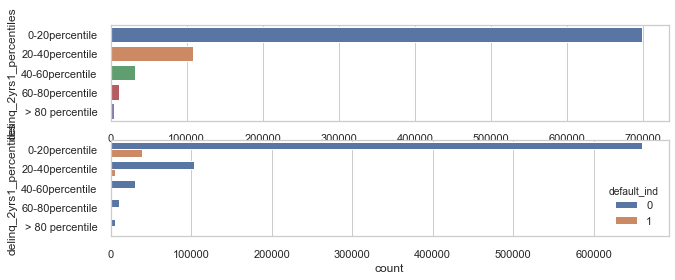

In [491]:
ldCleaned["delinq_2yrs1_percentiles"]=pd.Categorical(delinq2yrs1,["0-20percentile","20-40percentile","40-60percentile",
                                                            "60-80percentile","> 80 percentile"],ordered=True).copy()


stackD2Y1P=ldCleaned.groupby("delinq_2yrs1_percentiles")["default_ind"].value_counts(normalize=True).unstack()

sns.set(rc={"figure.figsize":(10,6)})
sns.set_style("whitegrid")
subplot(3,1,1)
sns.countplot(y=ldCleaned.delinq_2yrs1_percentiles)

subplot(3,1,2)
sns.countplot(y=ldCleaned.delinq_2yrs1_percentiles,hue=ldCleaned.default_ind)

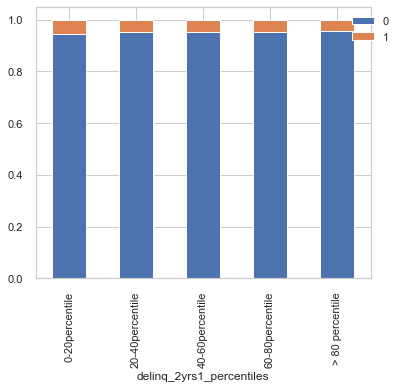

In [492]:
sns.set(rc={"figure.figsize":(6,5)})
sns.set_style("whitegrid")
stackD2Y1P.plot(kind="bar",stacked=True)
plt.legend(loc="upper center",bbox_to_anchor=(1,1))

In [493]:
#sns.boxplot(y="delinq_2yrs",x="default_ind",data=ld)

In [494]:
print(j1,j2,j3,j4)

0.8 1.6 2.4 3.2


As there are only 5 values 0,1,2,3,4 we will categorize them as 0,1,2,3,4+ categories.

In [495]:
ldCleaned.loc[ldCleaned.delinq_2yrs1_percentiles=="0-20percentile","delinq_2yrs_ord"]="0"
ldCleaned.loc[ldCleaned.delinq_2yrs1_percentiles=="20-40percentile","delinq_2yrs_ord"]="1"
ldCleaned.loc[ldCleaned.delinq_2yrs1_percentiles=="40-60percentile","delinq_2yrs_ord"]="2"
ldCleaned.loc[ldCleaned.delinq_2yrs1_percentiles=="60-80percentile","delinq_2yrs_ord"]="3"
ldCleaned.loc[ldCleaned.delinq_2yrs1_percentiles=="> 80 percentile","delinq_2yrs_ord"]="4+"

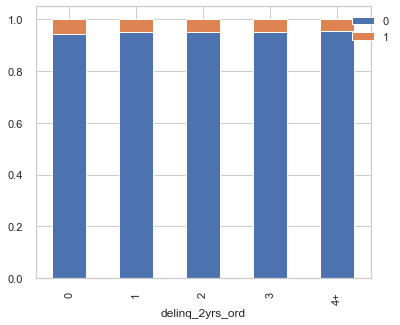

In [496]:
stackD2Y1P=ldCleaned.groupby("delinq_2yrs_ord")["default_ind"].value_counts(normalize=True).unstack()
sns.set(rc={"figure.figsize":(6,5)})
sns.set_style("whitegrid")
stackD2Y1P.plot(kind="bar",stacked=True)
plt.legend(loc="upper center",bbox_to_anchor=(1,1))

The impact of the column on the defaulter status is almost same in each category.
Therefore removing this variable from analysis

In [497]:
print("max funded amnt: " ,ldCleaned.funded_amnt.max())
print("min funded amnt: ",ldCleaned.funded_amnt.min())

max funded amnt:  35000.0
min funded amnt:  500.0


In [498]:
count=0
fundedamnt=ldCleaned.funded_amnt.copy()
fundedamnt=fundedamnt.astype("object")
maxfundedamnt=ldCleaned.funded_amnt.max().copy()

We will be traversing through all indexes and will create a new column with values corresponding to which percentile range they lay in.

In [499]:
j1=maxfundedamnt*20/100
j2=maxfundedamnt*40/100
j3=maxfundedamnt*60/100
j4=maxfundedamnt*80/100
fundedamnt.loc[ldCleaned.funded_amnt<=j1]="0-20percentile"
fundedamnt.loc[(ldCleaned.funded_amnt>j1)&(ldCleaned.funded_amnt<=j2)]="20-40percentile"
fundedamnt.loc[(ldCleaned.funded_amnt>j2)&(ldCleaned.funded_amnt<=j3)]="40-60percentile"
fundedamnt.loc[(ldCleaned.funded_amnt>j3)&(ldCleaned.funded_amnt<=j4)]="60-80percentile"
fundedamnt[ldCleaned.funded_amnt>j4]="> 80 percentile"
print(fundedamnt.tail(10),"Funded amount :",ldCleaned.funded_amnt.tail(10))

855959     0-20percentile
855960    20-40percentile
855961    20-40percentile
855962    20-40percentile
855963    20-40percentile
855964    20-40percentile
855965    60-80percentile
855966    20-40percentile
855967    20-40percentile
855968    40-60percentile
Name: funded_amnt, dtype: object Funded amount : 855959     4000.0
855960     7500.0
855961    10850.0
855962    12000.0
855963    11575.0
855964    10000.0
855965    24000.0
855966    13000.0
855967    12000.0
855968    20000.0
Name: funded_amnt, dtype: float64


In [500]:
fundedamnt.value_counts()

20-40percentile    287132
40-60percentile    224477
0-20percentile     170047
60-80percentile    103560
> 80 percentile     70753
Name: funded_amnt, dtype: int64

In [501]:
ldCleaned["fundedamnt_percentiles"]=pd.Categorical(fundedamnt,["0-20percentile","20-40percentile","40-60percentile",
                                                            "60-80percentile","> 80 percentile"],ordered=True).copy()

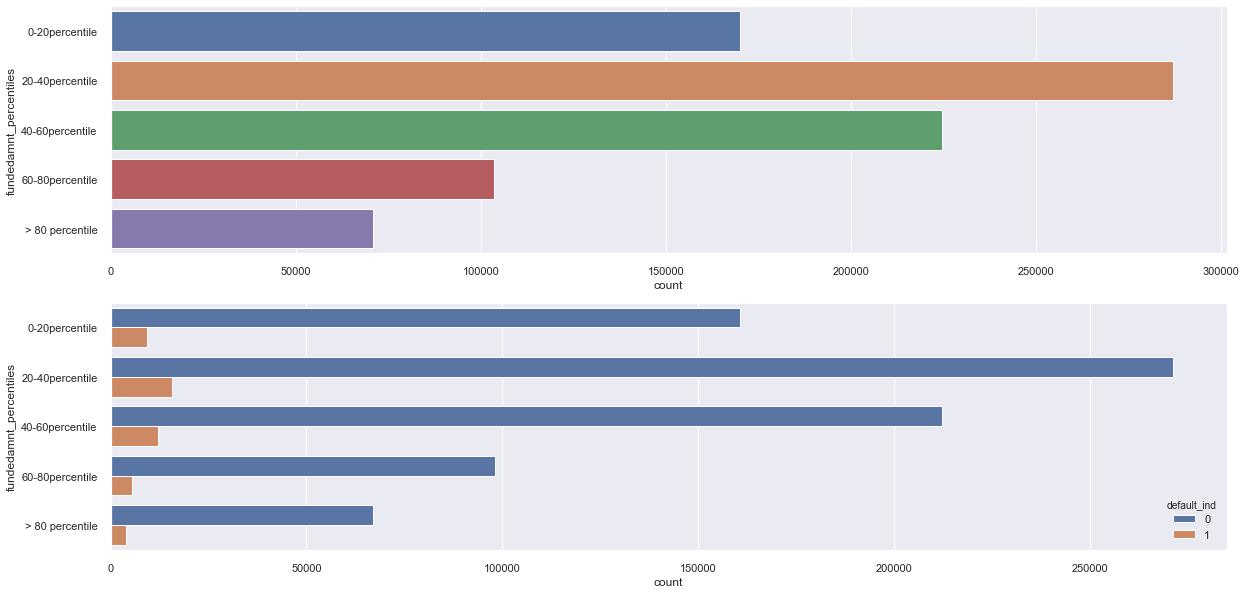

In [502]:
sns.set(rc={"figure.figsize":(20,10)})
subplot(2,1,1)
sns.countplot(y="fundedamnt_percentiles",data=ldCleaned)

subplot(2,1,2)
sns.countplot(y="fundedamnt_percentiles",hue="default_ind",data=ldCleaned)

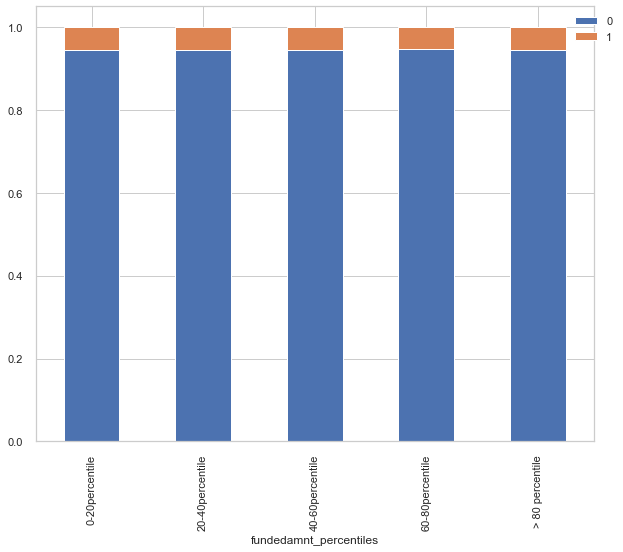

In [503]:
sns.set(rc={"figure.figsize":(10,8)})
sns.set_style("whitegrid")
stackFAP=ldCleaned.groupby("fundedamnt_percentiles")["default_ind"].value_counts(normalize=True).unstack()
stackFAP.plot(kind="bar",stacked=True)
plt.legend(loc='upper center',bbox_to_anchor=(1,1))

The amount of defaulters from each category is same. Therefore this column doesnt seem to have an impact on the defaulter status so we need to confirm this by the boxplot analysis

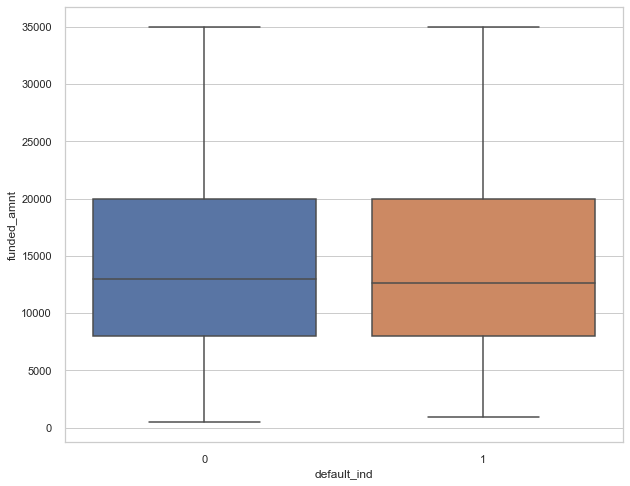

In [504]:
sns.boxplot(y="funded_amnt",x="default_ind",data=ldCleaned)

from the figure it is clear that the data is not impacting the target variable. Therefore removing it from analysis

In [505]:
colnum3.head()

0    funded_amnt
1       int_rate
2     annual_inc
3            dti
4    delinq_2yrs
dtype: object

In [506]:
count=0
intrate=ldCleaned.int_rate.copy()
intrate=intrate.astype("object")
maxintrate=ldCleaned.int_rate.max().copy()

In [507]:
j1=maxintrate*20/100
j2=maxintrate*40/100
j3=maxintrate*60/100
j4=maxintrate*80/100
intrate.loc[ldCleaned.int_rate<=j1]="0-20percentile"
intrate.loc[(ldCleaned.int_rate>j1)&(ldCleaned.int_rate<=j2)]="20-40percentile"
intrate.loc[(ldCleaned.int_rate>j2)&(ldCleaned.int_rate<=j3)]="40-60percentile"
intrate.loc[(ldCleaned.int_rate>j3)&(ldCleaned.int_rate<=j4)]="60-80percentile"
intrate[ldCleaned.int_rate>j4]="> 80 percentile"
print(intrate.tail(10),"int rate :",ldCleaned.int_rate.tail(10))

855959    20-40percentile
855960    20-40percentile
855961    60-80percentile
855962    40-60percentile
855963    40-60percentile
855964    40-60percentile
855965    40-60percentile
855966    40-60percentile
855967    60-80percentile
855968    40-60percentile
Name: int_rate, dtype: object int rate : 855959     8.67
855960     9.49
855961    19.24
855962    11.99
855963    15.59
855964    11.99
855965    11.99
855966    15.99
855967    19.99
855968    11.99
Name: int_rate, dtype: float64


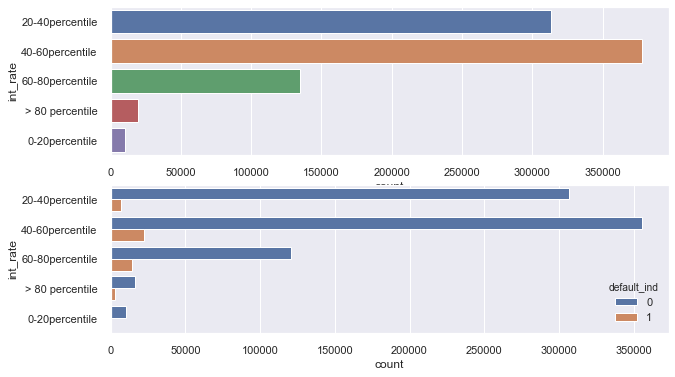

In [508]:
sns.set(rc={"figure.figsize":(10,6)})
subplot(2,1,1)
sns.countplot(y=intrate)

subplot(2,1,2)
sns.countplot(y=intrate,hue=ldCleaned.default_ind)

In [509]:
intrate.value_counts()

40-60percentile    378012
20-40percentile    313233
60-80percentile    134669
> 80 percentile     19764
0-20percentile      10291
Name: int_rate, dtype: int64

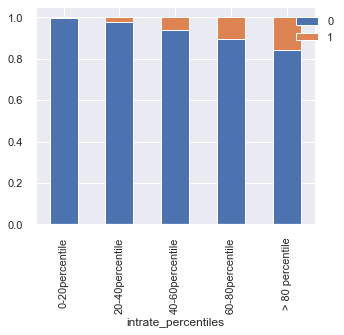

In [510]:
ldCleaned["intrate_percentiles"]=pd.Categorical(intrate,["0-20percentile","20-40percentile","40-60percentile",
                                                            "60-80percentile","> 80 percentile"],ordered=True).copy()
stackIRP=ldCleaned.groupby("intrate_percentiles")["default_ind"].value_counts(normalize=True).unstack()
sns.set_style("whitegrid")
sns.set(rc={"figure.figsize":(5,4)})
stackIRP.plot(kind="bar",stacked=True)
plt.legend(loc="upper center",bbox_to_anchor=(1,1))

It is seen that as the interest rate increases the defaulter status also increases. with utpo 20 percentile being at least and from 60-80Percentile being at max.We need to confirm this finding by checking the anova or kruskal walis test

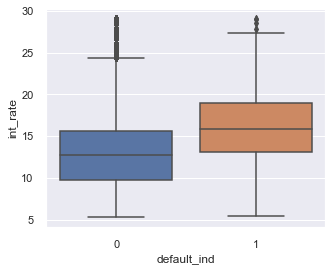

In [511]:
#therefore checking the boxplot for this variable with respect to defaulter status
sns.boxplot(y="int_rate",x="default_ind",data=ldCleaned)

It is therefore observed that the mean of the two variables is different and hence there is an impact of this variable on defaulter status. so retaining this column

In [512]:
ldFinalDataset=pd.concat([ldFinalDataset,ldCleaned.int_rate],axis=1).copy()
ldFinalDataset.columns

Index(['sub_grade', 'term', 'emp_length_ord', 'home_ownership',
       'verification_status', 'purpose', 'addr_state', 'initial_list_status',
       'int_rate'],
      dtype='object')

In [513]:
colnum3.head()

0    funded_amnt
1       int_rate
2     annual_inc
3            dti
4    delinq_2yrs
dtype: object

In [514]:
count=0
annualinc=ldCleaned.annual_inc.copy()
annualinc=annualinc.astype("object")
maxannualinc=ldCleaned.annual_inc.max().copy()
maxannualinc

9500000.0

In [515]:
j1=maxannualinc*20/100
j2=maxannualinc*40/100
j3=maxannualinc*60/100
j4=maxannualinc*80/100
annualinc.loc[ldCleaned.annual_inc<=j1]="0-20percentile"
annualinc.loc[(ldCleaned.annual_inc>j1)&(ldCleaned.annual_inc<=j2)]="20-40percentile"
annualinc.loc[(ldCleaned.annual_inc>j2)&(ldCleaned.annual_inc<=j3)]="40-60percentile"
annualinc.loc[(ldCleaned.annual_inc>j3)&(ldCleaned.annual_inc<=j4)]="60-80percentile"
annualinc[ldCleaned.annual_inc>j4]="> 80 percentile"
print(annualinc.tail(10),"int rate :",ldCleaned.annual_inc.tail(10))
print(annualinc.value_counts())

855959    0-20percentile
855960    0-20percentile
855961    0-20percentile
855962    0-20percentile
855963    0-20percentile
855964    0-20percentile
855965    0-20percentile
855966    0-20percentile
855967    0-20percentile
855968    0-20percentile
Name: annual_inc, dtype: object int rate : 855959     50000.0
855960     40000.0
855961     32000.0
855962     63000.0
855963     25400.0
855964     31000.0
855965     79000.0
855966     35000.0
855967     64400.0
855968    100000.0
Name: annual_inc, dtype: float64
0-20percentile     855918
20-40percentile        20
40-60percentile        13
60-80percentile        11
> 80 percentile         7
Name: annual_inc, dtype: int64


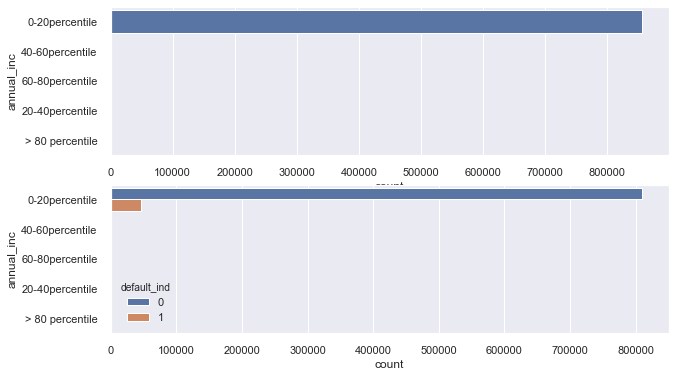

In [516]:
ldCleaned["annualinc_percentiles"]=pd.Categorical(annualinc,["0-20percentile","20-40percentile","40-60percentile",
                                                            "60-80percentile","> 80 percentile"],ordered=True).copy()
sns.set(rc={"figure.figsize":(10,6)})
subplot(2,1,1)
sns.countplot(y=annualinc)

subplot(2,1,2)
sns.countplot(y=annualinc,hue=ldCleaned.default_ind)

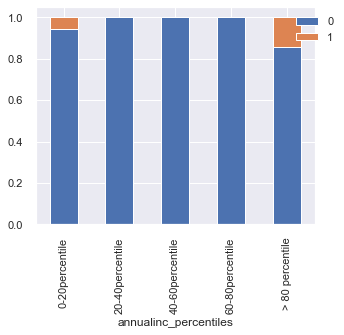

In [517]:
stackAIP=ldCleaned.groupby("annualinc_percentiles")["default_ind"].value_counts(normalize=True).unstack()
sns.set_style("whitegrid")
sns.set(rc={"figure.figsize":(5,4)})
stackAIP.plot(kind="bar",stacked=True)
plt.legend(loc="upper center",bbox_to_anchor=(1,1))

It is appeared that max loan appliers fall within the first 20 percentiles and the maximum defualters are from 80%> and then in 0-20 percentile range. We will have to remove the outliers and then check the dependency on this variable with the help of anova or kruskal walis test

In [518]:
ub=ldCleaned.annual_inc.mean()+4.5*ldCleaned.annual_inc.std()
lb=ldCleaned.annual_inc.mean()-4.5*ldCleaned.annual_inc.std()
count=0
for i in ldCleaned.annual_inc:
    if (i>lb)&(i<ub):
        count=count+1
print(count)
print(ldCleaned.annual_inc.shape[0]-count)

853297
2672


In [519]:
ldCleaned.loc[-((ldCleaned.annual_inc>lb)&(ldCleaned.annual_inc<ub)),"annual_inc"]=ldCleaned.annual_inc.median()

In [520]:
annualinc1=ldCleaned.annual_inc.copy()
annualinc1=annualinc1.astype("object")
maxannualinc1=ldCleaned.annual_inc.max().copy()
print(maxannualinc1)

364000.0


In [521]:
j1=maxannualinc1*20/100
j2=maxannualinc1*40/100
j3=maxannualinc1*60/100
j4=maxannualinc1*80/100
annualinc1.loc[ldCleaned.annual_inc<=j1]="0-20percentile"
annualinc1.loc[(ldCleaned.annual_inc>j1)&(ldCleaned.annual_inc<=j2)]="20-40percentile"
annualinc1.loc[(ldCleaned.annual_inc>j2)&(ldCleaned.annual_inc<=j3)]="40-60percentile"
annualinc1.loc[(ldCleaned.annual_inc>j3)&(ldCleaned.annual_inc<=j4)]="60-80percentile"
annualinc1[ldCleaned.annual_inc>j4]="> 80 percentile"
print(annualinc1.tail(10),"annual_inc :",ldCleaned.annual_inc.tail(10))
annualinc1.value_counts()

855959     0-20percentile
855960     0-20percentile
855961     0-20percentile
855962     0-20percentile
855963     0-20percentile
855964     0-20percentile
855965    20-40percentile
855966     0-20percentile
855967     0-20percentile
855968    20-40percentile
Name: annual_inc, dtype: object annual_inc : 855959     50000.0
855960     40000.0
855961     32000.0
855962     63000.0
855963     25400.0
855964     31000.0
855965     79000.0
855966     35000.0
855967     64400.0
855968    100000.0
Name: annual_inc, dtype: float64


0-20percentile     517632
20-40percentile    289755
40-60percentile     37559
60-80percentile      8176
> 80 percentile      2847
Name: annual_inc, dtype: int64

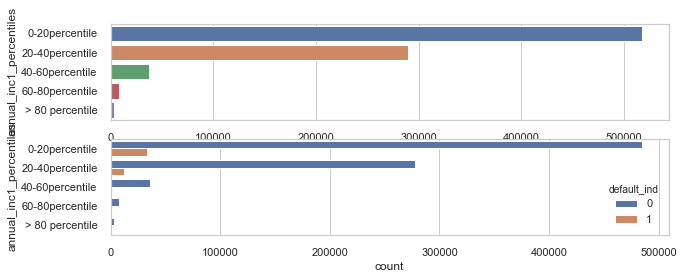

In [522]:
ldCleaned["annual_inc1_percentiles"]=pd.Categorical(annualinc1,["0-20percentile","20-40percentile","40-60percentile",
                                                            "60-80percentile","> 80 percentile"],ordered=True).copy()
stackAI1P=ldCleaned.groupby("annual_inc1_percentiles")["default_ind"].value_counts(normalize=True).unstack()

sns.set(rc={"figure.figsize":(10,6)})
sns.set_style("whitegrid")
subplot(3,1,1)
sns.countplot(y=ldCleaned.annual_inc1_percentiles)

subplot(3,1,2)
sns.countplot(y=ldCleaned.annual_inc1_percentiles,hue=ldCleaned.default_ind)

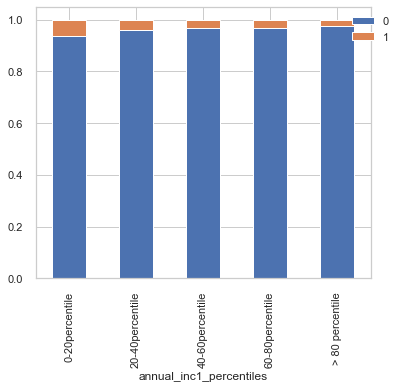

In [523]:
sns.set(rc={"figure.figsize":(6,5)})
sns.set_style("whitegrid")
stackAI1P.plot(kind="bar",stacked=True)
plt.legend(loc="upper center",bbox_to_anchor=(1,1))

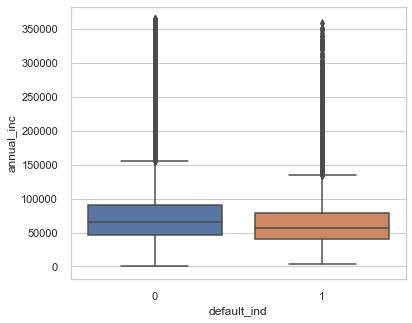

In [524]:
sns.boxplot(y="annual_inc",x="default_ind",data=ldCleaned)

It is observed that the median of the two boxplots are different slightly. It indicates and also from the bargraph it indicates that the data is having some impact on the target variable

In [525]:
ldFinalDataset=pd.concat([ldFinalDataset,ldCleaned.annual_inc],axis=1).copy()
ldFinalDataset.columns

Index(['sub_grade', 'term', 'emp_length_ord', 'home_ownership',
       'verification_status', 'purpose', 'addr_state', 'initial_list_status',
       'int_rate', 'annual_inc'],
      dtype='object')

In [526]:
colnum3.head()

0    funded_amnt
1       int_rate
2     annual_inc
3            dti
4    delinq_2yrs
dtype: object

In [527]:
count=0
debt_to_income_ratio=ldCleaned.dti.copy()
debt_to_income_ratio=debt_to_income_ratio.astype("object")
maxdebt_to_income_ratio=ldCleaned.dti.max().copy()
maxdebt_to_income_ratio

9999.0

In [528]:
j1=maxdebt_to_income_ratio*20/100
j2=maxdebt_to_income_ratio*40/100
j3=maxdebt_to_income_ratio*60/100
j4=maxdebt_to_income_ratio*80/100
debt_to_income_ratio.loc[ldCleaned.dti<=j1]="0-20percentile"
debt_to_income_ratio.loc[(ldCleaned.dti>j1)&(ldCleaned.dti<=j2)]="20-40percentile"
debt_to_income_ratio.loc[(ldCleaned.dti>j2)&(ldCleaned.dti<=j3)]="40-60percentile"
debt_to_income_ratio.loc[(ldCleaned.dti>j3)&(ldCleaned.dti<=j4)]="60-80percentile"
debt_to_income_ratio[ldCleaned.dti>j4]="> 80 percentile"
print(debt_to_income_ratio.tail(10),"dti :",ldCleaned.dti.tail(10))
print(debt_to_income_ratio.value_counts())

855959    0-20percentile
855960    0-20percentile
855961    0-20percentile
855962    0-20percentile
855963    0-20percentile
855964    0-20percentile
855965    0-20percentile
855966    0-20percentile
855967    0-20percentile
855968    0-20percentile
Name: dti, dtype: object dti : 855959    12.63
855960    25.63
855961    29.44
855962    23.69
855963    27.08
855964    28.69
855965     3.90
855966    30.90
855967    27.19
855968    10.83
Name: dti, dtype: float64
0-20percentile     855967
> 80 percentile         2
Name: dti, dtype: int64


Therefore there are two outliers in the data. Removing those extreme outliers to proceed with the data analysis

In [529]:
ldCleaned["dti_percentiles"]=pd.Categorical(debt_to_income_ratio).copy()

In [530]:
ldCleaned.dti_percentiles.value_counts()

0-20percentile     855967
> 80 percentile         2
Name: dti_percentiles, dtype: int64

In [531]:
ldCleaned.loc[ldCleaned.dti_percentiles=="> 80 percentile","dti"]=ldCleaned.dti.median()

In [532]:
ldCleaned.loc[ldCleaned.dti_percentiles=="> 80 percentile","dti"]

462577    17.61
508976    17.61
Name: dti, dtype: float64

In [533]:
ldCleaned=ldCleaned.drop(["dti_percentiles"],axis=1).copy()

In [534]:
debt_to_income_ratio=ldCleaned.dti.copy()
debt_to_income_ratio=debt_to_income_ratio.astype("object")
maxdebt_to_income_ratio=ldCleaned.dti.max().copy()
maxdebt_to_income_ratio

1092.52

In [535]:
j1=maxdebt_to_income_ratio*20/100
j2=maxdebt_to_income_ratio*40/100
j3=maxdebt_to_income_ratio*60/100
j4=maxdebt_to_income_ratio*80/100
debt_to_income_ratio.loc[ldCleaned.dti<=j1]="0-20percentile"
debt_to_income_ratio.loc[(ldCleaned.dti>j1)&(ldCleaned.dti<=j2)]="20-40percentile"
debt_to_income_ratio.loc[(ldCleaned.dti>j2)&(ldCleaned.dti<=j3)]="40-60percentile"
debt_to_income_ratio.loc[(ldCleaned.dti>j3)&(ldCleaned.dti<=j4)]="60-80percentile"
debt_to_income_ratio[ldCleaned.dti>j4]="> 80 percentile"
print(debt_to_income_ratio.tail(10),"dti :",ldCleaned.dti.tail(10))
print(debt_to_income_ratio.value_counts())

855959    0-20percentile
855960    0-20percentile
855961    0-20percentile
855962    0-20percentile
855963    0-20percentile
855964    0-20percentile
855965    0-20percentile
855966    0-20percentile
855967    0-20percentile
855968    0-20percentile
Name: dti, dtype: object dti : 855959    12.63
855960    25.63
855961    29.44
855962    23.69
855963    27.08
855964    28.69
855965     3.90
855966    30.90
855967    27.19
855968    10.83
Name: dti, dtype: float64
0-20percentile     855966
> 80 percentile         1
60-80percentile         1
20-40percentile         1
Name: dti, dtype: int64


In [536]:
ldCleaned["dti_percentiles"]=pd.Categorical(debt_to_income_ratio)
stackDIP=ldCleaned.groupby("dti_percentiles")["default_ind"].value_counts(normalize=True).unstack()

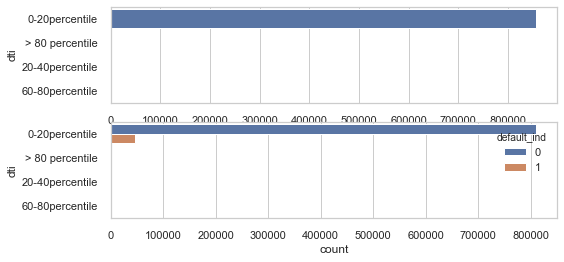

In [537]:
sns.set(rc={"figure.figsize":(8,6)})
sns.set_style("whitegrid")
subplot(3,1,1)
sns.countplot(y=debt_to_income_ratio)

subplot(3,1,2)
sns.countplot(y=debt_to_income_ratio,hue=ldCleaned.default_ind)

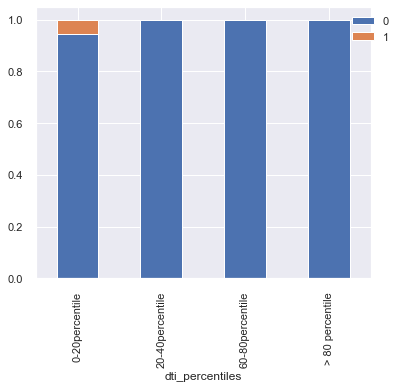

In [538]:
sns.set_style("whitegrid")
sns.set(rc={"figure.figsize":(6,5)})
stackDIP.plot(kind="bar",stacked=True)
plt.legend(loc="upper center",bbox_to_anchor=(1,1))

It is appeared that the data has most records in 0-20 and 0-40 percentile. And the no of defaulters is highest in that range. we need to investigate using the anova or kruskal walis test the impact of this variable on the target.

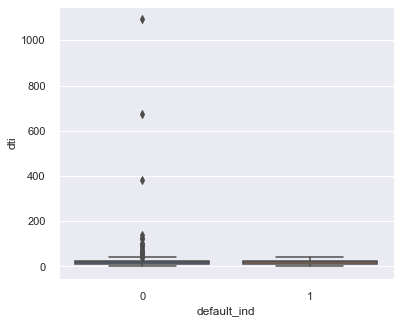

In [539]:
sns.boxplot(y=ldCleaned.dti,x=ldCleaned.default_ind)

In [540]:
ub=ldCleaned.dti.mean()+4.5*ldCleaned.dti.std()
lb=ldCleaned.dti.mean()-4.5*ldCleaned.dti.std()
count=0
for i in ldCleaned.dti:
    if (i >lb) & (i < ub):
        count=count+1
print(count)
print(ldCleaned.dti.shape[0]-count)

855941
28


In [541]:
ldCleaned.loc[-((ldCleaned.dti>lb)&(ldCleaned.dti<ub)),"dti"]=ldCleaned.dti.median()

In [542]:
dti_ratio=ldCleaned.dti.copy()
dti_ratio=dti_ratio.astype("object")
maxdti_ratio=ldCleaned.dti.max().copy()
print(maxdti_ratio)


55.1


In [543]:
j1=maxdti_ratio*20/100
j2=maxdti_ratio*40/100
j3=maxdti_ratio*60/100
j4=maxdti_ratio*80/100
dti_ratio.loc[ldCleaned.dti<=j1]="0-20percentile"
dti_ratio.loc[(ldCleaned.dti>j1)&(ldCleaned.dti<=j2)]="20-40percentile"
dti_ratio.loc[(ldCleaned.dti>j2)&(ldCleaned.dti<=j3)]="40-60percentile"
dti_ratio.loc[(ldCleaned.dti>j3)&(ldCleaned.dti<=j4)]="60-80percentile"
dti_ratio[ldCleaned.dti>j4]="> 80 percentile"
print(dti_ratio.tail(10),"dti :",ldCleaned.dti.tail(10))
dti_ratio.value_counts()

855959    20-40percentile
855960    40-60percentile
855961    40-60percentile
855962    40-60percentile
855963    40-60percentile
855964    40-60percentile
855965     0-20percentile
855966    40-60percentile
855967    40-60percentile
855968     0-20percentile
Name: dti, dtype: object dti : 855959    12.63
855960    25.63
855961    29.44
855962    23.69
855963    27.08
855964    28.69
855965     3.90
855966    30.90
855967    27.19
855968    10.83
Name: dti, dtype: float64


20-40percentile    400263
40-60percentile    232156
0-20percentile     185099
60-80percentile     38422
> 80 percentile        29
Name: dti, dtype: int64

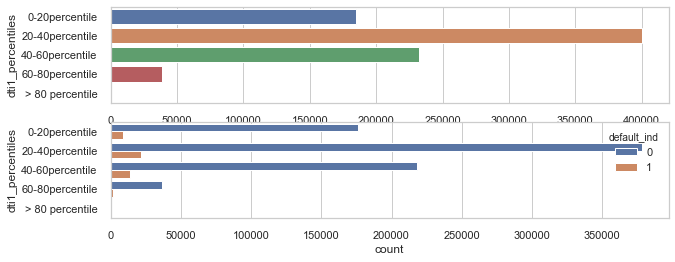

In [544]:
ldCleaned["dti1_percentiles"]=pd.Categorical(dti_ratio,["0-20percentile","20-40percentile","40-60percentile",
                                                            "60-80percentile","> 80 percentile"],ordered=True).copy()


stackDTI2P=ldCleaned.groupby("dti1_percentiles")["default_ind"].value_counts(normalize=True).unstack()

sns.set(rc={"figure.figsize":(10,6)})
sns.set_style("whitegrid")
subplot(3,1,1)
sns.countplot(y=ldCleaned.dti1_percentiles)

subplot(3,1,2)
sns.countplot(y=ldCleaned.dti1_percentiles,hue=ldCleaned.default_ind)

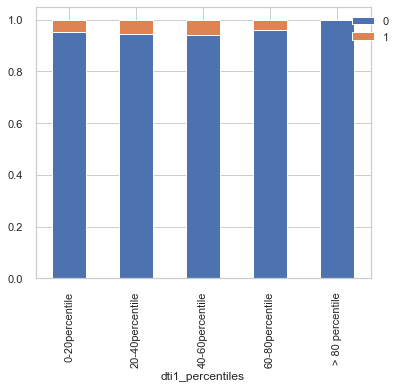

In [545]:
sns.set(rc={"figure.figsize":(6,5)})
sns.set_style("whitegrid")
stackDTI2P.plot(kind="bar",stacked=True)
plt.legend(loc="upper center",bbox_to_anchor=(1,1))

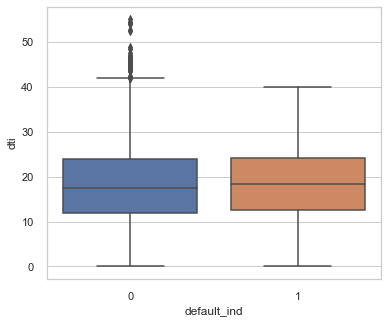

In [546]:
sns.boxplot(y=ldCleaned.dti,x=ldCleaned.default_ind)

There is slight difference in the medians indicating slight relationship with default indicator.
Therefore keeping the column for model building

In [547]:
ldFinalDataset=pd.concat([ldFinalDataset,ldCleaned.dti],axis=1).copy()
ldFinalDataset.columns

Index(['sub_grade', 'term', 'emp_length_ord', 'home_ownership',
       'verification_status', 'purpose', 'addr_state', 'initial_list_status',
       'int_rate', 'annual_inc', 'dti'],
      dtype='object')

In [548]:
colnum3.head(7)

0       funded_amnt
1          int_rate
2        annual_inc
3               dti
4       delinq_2yrs
5    inq_last_6mths
6          open_acc
dtype: object

In [549]:
revolbal=ldCleaned.revol_bal.copy()
revolbal=revolbal.astype("object")
maxrevolbal=ldCleaned.revol_bal.max().copy()
maxrevolbal

2904836.0

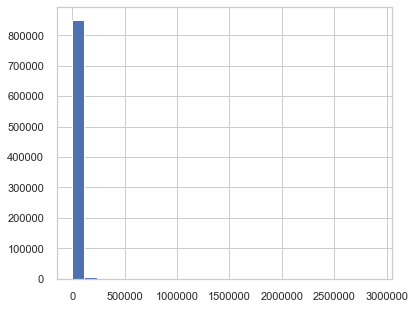

In [550]:
plt.hist(revolbal,bins=25)
plt.show()

Therefore most of the records are concentrated below 5lac. hence we will check how many outliers are there first.

In [551]:
ub=revolbal.mean()+4.5*revolbal.std()
lb=revolbal.mean()-4.5*revolbal.std()
count=0
for i in revolbal:
    if (i >lb) & (i < ub):
        count=count+1
print(count)
print(revolbal.shape[0]-count)

850592
5377


analysing first the existing account data and then analysing the data after imputing the outliers by median.

In [552]:
j1=maxrevolbal*20/100
j2=maxrevolbal*40/100
j3=maxrevolbal*60/100
j4=maxrevolbal*80/100
revolbal.loc[ldCleaned.revol_bal<=j1]="0-20percentile"
revolbal.loc[(ldCleaned.revol_bal>j1)&(ldCleaned.revol_bal<=j2)]="20-40percentile"
revolbal.loc[(ldCleaned.revol_bal>j2)&(ldCleaned.revol_bal<=j3)]="40-60percentile"
revolbal.loc[(ldCleaned.revol_bal>j3)&(ldCleaned.revol_bal<=j4)]="60-80percentile"
revolbal[ldCleaned.revol_bal>j4]="> 80 percentile"
print(revolbal.tail(10),"revol_bal :",ldCleaned.revol_bal.tail(10))

855959    0-20percentile
855960    0-20percentile
855961    0-20percentile
855962    0-20percentile
855963    0-20percentile
855964    0-20percentile
855965    0-20percentile
855966    0-20percentile
855967    0-20percentile
855968    0-20percentile
Name: revol_bal, dtype: object revol_bal : 855959     1700.0
855960     6361.0
855961     6987.0
855962    21110.0
855963    18266.0
855964    14037.0
855965     8621.0
855966    11031.0
855967     8254.0
855968    33266.0
Name: revol_bal, dtype: float64


In [553]:
revolbal.value_counts()

0-20percentile     855902
20-40percentile        59
40-60percentile         3
> 80 percentile         3
60-80percentile         2
Name: revol_bal, dtype: int64

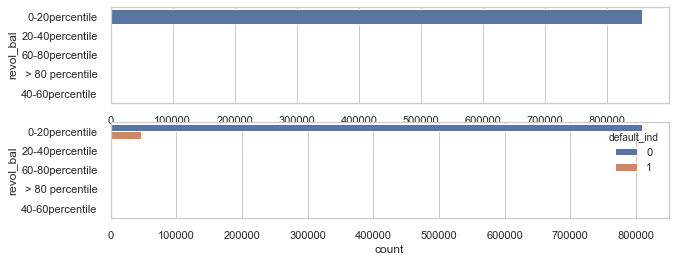

In [554]:
ldCleaned["revol_bal_percentiles"]=pd.Categorical(revolbal,["0-20percentile","20-40percentile","40-60percentile",
                                                            "60-80percentile","> 80 percentile"],ordered=True).copy()
stackRBP=ldCleaned.groupby("revol_bal_percentiles")["default_ind"].value_counts(normalize=True).unstack()
sns.set(rc={"figure.figsize":(10,6)})
sns.set_style("whitegrid")
subplot(3,1,1)
sns.countplot(y=revolbal)

subplot(3,1,2)
sns.countplot(y=revolbal,hue=ldCleaned.default_ind)

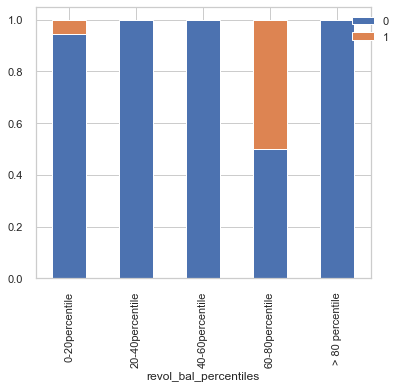

In [555]:
sns.set(rc={"figure.figsize":(6,5)})
sns.set_style("whitegrid")
stackRBP.plot(kind="bar",stacked=True)
plt.legend(loc="upper center",bbox_to_anchor=(1,1))

The maximum percentage of defaulters are in the 60-80percentile. and the other categories mostly dont defuakt except the 0-20 percentile category. Now since there are only 5-6 customers distributed acorss the 40percentile category. We need to impute the outliers and check the performance of the data in the 0-40 percentile category to get more insights in to the data

In [556]:
ub=ldCleaned.revol_bal.mean()+4.5*ldCleaned.revol_bal.std()
lb=ldCleaned.revol_bal.mean()-4.5*ldCleaned.revol_bal.std()
count=0
for i in ldCleaned.revol_bal:
    if (i >lb) & (i < ub):
        count=count+1
print(count)
print(ldCleaned.revol_bal.shape[0]-count)

850592
5377


It means that there are 5377 extreme outliers. Now since the data is skewed imputing the outliers with the median value

In [557]:
ldCleaned.loc[-((ldCleaned.revol_bal>lb)&(ldCleaned.revol_bal<ub)),"revol_bal"]=ldCleaned.revol_bal.median()

In [558]:
revolbal1=ldCleaned.revol_bal.copy()
revolbal1=revolbal1.astype("object")
maxrevolbal1=ldCleaned.revol_bal.max().copy()
maxrevolbal1

116884.0

In [559]:
j1=maxrevolbal1*20/100
j2=maxrevolbal1*40/100
j3=maxrevolbal1*60/100
j4=maxrevolbal1*80/100
revolbal1.loc[ldCleaned.revol_bal<=j1]="0-20percentile"
revolbal1.loc[(ldCleaned.revol_bal>j1)&(ldCleaned.revol_bal<=j2)]="20-40percentile"
revolbal1.loc[(ldCleaned.revol_bal>j2)&(ldCleaned.revol_bal<=j3)]="40-60percentile"
revolbal1.loc[(ldCleaned.revol_bal>j3)&(ldCleaned.revol_bal<=j4)]="60-80percentile"
revolbal1[ldCleaned.revol_bal>j4]="> 80 percentile"
print(revolbal1.tail(10),"revol_bal :",ldCleaned.revol_bal.tail(10))
revolbal1.value_counts()

855959     0-20percentile
855960     0-20percentile
855961     0-20percentile
855962     0-20percentile
855963     0-20percentile
855964     0-20percentile
855965     0-20percentile
855966     0-20percentile
855967     0-20percentile
855968    20-40percentile
Name: revol_bal, dtype: object revol_bal : 855959     1700.0
855960     6361.0
855961     6987.0
855962    21110.0
855963    18266.0
855964    14037.0
855965     8621.0
855966    11031.0
855967     8254.0
855968    33266.0
Name: revol_bal, dtype: float64


0-20percentile     683562
20-40percentile    141967
40-60percentile     21082
60-80percentile      6339
> 80 percentile      3019
Name: revol_bal, dtype: int64

In [560]:
ldCleaned["revol_bal1_percentiles"]=pd.Categorical(revolbal1,["0-20percentile","20-40percentile","40-60percentile",
                                                            "60-80percentile","> 80 percentile"],ordered=True).copy()

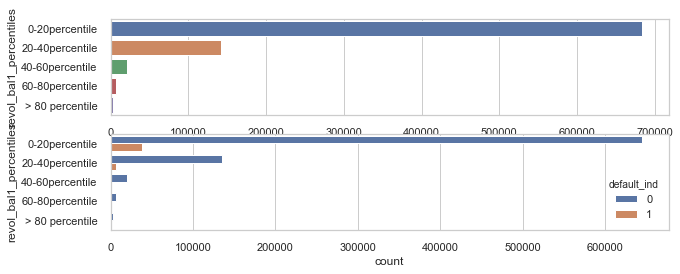

In [561]:
stackRB1P=ldCleaned.groupby("revol_bal1_percentiles")["default_ind"].value_counts(normalize=True).unstack()
sns.set(rc={"figure.figsize":(10,6)})
sns.set_style("whitegrid")
subplot(3,1,1)
sns.countplot(y=ldCleaned.revol_bal1_percentiles)

subplot(3,1,2)
sns.countplot(y=ldCleaned.revol_bal1_percentiles,hue=ldCleaned.default_ind)

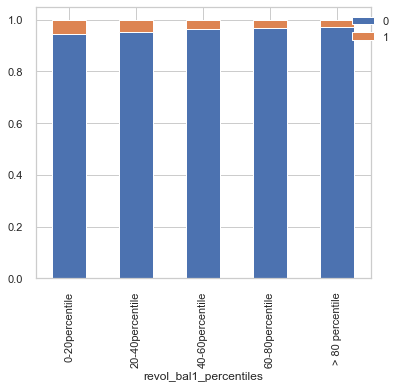

In [562]:
sns.set(rc={"figure.figsize":(6,5)})
sns.set_style("whitegrid")
stackRB1P.plot(kind="bar",stacked=True)
plt.legend(loc="upper center",bbox_to_anchor=(1,1))

In [563]:
print("20%",j1,"40%",j2,"60%",j3,"80%",j4)

20% 23376.8 40% 46753.6 60% 70130.4 80% 93507.2


This clearly indicates that the no of defaulters decreases as the revolving balance increases.We need to investigate using the ANOVA or kruskal walis test if this variable is actually significant or not.

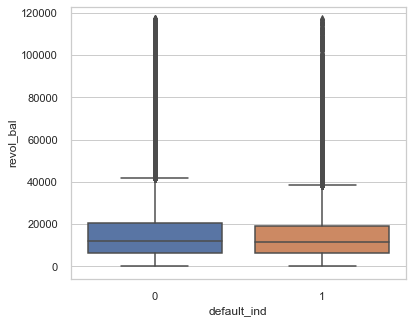

In [564]:
sns.boxplot(y="revol_bal",x="default_ind",data=ldCleaned)

In [565]:
ldFinalDataset=pd.concat([ldFinalDataset,ldCleaned.revol_bal],axis=1).copy()

In [566]:
ldFinalDataset.columns

Index(['sub_grade', 'term', 'emp_length_ord', 'home_ownership',
       'verification_status', 'purpose', 'addr_state', 'initial_list_status',
       'int_rate', 'annual_inc', 'dti', 'revol_bal'],
      dtype='object')

In [567]:
colnum3.head(8)

0       funded_amnt
1          int_rate
2        annual_inc
3               dti
4       delinq_2yrs
5    inq_last_6mths
6          open_acc
7           pub_rec
dtype: object

In [568]:
print("max:" ,ldCleaned.revol_util.max(),"min: ",ldCleaned.revol_util.min(),"quartiles: ",
      ldCleaned.revol_util.quantile([0.25,0.50,0.75]))

max: 892.3 min:  0.0 quartiles:  0.25    37.6
0.50    55.9
0.75    73.5
Name: revol_util, dtype: float64


it means that there are lot of outliers. let us first check the data distribution for the data with outliers and then we will remove the outlier and see the impact of the range on the defaulter status

In [569]:
revolutil=ldCleaned.revol_util.copy()
revolutil=revolutil.astype("object")
maxrevolutil=ldCleaned.revol_util.max().copy()
maxrevolutil

892.3

In [570]:
j1=maxrevolutil*20/100
j2=maxrevolutil*40/100
j3=maxrevolutil*60/100
j4=maxrevolutil*80/100
revolutil.loc[ldCleaned.revol_util<=j1]="0-20percentile"
revolutil.loc[(ldCleaned.revol_util>j1)&(ldCleaned.revol_util<=j2)]="20-40percentile"
revolutil.loc[(ldCleaned.revol_util>j2)&(ldCleaned.revol_util<=j3)]="40-60percentile"
revolutil.loc[(ldCleaned.revol_util>j3)&(ldCleaned.revol_util<=j4)]="60-80percentile"
revolutil[ldCleaned.revol_util>j4]="> 80 percentile"
print(revolutil.tail(10),"revol_util :",ldCleaned.revol_util.tail(10))
print(revolutil.value_counts())

855959    0-20percentile
855960    0-20percentile
855961    0-20percentile
855962    0-20percentile
855963    0-20percentile
855964    0-20percentile
855965    0-20percentile
855966    0-20percentile
855967    0-20percentile
855968    0-20percentile
Name: revol_util, dtype: object revol_util : 855959     5.6
855960    43.9
855961    41.6
855962    69.7
855963    65.0
855964    82.1
855965    84.5
855966    61.3
855967    30.6
855968    79.8
Name: revol_util, dtype: float64
0-20percentile     855518
20-40percentile         4
> 80 percentile         1
Name: revol_util, dtype: int64


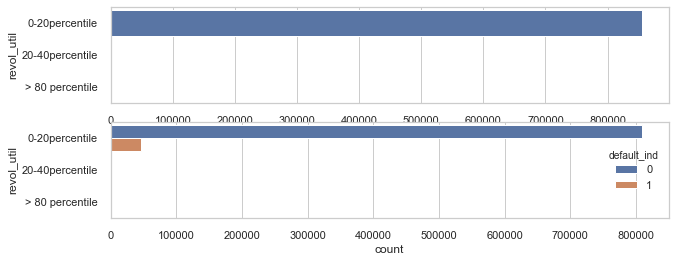

In [571]:
ldCleaned["revol_util_percentiles"]=pd.Categorical(revolutil).copy()
stackRUP=ldCleaned.groupby("revol_util_percentiles")["default_ind"].value_counts(normalize=True).unstack()
sns.set(rc={"figure.figsize":(10,6)})
sns.set_style("whitegrid")
subplot(3,1,1)
sns.countplot(y=revolutil)

subplot(3,1,2)
sns.countplot(y=revolutil,hue=ldCleaned.default_ind)

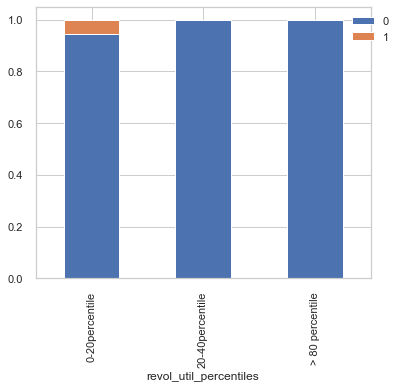

In [572]:
sns.set(rc={"figure.figsize":(6,5)})
sns.set_style("whitegrid")
stackRUP.plot(kind="bar",stacked=True)
plt.legend(loc="upper center",bbox_to_anchor=(1,1))

In [573]:
print("20%",j1,"40%",j2,"60%",j3,"80%",j4)

20% 178.46 40% 356.92 60% 535.38 80% 713.84


It seems from the above distribution that there hardly 5 customers with revolving utilization above 178. There we will now impute the outliers and check the distribution withing the range of 20 percentile alone

In [574]:
ub=ldCleaned.revol_util.mean()+4.5*ldCleaned.revol_util.std()
lb=ldCleaned.revol_util.mean()-4.5*ldCleaned.revol_util.std()
count=0
for i in ldCleaned.revol_util:
    if (i >lb) & (i < ub):
        count=count+1
print(count)
print(ldCleaned.revol_util.shape[0]-count)

855516
453


There are therefore 453 outliers. We will impute them by median since the data is skewed

In [575]:
ldCleaned.loc[-((ldCleaned.revol_util>lb)&(ldCleaned.revol_util<ub)),"revol_util"]=ldCleaned.revol_util.median()

In [576]:
revolutil1=ldCleaned.revol_util.copy()
revolutil1=revolutil1.astype("object")
maxrevolutil1=ldCleaned.revol_util.max().copy()
maxrevolutil1

161.5

In [577]:
j1=maxrevolutil1*20/100
j2=maxrevolutil1*40/100
j3=maxrevolutil1*60/100
j4=maxrevolutil1*80/100
revolutil1.loc[ldCleaned.revol_util<=j1]="0-20percentile"
revolutil1.loc[(ldCleaned.revol_util>j1)&(ldCleaned.revol_util<=j2)]="20-40percentile"
revolutil1.loc[(ldCleaned.revol_util>j2)&(ldCleaned.revol_util<=j3)]="40-60percentile"
revolutil1.loc[(ldCleaned.revol_util>j3)&(ldCleaned.revol_util<=j4)]="60-80percentile"
revolutil1[ldCleaned.revol_util>j4]="> 80 percentile"
print(revolutil1.tail(10),"revol_util :",ldCleaned.revol_util.tail(10))
print(revolutil1.value_counts())

855959     0-20percentile
855960    20-40percentile
855961    20-40percentile
855962    40-60percentile
855963    40-60percentile
855964    40-60percentile
855965    40-60percentile
855966    20-40percentile
855967     0-20percentile
855968    40-60percentile
Name: revol_util, dtype: object revol_util : 855959     5.6
855960    43.9
855961    41.6
855962    69.7
855963    65.0
855964    82.1
855965    84.5
855966    61.3
855967    30.6
855968    79.8
Name: revol_util, dtype: float64
20-40percentile    375266
40-60percentile    302891
0-20percentile     162279
60-80percentile     15504
> 80 percentile        29
Name: revol_util, dtype: int64


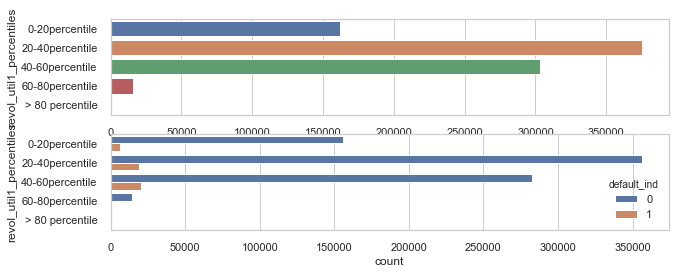

In [578]:
ldCleaned["revol_util1_percentiles"]=pd.Categorical(revolutil1,["0-20percentile","20-40percentile","40-60percentile",
                                                            "60-80percentile","> 80 percentile"],ordered=True).copy()
stackRU1P=ldCleaned.groupby("revol_util1_percentiles")["default_ind"].value_counts(normalize=True).unstack()
sns.set(rc={"figure.figsize":(10,6)})
sns.set_style("whitegrid")
subplot(3,1,1)
sns.countplot(y=ldCleaned.revol_util1_percentiles)

subplot(3,1,2)
sns.countplot(y=ldCleaned.revol_util1_percentiles,hue=ldCleaned.default_ind)

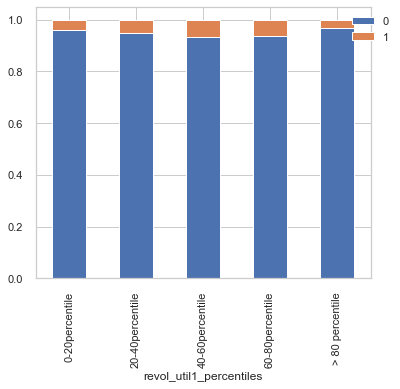

In [579]:
sns.set(rc={"figure.figsize":(6,5)})
sns.set_style("whitegrid")
stackRU1P.plot(kind="bar",stacked=True)
plt.legend(loc="upper center",bbox_to_anchor=(1,1))

In [580]:
print("20% :",j1,"40% :" ,j2,"60% : ",j3, "80% : ",j4,"max: ",ldCleaned.revol_util.max(),
     "min: ",ldCleaned.revol_util.min())

20% : 32.3 40% : 64.6 60% :  96.9 80% :  129.2 max:  161.5 min:  0.0


It shows that the defaulter rate increases as the revolving utilisation increase from 0 to 129 but it decreases after within the range of 161.5. We need to further investigate if the revolving utilisation impacts the defaulter status using the ANOVA or kruskal walis test

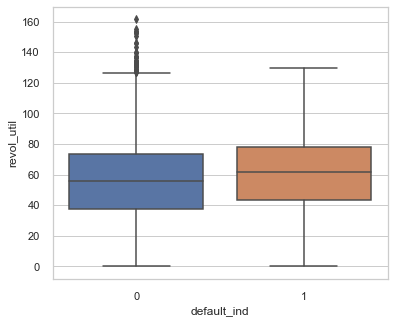

In [581]:
sns.boxplot(y=ldCleaned.revol_util,x=ldCleaned.default_ind)

In [582]:
ldFinalDataset=pd.concat([ldFinalDataset,ldCleaned.revol_util],axis=1).copy()
ldFinalDataset.columns

Index(['sub_grade', 'term', 'emp_length_ord', 'home_ownership',
       'verification_status', 'purpose', 'addr_state', 'initial_list_status',
       'int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util'],
      dtype='object')

In [583]:
colnum2.head(10)

0       funded_amnt
1          int_rate
2        annual_inc
3               dti
4       delinq_2yrs
5    inq_last_6mths
6          open_acc
7           pub_rec
8         revol_bal
9        revol_util
dtype: object

In [584]:
print("max : ",ldCleaned.total_acc.max(),
      "min :",ldCleaned.total_acc.min(),
      "quartiles: ",ldCleaned.total_acc.quantile([0.25,0.50,0.75]))

max :  169.0 min : 2.0 quartiles:  0.25    17.0
0.50    24.0
0.75    32.0
Name: total_acc, dtype: float64


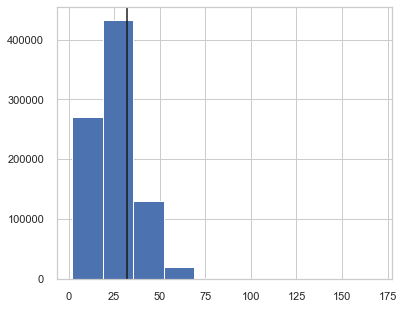

In [585]:
plt.hist(ldCleaned.total_acc)
plt.axvline(x=32.0,color="k")
plt.show()

In [586]:
totalacc=ldCleaned.total_acc.copy()
totalacc=totalacc.astype("object")
maxtotalacc=ldCleaned.total_acc.max().copy()
maxtotalacc

169.0

In [587]:
j1=maxtotalacc*20/100
j2=maxtotalacc*40/100
j3=maxtotalacc*60/100
j4=maxtotalacc*80/100
totalacc.loc[ldCleaned.total_acc<=j1]="0-20percentile"
totalacc.loc[(ldCleaned.total_acc>j1)&(ldCleaned.total_acc<=j2)]="20-40percentile"
totalacc.loc[(ldCleaned.total_acc>j2)&(ldCleaned.total_acc<=j3)]="40-60percentile"
totalacc.loc[(ldCleaned.total_acc>j3)&(ldCleaned.total_acc<=j4)]="60-80percentile"
totalacc[ldCleaned.total_acc>j4]="> 80 percentile"
print(totalacc.tail(10),"total_acc :",ldCleaned.total_acc.tail(10))
print(totalacc.value_counts())

855959     0-20percentile
855960     0-20percentile
855961     0-20percentile
855962    20-40percentile
855963     0-20percentile
855964     0-20percentile
855965     0-20percentile
855966     0-20percentile
855967     0-20percentile
855968     0-20percentile
Name: total_acc, dtype: object total_acc : 855959    30.0
855960    29.0
855961    20.0
855962    61.0
855963    18.0
855964    15.0
855965    23.0
855966    22.0
855967    20.0
855968    10.0
Name: total_acc, dtype: float64
0-20percentile     669645
20-40percentile    183664
40-60percentile      2593
60-80percentile        58
> 80 percentile         9
Name: total_acc, dtype: int64


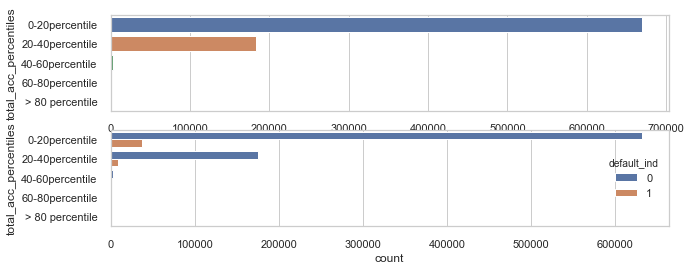

In [588]:
ldCleaned["total_acc_percentiles"]=pd.Categorical(totalacc,["0-20percentile","20-40percentile","40-60percentile",
                                                            "60-80percentile","> 80 percentile"],ordered=True).copy()
stackTAP=ldCleaned.groupby("total_acc_percentiles")["default_ind"].value_counts(normalize=True).unstack()
sns.set(rc={"figure.figsize":(10,6)})
sns.set_style("whitegrid")
subplot(3,1,1)
sns.countplot(y=ldCleaned.total_acc_percentiles)

subplot(3,1,2)
sns.countplot(y=ldCleaned.total_acc_percentiles,hue=ldCleaned.default_ind)

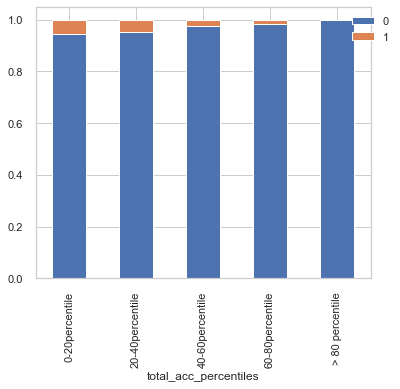

In [589]:
sns.set(rc={"figure.figsize":(6,5)})
sns.set_style("whitegrid")
stackTAP.plot(kind="bar",stacked=True)
plt.legend(loc="upper center",bbox_to_anchor=(1,1))

In [590]:
print("20%",j1,"40%",j2,"60%",j3,"80%",j4)

20% 33.8 40% 67.6 60% 101.4 80% 135.2


It indicates that the no of records are very less for customers having more than 67 total accounts. also across each category the percent of defaulters decreases as the total number of accounts of a person increases. indicating that their are maximum defaulters with total accounts less than 33 and minimum to no defaulters with account more than 135. Now let us remove the outliers and check the impact on the actual data without extreme outliers on the defaulter status.

In [591]:
ub=ldCleaned.total_acc.mean()+4.5*ldCleaned.total_acc.std()
lb=ldCleaned.total_acc.mean()-4.5*ldCleaned.total_acc.std()
count=0
for i in ldCleaned.total_acc:
    if (i >lb) & (i < ub):
        count=count+1
print(count)
print(ldCleaned.total_acc.shape[0]-count)

855205
764


There are 764 outliers. Therefore imputing those outliers with median value as the data is highly skewed.

In [592]:
ldCleaned.loc[-((ldCleaned.total_acc>lb)&(ldCleaned.total_acc<ub)),"total_acc"]=ldCleaned.total_acc.median()

In [593]:
totalacc1=ldCleaned.total_acc.copy()
totalacc1=totalacc1.astype("object")
maxtotalacc1=ldCleaned.total_acc.max().copy()
maxtotalacc1

78.0

In [594]:
j1=maxtotalacc1*20/100
j2=maxtotalacc1*40/100
j3=maxtotalacc1*60/100
j4=maxtotalacc1*80/100
totalacc1.loc[ldCleaned.total_acc<=j1]="0-20percentile"
totalacc1.loc[(ldCleaned.total_acc>j1)&(ldCleaned.total_acc<=j2)]="20-40percentile"
totalacc1.loc[(ldCleaned.total_acc>j2)&(ldCleaned.total_acc<=j3)]="40-60percentile"
totalacc1.loc[(ldCleaned.total_acc>j3)&(ldCleaned.total_acc<=j4)]="60-80percentile"
totalacc1[ldCleaned.total_acc>j4]="> 80 percentile"
print(totalacc1.tail(10),"total_acc :",ldCleaned.total_acc.tail(10))
print(totalacc1.value_counts())

855959    20-40percentile
855960    20-40percentile
855961    20-40percentile
855962    60-80percentile
855963    20-40percentile
855964     0-20percentile
855965    20-40percentile
855966    20-40percentile
855967    20-40percentile
855968     0-20percentile
Name: total_acc, dtype: object total_acc : 855959    30.0
855960    29.0
855961    20.0
855962    61.0
855963    18.0
855964    15.0
855965    23.0
855966    22.0
855967    20.0
855968    10.0
Name: total_acc, dtype: float64
20-40percentile    449543
0-20percentile     182206
40-60percentile    179030
60-80percentile     39905
> 80 percentile      5285
Name: total_acc, dtype: int64


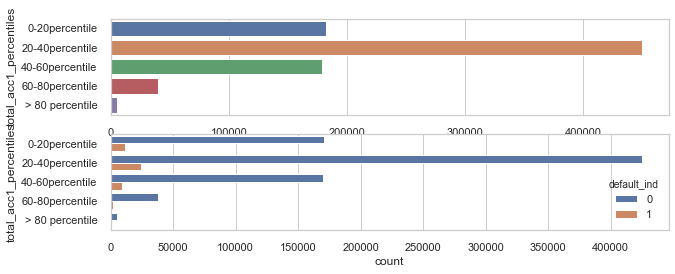

In [595]:
ldCleaned["total_acc1_percentiles"]=pd.Categorical(totalacc1,["0-20percentile","20-40percentile","40-60percentile",
                                                            "60-80percentile","> 80 percentile"],ordered=True).copy()
stackTA1P=ldCleaned.groupby("total_acc1_percentiles")["default_ind"].value_counts(normalize=True).unstack()
sns.set(rc={"figure.figsize":(10,6)})
sns.set_style("whitegrid")
subplot(3,1,1)
sns.countplot(y=ldCleaned.total_acc1_percentiles)

subplot(3,1,2)
sns.countplot(y=ldCleaned.total_acc1_percentiles,hue=ldCleaned.default_ind)

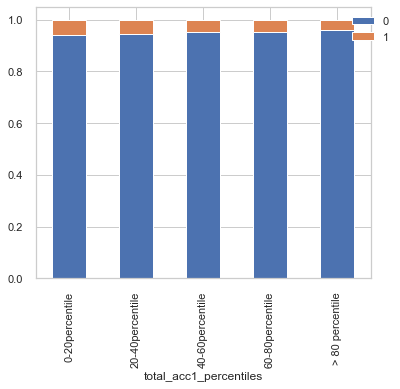

In [596]:
sns.set(rc={"figure.figsize":(6,5)})
sns.set_style("whitegrid")
stackTA1P.plot(kind="bar",stacked=True)
plt.legend(loc="upper center",bbox_to_anchor=(1,1))

In [597]:
print("20%",j1,"40%",j2,"60%",j3,"80%",j4)

20% 15.6 40% 31.2 60% 46.8 80% 62.4


It is appeared that there are chances of more defaulters in the category of less than 15 total no of credit lines in the borrowers credit file. And the chances of being a defaulter decreases as we move towards 62> more accounts. This trend is consistent with the trend that we saw with the outliers in the data. So we can safely assume that as the no of total credit lines of user increases the chances of him being a defaulter reduces slightly.

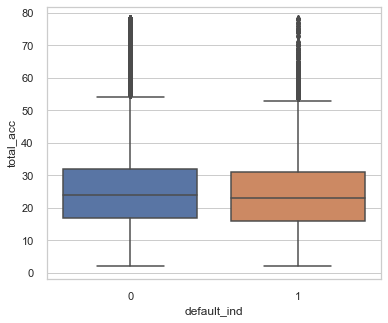

In [598]:
sns.boxplot(y="total_acc",x="default_ind",data=ldCleaned)

In [599]:
ldFinalDataset=pd.concat([ldFinalDataset,ldCleaned.total_acc],axis=1).copy()
ldFinalDataset.columns

Index(['sub_grade', 'term', 'emp_length_ord', 'home_ownership',
       'verification_status', 'purpose', 'addr_state', 'initial_list_status',
       'int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util',
       'total_acc'],
      dtype='object')

In [600]:
colnum3.head(12)

0        funded_amnt
1           int_rate
2         annual_inc
3                dti
4        delinq_2yrs
5     inq_last_6mths
6           open_acc
7            pub_rec
8          revol_bal
9         revol_util
10         total_acc
11         out_prncp
dtype: object

In [601]:
print(ldCleaned.out_prncp.isnull().sum())
print("quantiles: ",ldCleaned.out_prncp.quantile([0,0.25,0.50,0.75,1]))

0
quantiles:  0.00        0.00
0.25        0.00
0.50     6290.25
0.75    13528.80
1.00    49372.86
Name: out_prncp, dtype: float64


In [602]:
outprncp=ldCleaned.out_prncp.copy()
outprncp=outprncp.astype("object")
maxoutprncp=ldCleaned.out_prncp.max().copy()
maxoutprncp

49372.86

In [603]:
j1=maxoutprncp*20/100
j2=maxoutprncp*40/100
j3=maxoutprncp*60/100
j4=maxoutprncp*80/100
outprncp.loc[ldCleaned.out_prncp<=j1]="0-20percentile"
outprncp.loc[(ldCleaned.out_prncp>j1)&(ldCleaned.out_prncp<=j2)]="20-40percentile"
outprncp.loc[(ldCleaned.out_prncp>j2)&(ldCleaned.out_prncp<=j3)]="40-60percentile"
outprncp.loc[(ldCleaned.out_prncp>j3)&(ldCleaned.out_prncp<=j4)]="60-80percentile"
outprncp[ldCleaned.out_prncp>j4]="> 80 percentile"
print(outprncp.tail(10),"out_prncp :",ldCleaned.out_prncp.tail(10))
outprncp.value_counts()

855959     0-20percentile
855960     0-20percentile
855961     0-20percentile
855962     0-20percentile
855963     0-20percentile
855964     0-20percentile
855965    20-40percentile
855966    20-40percentile
855967    20-40percentile
855968    20-40percentile
Name: out_prncp, dtype: object out_prncp : 855959        0.00
855960     5232.15
855961        0.00
855962     8466.56
855963     8296.52
855964     7055.47
855965    16933.26
855966    11155.50
855967    10447.31
855968    14110.94
Name: out_prncp, dtype: float64


0-20percentile     545304
20-40percentile    213135
40-60percentile     79083
60-80percentile     18444
> 80 percentile         3
Name: out_prncp, dtype: int64

In [604]:
ldCleaned["out_prncp_percentiles"]=pd.Categorical(outprncp,["0-20percentile","20-40percentile","40-60percentile",
                                                            "60-80percentile","> 80 percentile"],ordered=True).copy()

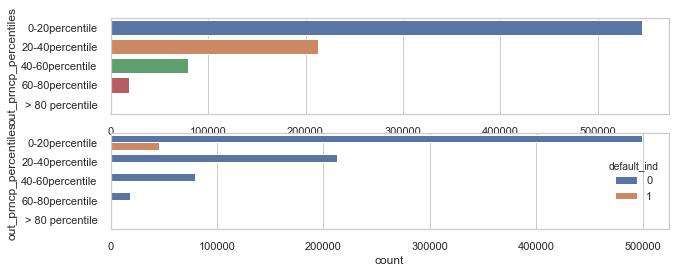

In [605]:
stackOPP=ldCleaned.groupby("out_prncp_percentiles")["default_ind"].value_counts(normalize=True).unstack()
sns.set(rc={"figure.figsize":(10,6)})
sns.set_style("whitegrid")
subplot(3,1,1)
sns.countplot(y=ldCleaned.out_prncp_percentiles)

subplot(3,1,2)
sns.countplot(y=ldCleaned.out_prncp_percentiles,hue=ldCleaned.default_ind)

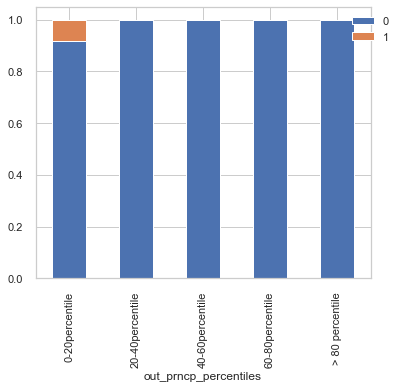

In [606]:
sns.set(rc={"figure.figsize":(6,5)})
sns.set_style("whitegrid")
stackOPP.plot(kind="bar",stacked=True)
plt.legend(loc="upper center",bbox_to_anchor=(1,1))

Almost 5lac customers belong upto the 20 percentile category.and almost all defaulters are from the upto 20 percentile category.Therefore removing outliers to check impact on defaulter status.

In [607]:
ub=ldCleaned.out_prncp.mean()+4.5*ldCleaned.out_prncp.std()
lb=ldCleaned.out_prncp.mean()-4.5*ldCleaned.out_prncp.std()
count=0
for i in ldCleaned.out_prncp:
    if (i >lb) & (i < ub):
        count=count+1
print(count)
print(ldCleaned.out_prncp.shape[0]-count)

855967
2


In [608]:
ldCleaned.loc[-((ldCleaned.out_prncp>lb)&(ldCleaned.out_prncp<ub)),"out_prncp"]=ldCleaned.out_prncp.median()

In [609]:
outprncp1=ldCleaned.out_prncp.copy()
outprncp1=outprncp1.astype("object")
maxoutprncp1=ldCleaned.out_prncp.max().copy()
maxoutprncp1

40374.86

In [610]:
j1=maxoutprncp1*20/100
j2=maxoutprncp1*40/100
j3=maxoutprncp1*60/100
j4=maxoutprncp1*80/100
outprncp1.loc[ldCleaned.out_prncp<=j1]="0-20percentile"
outprncp1.loc[(ldCleaned.out_prncp>j1)&(ldCleaned.out_prncp<=j2)]="20-40percentile"
outprncp1.loc[(ldCleaned.out_prncp>j2)&(ldCleaned.out_prncp<=j3)]="40-60percentile"
outprncp1.loc[(ldCleaned.out_prncp>j3)&(ldCleaned.out_prncp<=j4)]="60-80percentile"
outprncp1[ldCleaned.out_prncp>j4]="> 80 percentile"
print(outprncp1.tail(10),"out_prncp :",ldCleaned.out_prncp.tail(10))
outprncp1.value_counts()

855959     0-20percentile
855960     0-20percentile
855961     0-20percentile
855962    20-40percentile
855963    20-40percentile
855964     0-20percentile
855965    40-60percentile
855966    20-40percentile
855967    20-40percentile
855968    20-40percentile
Name: out_prncp, dtype: object out_prncp : 855959        0.00
855960     5232.15
855961        0.00
855962     8466.56
855963     8296.52
855964     7055.47
855965    16933.26
855966    11155.50
855967    10447.31
855968    14110.94
Name: out_prncp, dtype: float64


0-20percentile     484138
20-40percentile    215044
40-60percentile    106734
60-80percentile     40702
> 80 percentile      9351
Name: out_prncp, dtype: int64

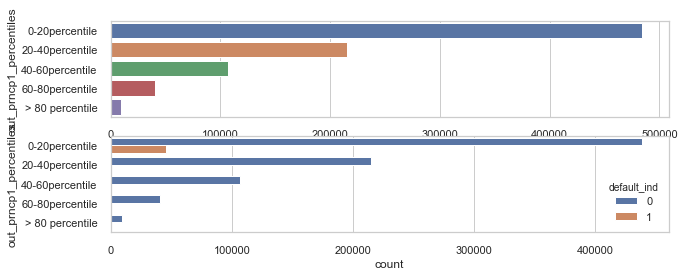

In [611]:
ldCleaned["out_prncp1_percentiles"]=pd.Categorical(outprncp1,["0-20percentile","20-40percentile","40-60percentile",
                                                            "60-80percentile","> 80 percentile"],ordered=True).copy()
stackOP1P=ldCleaned.groupby("out_prncp1_percentiles")["default_ind"].value_counts(normalize=True).unstack()
sns.set(rc={"figure.figsize":(10,6)})
sns.set_style("whitegrid")
subplot(3,1,1)
sns.countplot(y=ldCleaned.out_prncp1_percentiles)

subplot(3,1,2)
sns.countplot(y=ldCleaned.out_prncp1_percentiles,hue=ldCleaned.default_ind)

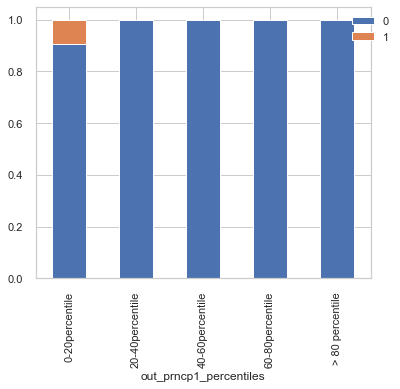

In [612]:
sns.set(rc={"figure.figsize":(6,5)})
sns.set_style("whitegrid")
stackOP1P.plot(kind="bar",stacked=True)
plt.legend(loc="upper center",bbox_to_anchor=(1,1))

In [613]:
print("20%",j1,"40%",j2,"60%",j3,"80%",j4)

20% 8074.972 40% 16149.944 60% 24224.916 80% 32299.888


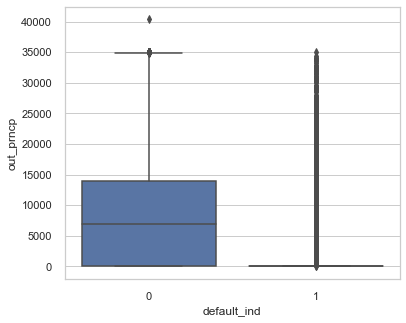

In [614]:
sns.boxplot(y="out_prncp",x="default_ind",data=ldCleaned)

As we can see there were only two extreme outliers. And after removing them also we got the same distribution. It means that the chances of a person defaulting is higher in the 20 percentile range that is below 8k.

In [615]:
ldFinalDataset=pd.concat([ldFinalDataset,ldCleaned.out_prncp],axis=1).copy()
ldFinalDataset.columns

Index(['sub_grade', 'term', 'emp_length_ord', 'home_ownership',
       'verification_status', 'purpose', 'addr_state', 'initial_list_status',
       'int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp'],
      dtype='object')

In [616]:
colnum3.head(17)

0          funded_amnt
1             int_rate
2           annual_inc
3                  dti
4          delinq_2yrs
5       inq_last_6mths
6             open_acc
7              pub_rec
8            revol_bal
9           revol_util
10           total_acc
11           out_prncp
12         total_pymnt
13     last_pymnt_amnt
14         tot_cur_bal
15         default_ind
16    loan_funded_diff
dtype: object

In [617]:
totalpymnt=ldCleaned.total_pymnt.copy()
totalpymnt=totalpymnt.astype("object")
maxtotalpymnt=ldCleaned.total_pymnt.max().copy()
maxtotalpymnt

57777.5798702

In [618]:
j1=maxtotalpymnt*20/100
j2=maxtotalpymnt*40/100
j3=maxtotalpymnt*60/100
j4=maxtotalpymnt*80/100
totalpymnt.loc[ldCleaned.total_pymnt<=j1]="0-20percentile"
totalpymnt.loc[(ldCleaned.total_pymnt>j1)&(ldCleaned.total_pymnt<=j2)]="20-40percentile"
totalpymnt.loc[(ldCleaned.total_pymnt>j2)&(ldCleaned.total_pymnt<=j3)]="40-60percentile"
totalpymnt.loc[(ldCleaned.total_pymnt>j3)&(ldCleaned.total_pymnt<=j4)]="60-80percentile"
totalpymnt[ldCleaned.total_pymnt>j4]="> 80 percentile"
print(totalpymnt.tail(10),"total_pymnt :",ldCleaned.total_pymnt.tail(10))
totalpymnt.value_counts()

855959    0-20percentile
855960    0-20percentile
855961    0-20percentile
855962    0-20percentile
855963    0-20percentile
855964    0-20percentile
855965    0-20percentile
855966    0-20percentile
855967    0-20percentile
855968    0-20percentile
Name: total_pymnt, dtype: object total_pymnt : 855959    4158.02
855960    2874.73
855961    2396.05
855962    4766.25
855963    4863.33
855964    3971.88
855965    9532.39
855966    3769.74
855967    3787.67
855968    7943.76
Name: total_pymnt, dtype: float64


0-20percentile     663190
20-40percentile    143848
40-60percentile     37153
60-80percentile     11043
> 80 percentile       735
Name: total_pymnt, dtype: int64

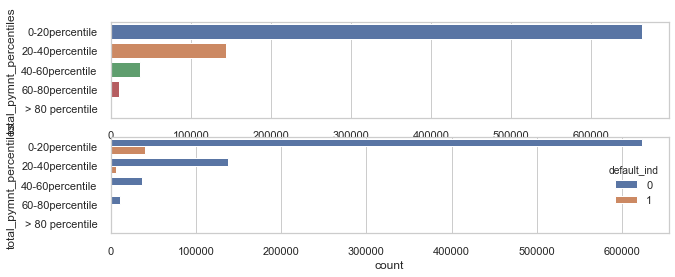

In [619]:
ldCleaned["total_pymnt_percentiles"]=pd.Categorical(totalpymnt,["0-20percentile","20-40percentile","40-60percentile",
                                                            "60-80percentile","> 80 percentile"],ordered=True).copy()


stackTPP=ldCleaned.groupby("total_pymnt_percentiles")["default_ind"].value_counts(normalize=True).unstack()

sns.set(rc={"figure.figsize":(10,6)})
sns.set_style("whitegrid")
subplot(3,1,1)
sns.countplot(y=ldCleaned.total_pymnt_percentiles)

subplot(3,1,2)
sns.countplot(y=ldCleaned.total_pymnt_percentiles,hue=ldCleaned.default_ind)

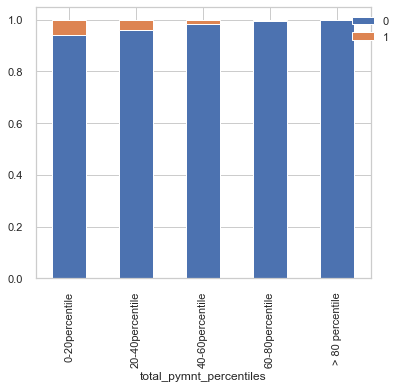

In [620]:
sns.set(rc={"figure.figsize":(6,5)})
sns.set_style("whitegrid")
stackTPP.plot(kind="bar",stacked=True)
plt.legend(loc="upper center",bbox_to_anchor=(1,1))

It is appeared that the no of defaulters increases as rthe percentile increases from 20 to >80%

In [621]:
ub=ldCleaned.total_pymnt.mean()+4.5*ldCleaned.total_pymnt.std()
lb=ldCleaned.total_pymnt.mean()-4.5*ldCleaned.total_pymnt.std()
count=0
for i in ldCleaned.total_pymnt:
    if (i >lb) & (i < ub):
        count=count+1
print(count)
print(ldCleaned.total_pymnt.shape[0]-count)

854145
1824


In [622]:
ldCleaned.loc[-((ldCleaned.total_pymnt>lb)&(ldCleaned.total_pymnt<ub)),"total_pymnt"]=ldCleaned.total_pymnt.median()

In [623]:
totalpymnt1=ldCleaned.total_pymnt.copy()
totalpymnt1=totalpymnt1.astype("object")
maxtotalpymnt1=ldCleaned.total_pymnt.max().copy()
maxtotalpymnt1

43245.0474461

In [624]:
j1=maxtotalpymnt1*20/100
j2=maxtotalpymnt1*40/100
j3=maxtotalpymnt1*60/100
j4=maxtotalpymnt1*80/100
totalpymnt1.loc[ldCleaned.total_pymnt<=j1]="0-20percentile"
totalpymnt1.loc[(ldCleaned.total_pymnt>j1)&(ldCleaned.total_pymnt<=j2)]="20-40percentile"
totalpymnt1.loc[(ldCleaned.total_pymnt>j2)&(ldCleaned.total_pymnt<=j3)]="40-60percentile"
totalpymnt1.loc[(ldCleaned.total_pymnt>j3)&(ldCleaned.total_pymnt<=j4)]="60-80percentile"
totalpymnt1[ldCleaned.total_pymnt>j4]="> 80 percentile"
print(totalpymnt1.tail(10),"total_pymnt :",ldCleaned.total_pymnt.tail(10))
totalpymnt1.value_counts()


855959     0-20percentile
855960     0-20percentile
855961     0-20percentile
855962     0-20percentile
855963     0-20percentile
855964     0-20percentile
855965    20-40percentile
855966     0-20percentile
855967     0-20percentile
855968     0-20percentile
Name: total_pymnt, dtype: object total_pymnt : 855959    4158.02
855960    2874.73
855961    2396.05
855962    4766.25
855963    4863.33
855964    3971.88
855965    9532.39
855966    3769.74
855967    3787.67
855968    7943.76
Name: total_pymnt, dtype: float64


0-20percentile     585657
20-40percentile    174483
40-60percentile     63208
60-80percentile     22586
> 80 percentile     10035
Name: total_pymnt, dtype: int64

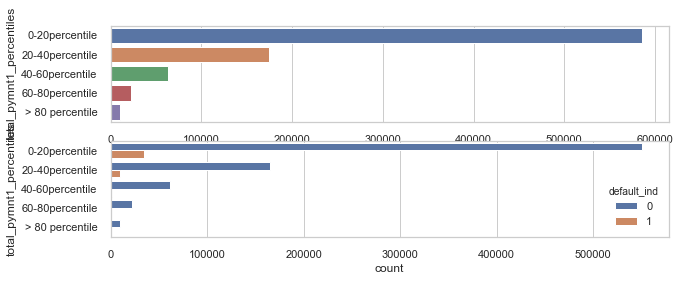

In [625]:
ldCleaned["total_pymnt1_percentiles"]=pd.Categorical(totalpymnt1,["0-20percentile","20-40percentile","40-60percentile",
                                                            "60-80percentile","> 80 percentile"],ordered=True).copy()


stackTP1P=ldCleaned.groupby("total_pymnt1_percentiles")["default_ind"].value_counts(normalize=True).unstack()

sns.set(rc={"figure.figsize":(10,6)})
sns.set_style("whitegrid")
subplot(3,1,1)
sns.countplot(y=ldCleaned.total_pymnt1_percentiles)

subplot(3,1,2)
sns.countplot(y=ldCleaned.total_pymnt1_percentiles,hue=ldCleaned.default_ind)

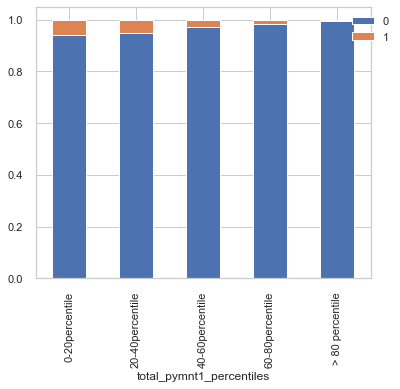

In [626]:
sns.set(rc={"figure.figsize":(6,5)})
sns.set_style("whitegrid")
stackTP1P.plot(kind="bar",stacked=True)
plt.legend(loc="upper center",bbox_to_anchor=(1,1))

It is observed that the trend is still persisted even after removing outliers.

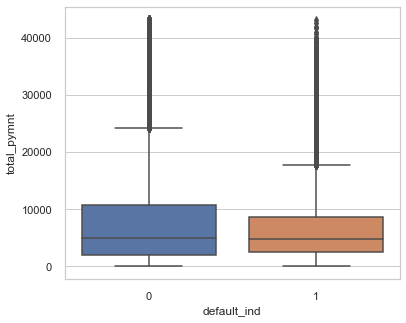

In [627]:
sns.boxplot(y="total_pymnt",x="default_ind",data=ldCleaned)

In [628]:
ldFinalDataset=pd.concat([ldFinalDataset,ldCleaned.total_pymnt],axis=1).copy()
print(ldFinalDataset.columns)
print(ldFinalDataset.shape)

Index(['sub_grade', 'term', 'emp_length_ord', 'home_ownership',
       'verification_status', 'purpose', 'addr_state', 'initial_list_status',
       'int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'total_pymnt'],
      dtype='object')
(855969, 16)


In [629]:
colnum3.head(16)

0         funded_amnt
1            int_rate
2          annual_inc
3                 dti
4         delinq_2yrs
5      inq_last_6mths
6            open_acc
7             pub_rec
8           revol_bal
9          revol_util
10          total_acc
11          out_prncp
12        total_pymnt
13    last_pymnt_amnt
14        tot_cur_bal
15        default_ind
dtype: object

In [630]:
lastpymntamnt=ldCleaned.last_pymnt_amnt.copy()
lastpymntamnt=lastpymntamnt.astype("object")
maxlastpymntamnt=ldCleaned.last_pymnt_amnt.max().copy()
print(maxlastpymntamnt)


j1=maxlastpymntamnt*20/100
j2=maxlastpymntamnt*40/100
j3=maxlastpymntamnt*60/100
j4=maxlastpymntamnt*80/100
lastpymntamnt.loc[ldCleaned.last_pymnt_amnt<=j1]="0-20percentile"
lastpymntamnt.loc[(ldCleaned.last_pymnt_amnt>j1)&(ldCleaned.last_pymnt_amnt<=j2)]="20-40percentile"
lastpymntamnt.loc[(ldCleaned.last_pymnt_amnt>j2)&(ldCleaned.last_pymnt_amnt<=j3)]="40-60percentile"
lastpymntamnt.loc[(ldCleaned.last_pymnt_amnt>j3)&(ldCleaned.last_pymnt_amnt<=j4)]="60-80percentile"
lastpymntamnt[ldCleaned.last_pymnt_amnt>j4]="> 80 percentile"
print(lastpymntamnt.tail(10),"last_pymnt_amnt :",ldCleaned.last_pymnt_amnt.tail(10))
lastpymntamnt.value_counts()


36475.59
855959    0-20percentile
855960    0-20percentile
855961    0-20percentile
855962    0-20percentile
855963    0-20percentile
855964    0-20percentile
855965    0-20percentile
855966    0-20percentile
855967    0-20percentile
855968    0-20percentile
Name: last_pymnt_amnt, dtype: object last_pymnt_amnt : 855959    3655.51
855960     240.22
855961      25.00
855962     398.52
855963     404.61
855964     332.10
855965     797.03
855966     316.07
855967     317.86
855968     664.20
Name: last_pymnt_amnt, dtype: float64


0-20percentile     768406
20-40percentile     52007
40-60percentile     22798
60-80percentile      8871
> 80 percentile      3887
Name: last_pymnt_amnt, dtype: int64

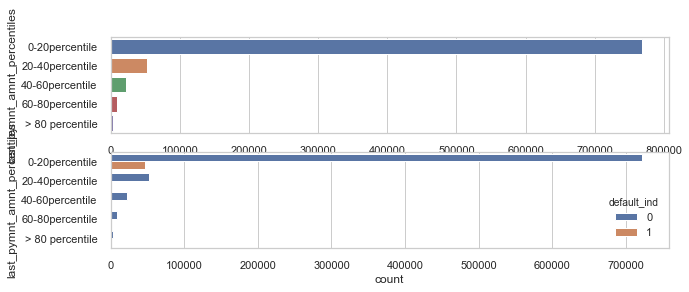

In [631]:
ldCleaned["last_pymnt_amnt_percentiles"]=pd.Categorical(lastpymntamnt,["0-20percentile","20-40percentile","40-60percentile",
                                                            "60-80percentile","> 80 percentile"],ordered=True).copy()


stackLPAP=ldCleaned.groupby("last_pymnt_amnt_percentiles")["default_ind"].value_counts(normalize=True).unstack()
sns.set(rc={"figure.figsize":(10,6)})
sns.set_style("whitegrid")
subplot(3,1,1)
sns.countplot(y=ldCleaned.last_pymnt_amnt_percentiles)

subplot(3,1,2)
sns.countplot(y=ldCleaned.last_pymnt_amnt_percentiles,hue=ldCleaned.default_ind)


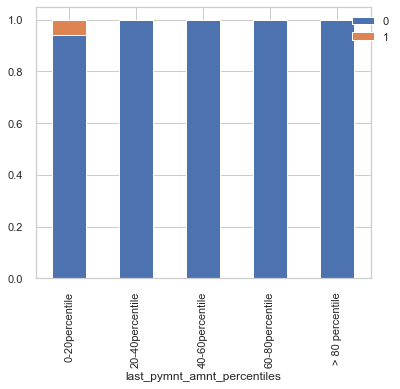

In [632]:
sns.set(rc={"figure.figsize":(6,5)})
sns.set_style("whitegrid")
stackLPAP.plot(kind="bar",stacked=True)
plt.legend(loc="upper center",bbox_to_anchor=(1,1))

In [633]:
ub=ldCleaned.last_pymnt_amnt.mean()+4.5*ldCleaned.last_pymnt_amnt.std()
lb=ldCleaned.last_pymnt_amnt.mean()-4.5*ldCleaned.last_pymnt_amnt.std()
count=0
for i in ldCleaned.last_pymnt_amnt:
    if (i >lb) & (i < ub):
        count=count+1
print(count)
print(ldCleaned.last_pymnt_amnt.shape[0]-count)

846818
9151


In [634]:
ldCleaned.loc[-((ldCleaned.last_pymnt_amnt>lb)&(ldCleaned.last_pymnt_amnt<ub)),"last_pymnt_amnt"]=ldCleaned.last_pymnt_amnt.median()

In [635]:
lastpymntamnt1=ldCleaned.last_pymnt_amnt.copy()
lastpymntamnt1=lastpymntamnt1.astype("object")
maxlastpymntamnt1=ldCleaned.last_pymnt_amnt.max().copy()
print(maxlastpymntamnt1)


j1=maxlastpymntamnt1*20/100
j2=maxlastpymntamnt1*40/100
j3=maxlastpymntamnt1*60/100
j4=maxlastpymntamnt1*80/100
lastpymntamnt1.loc[ldCleaned.last_pymnt_amnt<=j1]="0-20percentile"
lastpymntamnt1.loc[(ldCleaned.last_pymnt_amnt>j1)&(ldCleaned.last_pymnt_amnt<=j2)]="20-40percentile"
lastpymntamnt1.loc[(ldCleaned.last_pymnt_amnt>j2)&(ldCleaned.last_pymnt_amnt<=j3)]="40-60percentile"
lastpymntamnt1.loc[(ldCleaned.last_pymnt_amnt>j3)&(ldCleaned.last_pymnt_amnt<=j4)]="60-80percentile"
lastpymntamnt1[ldCleaned.last_pymnt_amnt>j4]="> 80 percentile"
print(lastpymntamnt1.tail(10),"last_pymnt_amnt :",ldCleaned.last_pymnt_amnt.tail(10))
lastpymntamnt1.value_counts()


24118.32
855959    0-20percentile
855960    0-20percentile
855961    0-20percentile
855962    0-20percentile
855963    0-20percentile
855964    0-20percentile
855965    0-20percentile
855966    0-20percentile
855967    0-20percentile
855968    0-20percentile
Name: last_pymnt_amnt, dtype: object last_pymnt_amnt : 855959    3655.51
855960     240.22
855961      25.00
855962     398.52
855963     404.61
855964     332.10
855965     797.03
855966     316.07
855967     317.86
855968     664.20
Name: last_pymnt_amnt, dtype: float64


0-20percentile     749488
20-40percentile     49055
40-60percentile     30440
60-80percentile     17528
> 80 percentile      9458
Name: last_pymnt_amnt, dtype: int64

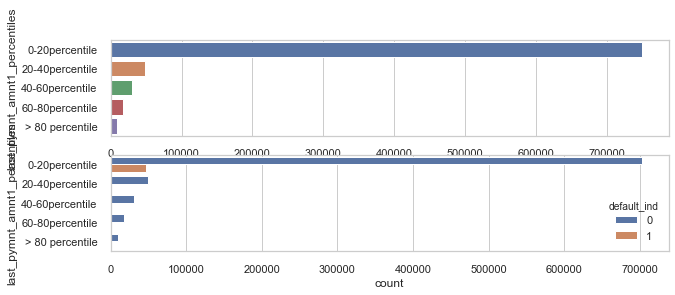

In [636]:
ldCleaned["last_pymnt_amnt1_percentiles"]=pd.Categorical(lastpymntamnt1,["0-20percentile","20-40percentile","40-60percentile",
                                                            "60-80percentile","> 80 percentile"],ordered=True).copy()
stackLPA1P=ldCleaned.groupby("last_pymnt_amnt1_percentiles")["default_ind"].value_counts(normalize=True).unstack()

sns.set(rc={"figure.figsize":(10,6)})
sns.set_style("whitegrid")
subplot(3,1,1)
sns.countplot(y=ldCleaned.last_pymnt_amnt1_percentiles)

subplot(3,1,2)
sns.countplot(y=ldCleaned.last_pymnt_amnt1_percentiles,hue=ldCleaned.default_ind)



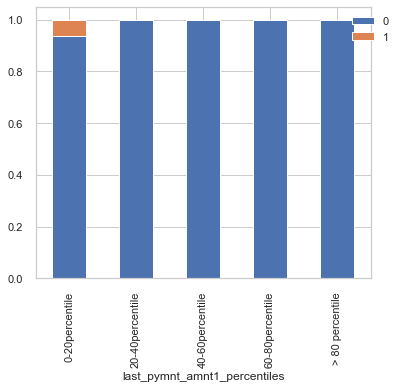

In [637]:
sns.set(rc={"figure.figsize":(6,5)})
sns.set_style("whitegrid")
stackLPA1P.plot(kind="bar",stacked=True)
plt.legend(loc="upper center",bbox_to_anchor=(1,1))

In [638]:
print("20%",j1,"40%",j2,"80%",j4)

20% 4823.664000000001 40% 9647.328000000001 80% 19294.656000000003


It is observed that all the defaulters fall in the category with max last payment amount 4823.

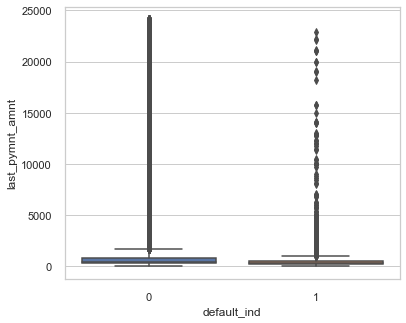

In [639]:
sns.boxplot(y=ldCleaned.last_pymnt_amnt,x=ldCleaned.default_ind)

In [640]:
ldFinalDataset=pd.concat([ldFinalDataset,ldCleaned.last_pymnt_amnt],axis=1).copy()
ldFinalDataset.columns

Index(['sub_grade', 'term', 'emp_length_ord', 'home_ownership',
       'verification_status', 'purpose', 'addr_state', 'initial_list_status',
       'int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'total_pymnt', 'last_pymnt_amnt'],
      dtype='object')

In [641]:
colnum3.head(17)

0          funded_amnt
1             int_rate
2           annual_inc
3                  dti
4          delinq_2yrs
5       inq_last_6mths
6             open_acc
7              pub_rec
8            revol_bal
9           revol_util
10           total_acc
11           out_prncp
12         total_pymnt
13     last_pymnt_amnt
14         tot_cur_bal
15         default_ind
16    loan_funded_diff
dtype: object

In [642]:
totcurbal1=ldCleaned.tot_cur_bal.copy()
totcurbal1=totcurbal1.astype("object")
maxtotcurbal1=ldCleaned.tot_cur_bal.max().copy()
print(maxtotcurbal1)


j1=maxtotcurbal1*20/100
j2=maxtotcurbal1*40/100
j3=maxtotcurbal1*60/100
j4=maxtotcurbal1*80/100
totcurbal1.loc[ldCleaned.tot_cur_bal<=j1]="0-20percentile"
totcurbal1.loc[(ldCleaned.tot_cur_bal>j1)&(ldCleaned.tot_cur_bal<=j2)]="20-40percentile"
totcurbal1.loc[(ldCleaned.tot_cur_bal>j2)&(ldCleaned.tot_cur_bal<=j3)]="40-60percentile"
totcurbal1.loc[(ldCleaned.tot_cur_bal>j3)&(ldCleaned.tot_cur_bal<=j4)]="60-80percentile"
totcurbal1[ldCleaned.tot_cur_bal>j4]="> 80 percentile"
print(totcurbal1.tail(10),"tot_cur_bal :",ldCleaned.tot_cur_bal.tail(10))
totcurbal1.value_counts()


8000078.0
855959    0-20percentile
855960    0-20percentile
855961    0-20percentile
855962    0-20percentile
855963    0-20percentile
855964    0-20percentile
855965    0-20percentile
855966    0-20percentile
855967    0-20percentile
855968    0-20percentile
Name: tot_cur_bal, dtype: object tot_cur_bal : 855959     18979.0
855960     18611.0
855961     53777.0
855962    237002.0
855963     19798.0
855964     25274.0
855965    140285.0
855966     34178.0
855967     58418.0
855968     33307.0
Name: tot_cur_bal, dtype: float64


0-20percentile     788385
20-40percentile       255
40-60percentile        15
> 80 percentile         1
Name: tot_cur_bal, dtype: int64

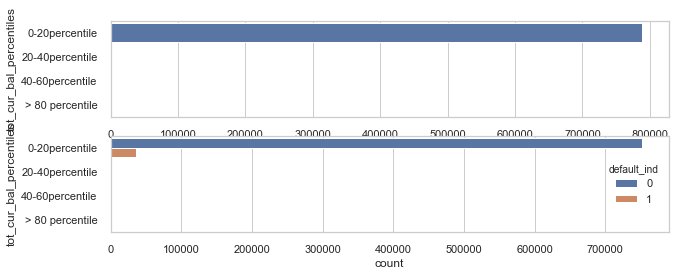

In [643]:
ldCleaned["tot_cur_bal_percentiles"]=pd.Categorical(totcurbal1).copy()


stackTCBP=ldCleaned.groupby("tot_cur_bal_percentiles")["default_ind"].value_counts(normalize=True).unstack()

sns.set(rc={"figure.figsize":(10,6)})
sns.set_style("whitegrid")
subplot(3,1,1)
sns.countplot(y=ldCleaned.tot_cur_bal_percentiles)

subplot(3,1,2)
sns.countplot(y=ldCleaned.tot_cur_bal_percentiles,hue=ldCleaned.default_ind)


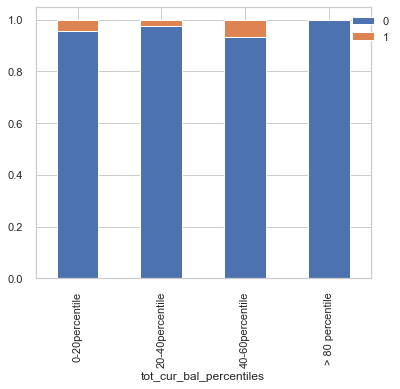

In [644]:
sns.set(rc={"figure.figsize":(6,5)})
sns.set_style("whitegrid")
stackTCBP.plot(kind="bar",stacked=True)
plt.legend(loc="upper center",bbox_to_anchor=(1,1))

In [645]:
ub=ldCleaned.tot_cur_bal.mean()+4.5*ldCleaned.tot_cur_bal.std()
lb=ldCleaned.tot_cur_bal.mean()-4.5*ldCleaned.tot_cur_bal.std()
count=0
for i in ldCleaned.tot_cur_bal:
    if (i >lb) & (i < ub):
        count=count+1
print(count)
print(ldCleaned.tot_cur_bal.shape[0]-count)


785494
70475


Since there are more than 5% outliers we cant impute them or remove them.

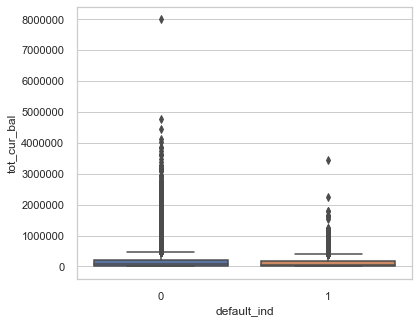

In [646]:
sns.boxplot(y=ldCleaned.tot_cur_bal,x=ldCleaned.default_ind)

In [647]:
ldFinalDataset=pd.concat([ldFinalDataset,ldCleaned.tot_cur_bal],axis=1).copy()
print(ldFinalDataset.columns)

Index(['sub_grade', 'term', 'emp_length_ord', 'home_ownership',
       'verification_status', 'purpose', 'addr_state', 'initial_list_status',
       'int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'total_pymnt', 'last_pymnt_amnt', 'tot_cur_bal'],
      dtype='object')


In [648]:
colnum3.head(17)

0          funded_amnt
1             int_rate
2           annual_inc
3                  dti
4          delinq_2yrs
5       inq_last_6mths
6             open_acc
7              pub_rec
8            revol_bal
9           revol_util
10           total_acc
11           out_prncp
12         total_pymnt
13     last_pymnt_amnt
14         tot_cur_bal
15         default_ind
16    loan_funded_diff
dtype: object

In [649]:
loanfundeddiff=ldCleaned.loan_funded_diff.copy()
loanfundeddiff=loanfundeddiff.astype("object")
maxloanfundeddiff=ldCleaned.loan_funded_diff.max().copy()
print(maxloanfundeddiff)


j1=maxloanfundeddiff*20/100
j2=maxloanfundeddiff*40/100
j3=maxloanfundeddiff*60/100
j4=maxloanfundeddiff*80/100
loanfundeddiff.loc[ldCleaned.loan_funded_diff<=j1]="0-20percentile"
loanfundeddiff.loc[(ldCleaned.loan_funded_diff>j1)&(ldCleaned.loan_funded_diff<=j2)]="20-40percentile"
loanfundeddiff.loc[(ldCleaned.loan_funded_diff>j2)&(ldCleaned.loan_funded_diff<=j3)]="40-60percentile"
loanfundeddiff.loc[(ldCleaned.loan_funded_diff>j3)&(ldCleaned.loan_funded_diff<=j4)]="60-80percentile"
loanfundeddiff[ldCleaned.loan_funded_diff>j4]="> 80 percentile"
print(loanfundeddiff.tail(10),"loan_funded_diff :",ldCleaned.loan_funded_diff.tail(10))
loanfundeddiff.value_counts()


21150.0
855959    0-20percentile
855960    0-20percentile
855961    0-20percentile
855962    0-20percentile
855963    0-20percentile
855964    0-20percentile
855965    0-20percentile
855966    0-20percentile
855967    0-20percentile
855968    0-20percentile
Name: loan_funded_diff, dtype: object loan_funded_diff : 855959    0.0
855960    0.0
855961    0.0
855962    0.0
855963    0.0
855964    0.0
855965    0.0
855966    0.0
855967    0.0
855968    0.0
Name: loan_funded_diff, dtype: float64


0-20percentile     854733
20-40percentile       808
40-60percentile       349
60-80percentile        63
> 80 percentile        16
Name: loan_funded_diff, dtype: int64

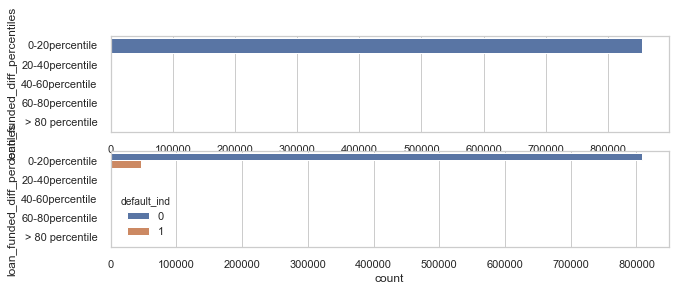

In [650]:
ldCleaned["loan_funded_diff_percentiles"]=pd.Categorical(loanfundeddiff,["0-20percentile","20-40percentile","40-60percentile",
                                                            "60-80percentile","> 80 percentile"],ordered=True).copy()


stackLFDP=ldCleaned.groupby("loan_funded_diff_percentiles")["default_ind"].value_counts(normalize=True).unstack()

sns.set(rc={"figure.figsize":(10,6)})
sns.set_style("whitegrid")
subplot(3,1,1)
sns.countplot(y=ldCleaned.loan_funded_diff_percentiles)

subplot(3,1,2)
sns.countplot(y=ldCleaned.loan_funded_diff_percentiles,hue=ldCleaned.default_ind)


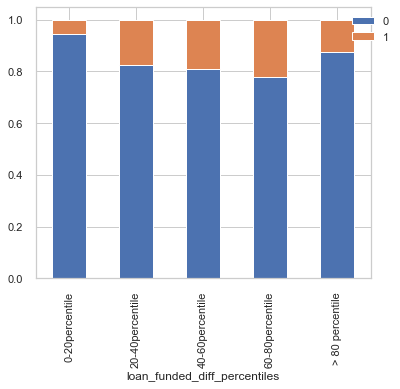

In [651]:
sns.set(rc={"figure.figsize":(6,5)})
sns.set_style("whitegrid")
stackLFDP.plot(kind="bar",stacked=True)
plt.legend(loc="upper center",bbox_to_anchor=(1,1))

In [652]:
print("20%",j1,"40%",j2,"60%",j3,"80%",j4)

20% 4230.0 40% 8460.0 60% 12690.0 80% 16920.0


it is observed that the no of defaulters increases from 20% to 40% then again decrease from 60% to above 80%.

In [653]:
ub=ldCleaned.loan_funded_diff.mean()+4.5*ldCleaned.loan_funded_diff.std()
lb=ldCleaned.loan_funded_diff.mean()-4.5*ldCleaned.loan_funded_diff.std()
count=0
for i in ldCleaned.loan_funded_diff:
    if (i >lb) & (i < ub):
        count=count+1
print(count)
print(ldCleaned.loan_funded_diff.shape[0]-count)

854214
1755


In [654]:
ldCleaned.loc[-((ldCleaned.loan_funded_diff>lb)&(ldCleaned.loan_funded_diff<ub)),"loan_funded_diff"]=ldCleaned.loan_funded_diff.median()

In [655]:
loanfundeddiff1=ldCleaned.loan_funded_diff.copy()
loanfundeddiff1=loanfundeddiff1.astype("object")
maxloanfundeddiff1=ldCleaned.loan_funded_diff.max().copy()
print(maxloanfundeddiff1)


j1=maxloanfundeddiff1*20/100
j2=maxloanfundeddiff1*40/100
j3=maxloanfundeddiff1*60/100
j4=maxloanfundeddiff1*80/100
loanfundeddiff1.loc[ldCleaned.loan_funded_diff<=j1]="0-20percentile"
loanfundeddiff1.loc[(ldCleaned.loan_funded_diff>j1)&(ldCleaned.loan_funded_diff<=j2)]="20-40percentile"
loanfundeddiff1.loc[(ldCleaned.loan_funded_diff>j2)&(ldCleaned.loan_funded_diff<=j3)]="40-60percentile"
loanfundeddiff1.loc[(ldCleaned.loan_funded_diff>j3)&(ldCleaned.loan_funded_diff<=j4)]="60-80percentile"
loanfundeddiff1[ldCleaned.loan_funded_diff>j4]="> 80 percentile"
print(loanfundeddiff1.tail(10),"loan_funded_diff :",ldCleaned.loan_funded_diff.tail(10))
loanfundeddiff1.value_counts()


1450.0
855959    0-20percentile
855960    0-20percentile
855961    0-20percentile
855962    0-20percentile
855963    0-20percentile
855964    0-20percentile
855965    0-20percentile
855966    0-20percentile
855967    0-20percentile
855968    0-20percentile
Name: loan_funded_diff, dtype: object loan_funded_diff : 855959    0.0
855960    0.0
855961    0.0
855962    0.0
855963    0.0
855964    0.0
855965    0.0
855966    0.0
855967    0.0
855968    0.0
Name: loan_funded_diff, dtype: float64


0-20percentile     855837
40-60percentile        37
> 80 percentile        33
20-40percentile        33
60-80percentile        29
Name: loan_funded_diff, dtype: int64

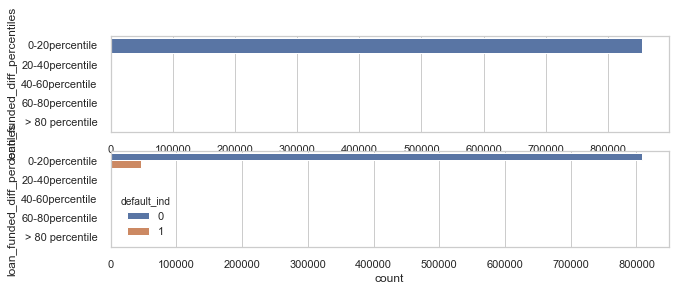

In [656]:
ldCleaned["loan_funded_diff1_percentiles"]=pd.Categorical(loanfundeddiff1,["0-20percentile","20-40percentile","40-60percentile",
                                                            "60-80percentile","> 80 percentile"],ordered=True).copy()


stackLFD1P=ldCleaned.groupby("loan_funded_diff1_percentiles")["default_ind"].value_counts(normalize=True).unstack()

sns.set(rc={"figure.figsize":(10,6)})
sns.set_style("whitegrid")
subplot(3,1,1)
sns.countplot(y=ldCleaned.loan_funded_diff_percentiles)

subplot(3,1,2)
sns.countplot(y=ldCleaned.loan_funded_diff_percentiles,hue=ldCleaned.default_ind)


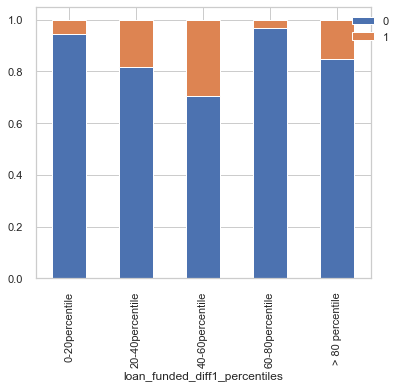

In [657]:
sns.set(rc={"figure.figsize":(6,5)})
sns.set_style("whitegrid")
stackLFD1P.plot(kind="bar",stacked=True)
plt.legend(loc="upper center",bbox_to_anchor=(1,1))

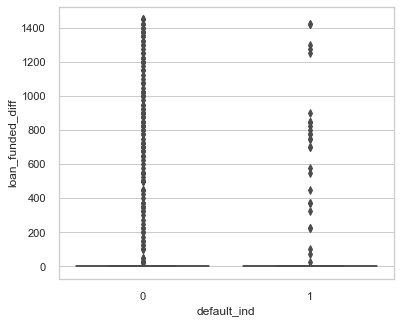

In [658]:
sns.boxplot(y=ldCleaned.loan_funded_diff,x=ldCleaned.default_ind)

In [659]:
ldFinalDataset=pd.concat([ldFinalDataset,ldCleaned.loan_funded_diff],axis=1).copy()

In [660]:
colnum3.head(17)

0          funded_amnt
1             int_rate
2           annual_inc
3                  dti
4          delinq_2yrs
5       inq_last_6mths
6             open_acc
7              pub_rec
8            revol_bal
9           revol_util
10           total_acc
11           out_prncp
12         total_pymnt
13     last_pymnt_amnt
14         tot_cur_bal
15         default_ind
16    loan_funded_diff
dtype: object

In [661]:
fundedtoinstallment_ratio=ldCleaned.fundedtoinstallmentratio.copy()
fundedtoinstallment_ratio=fundedtoinstallment_ratio.astype("object")
maxfundedtoinstallment_ratio=ldCleaned.fundedtoinstallmentratio.max().copy()
print(maxfundedtoinstallment_ratio)


j1=maxfundedtoinstallment_ratio*20/100
j2=maxfundedtoinstallment_ratio*40/100
j3=maxfundedtoinstallment_ratio*60/100
j4=maxfundedtoinstallment_ratio*80/100
fundedtoinstallment_ratio.loc[ldCleaned.fundedtoinstallmentratio<=j1]="0-20percentile"
fundedtoinstallment_ratio.loc[(ldCleaned.fundedtoinstallmentratio>j1)&(ldCleaned.fundedtoinstallmentratio<=j2)]="20-40percentile"
fundedtoinstallment_ratio.loc[(ldCleaned.fundedtoinstallmentratio>j2)&(ldCleaned.fundedtoinstallmentratio<=j3)]="40-60percentile"
fundedtoinstallment_ratio.loc[(ldCleaned.fundedtoinstallmentratio>j3)&(ldCleaned.fundedtoinstallmentratio<=j4)]="60-80percentile"
fundedtoinstallment_ratio[ldCleaned.fundedtoinstallmentratio>j4]="> 80 percentile"
print(fundedtoinstallment_ratio.tail(10),"fundedtoinstallmentratio :",ldCleaned.fundedtoinstallmentratio.tail(10))
fundedtoinstallment_ratio.value_counts()

95.70072945581306
855959    20-40percentile
855960    20-40percentile
855961    20-40percentile
855962    20-40percentile
855963    20-40percentile
855964    20-40percentile
855965    20-40percentile
855966    40-60percentile
855967    20-40percentile
855968    20-40percentile
Name: fundedtoinstallmentratio, dtype: object fundedtoinstallmentratio : 855959    31.598073
855960    31.221380
855961    27.190257
855962    30.111412
855963    28.607795
855964    30.111412
855965    30.111790
855966    41.130129
855967    37.752470
855968    30.111412
Name: fundedtoinstallmentratio, dtype: float64


20-40percentile    652424
40-60percentile    203542
60-80percentile         2
> 80 percentile         1
Name: fundedtoinstallmentratio, dtype: int64

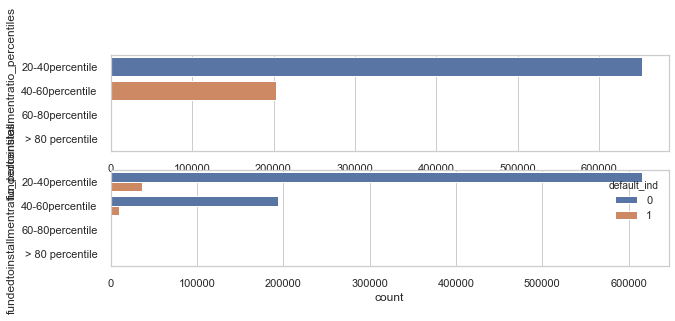

In [662]:
ldCleaned["fundedtoinstallmentratio_percentiles"]=pd.Categorical(fundedtoinstallment_ratio)
stackFIRP=ldCleaned.groupby("fundedtoinstallmentratio_percentiles")["default_ind"].value_counts(normalize=True).unstack()

sns.set(rc={"figure.figsize":(10,6)})
sns.set_style("whitegrid")
subplot(3,1,1)
sns.countplot(y=ldCleaned.fundedtoinstallmentratio_percentiles)

subplot(3,1,2)
sns.countplot(y=ldCleaned.fundedtoinstallmentratio_percentiles,hue=ldCleaned.default_ind)


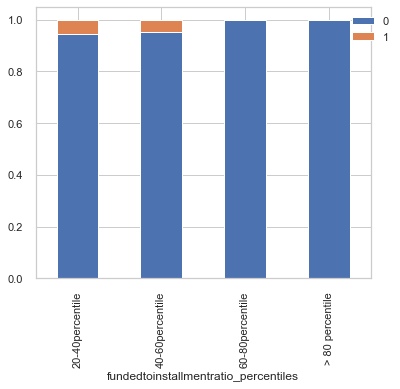

In [663]:
sns.set(rc={"figure.figsize":(6,5)})
sns.set_style("whitegrid")
stackFIRP.plot(kind="bar",stacked=True)
plt.legend(loc="upper center",bbox_to_anchor=(1,1))

In [664]:
ub=ldCleaned.fundedtoinstallmentratio.mean()+4.5*ldCleaned.fundedtoinstallmentratio.std()
lb=ldCleaned.fundedtoinstallmentratio.mean()-4.5*ldCleaned.fundedtoinstallmentratio.std()
count=0
for i in ldCleaned.fundedtoinstallmentratio:
    if (i >lb) & (i < ub):
        count=count+1
print(count)
print(ldCleaned.fundedtoinstallmentratio.shape[0]-count)

855966
3


In [665]:
ldCleaned.loc[-((ldCleaned.fundedtoinstallmentratio>lb)&(ldCleaned.fundedtoinstallmentratio<ub)),"fundedtoinstallmentratio"]=ldCleaned.fundedtoinstallmentratio.median()

In [666]:
fundedtoinstallment_ratio1=ldCleaned.fundedtoinstallmentratio.copy()
fundedtoinstallment_ratio1=fundedtoinstallment_ratio1.astype("object")
maxfundedtoinstallment_ratio1=ldCleaned.fundedtoinstallmentratio.max().copy()
print(maxfundedtoinstallment_ratio1)


j1=maxfundedtoinstallment_ratio1*20/100
j2=maxfundedtoinstallment_ratio1*40/100
j3=maxfundedtoinstallment_ratio1*60/100
j4=maxfundedtoinstallment_ratio1*80/100
fundedtoinstallment_ratio1.loc[ldCleaned.fundedtoinstallmentratio<=j1]="0-20percentile"
fundedtoinstallment_ratio1.loc[(ldCleaned.fundedtoinstallmentratio>j1)&(ldCleaned.fundedtoinstallmentratio<=j2)]="20-40percentile"
fundedtoinstallment_ratio1.loc[(ldCleaned.fundedtoinstallmentratio>j2)&(ldCleaned.fundedtoinstallmentratio<=j3)]="40-60percentile"
fundedtoinstallment_ratio1.loc[(ldCleaned.fundedtoinstallmentratio>j3)&(ldCleaned.fundedtoinstallmentratio<=j4)]="60-80percentile"
fundedtoinstallment_ratio1[ldCleaned.fundedtoinstallmentratio>j4]="> 80 percentile"
print(fundedtoinstallment_ratio1.tail(10),"fundedtoinstallmentratio :",ldCleaned.fundedtoinstallmentratio.tail(10))
fundedtoinstallment_ratio1.value_counts()


55.65739646397646
855959    40-60percentile
855960    40-60percentile
855961    40-60percentile
855962    40-60percentile
855963    40-60percentile
855964    40-60percentile
855965    40-60percentile
855966    60-80percentile
855967    60-80percentile
855968    40-60percentile
Name: fundedtoinstallmentratio, dtype: object fundedtoinstallmentratio : 855959    31.598073
855960    31.221380
855961    27.190257
855962    30.111412
855963    28.607795
855964    30.111412
855965    30.111790
855966    41.130129
855967    37.752470
855968    30.111412
Name: fundedtoinstallmentratio, dtype: float64


40-60percentile    601519
60-80percentile    203817
> 80 percentile     50633
Name: fundedtoinstallmentratio, dtype: int64

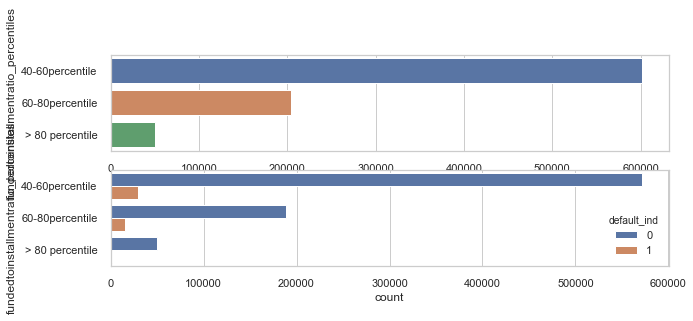

In [667]:
ldCleaned["fundedtoinstallmentratio_percentiles"]=pd.Categorical(fundedtoinstallment_ratio1)
stackFIR1P=ldCleaned.groupby("fundedtoinstallmentratio_percentiles")["default_ind"].value_counts(normalize=True).unstack()

sns.set(rc={"figure.figsize":(10,6)})
sns.set_style("whitegrid")
subplot(3,1,1)
sns.countplot(y=ldCleaned.fundedtoinstallmentratio_percentiles)

subplot(3,1,2)
sns.countplot(y=ldCleaned.fundedtoinstallmentratio_percentiles,hue=ldCleaned.default_ind)



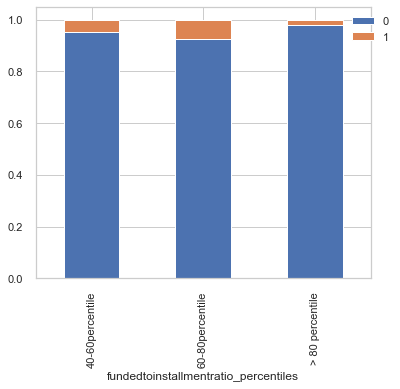

In [668]:
sns.set(rc={"figure.figsize":(6,5)})
sns.set_style("whitegrid")
stackFIR1P.plot(kind="bar",stacked=True)
plt.legend(loc="upper center",bbox_to_anchor=(1,1))

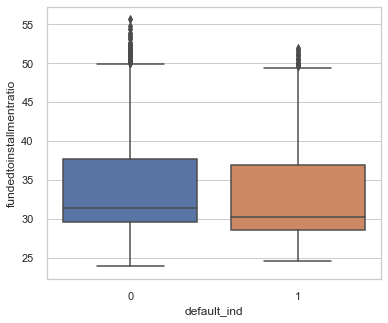

In [669]:
sns.boxplot(y=ldCleaned.fundedtoinstallmentratio,x=ldCleaned.default_ind)

In [670]:
ldFinalDataset=pd.concat([ldFinalDataset,ldCleaned.fundedtoinstallmentratio],axis=1).copy()
print(ldFinalDataset.columns)
print(ldFinalDataset.shape)

Index(['sub_grade', 'term', 'emp_length_ord', 'home_ownership',
       'verification_status', 'purpose', 'addr_state', 'initial_list_status',
       'int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'total_pymnt', 'last_pymnt_amnt', 'tot_cur_bal',
       'loan_funded_diff', 'fundedtoinstallmentratio'],
      dtype='object')
(855969, 20)


In [671]:
colnum2

0                  funded_amnt
1                     int_rate
2                   annual_inc
3                          dti
4                  delinq_2yrs
5               inq_last_6mths
6                     open_acc
7                      pub_rec
8                    revol_bal
9                   revol_util
10                   total_acc
11                   out_prncp
12                 total_pymnt
13               total_rec_int
14             last_pymnt_amnt
15                 tot_cur_bal
16                 default_ind
17            loan_funded_diff
18    fundedtoinstallmentratio
dtype: object

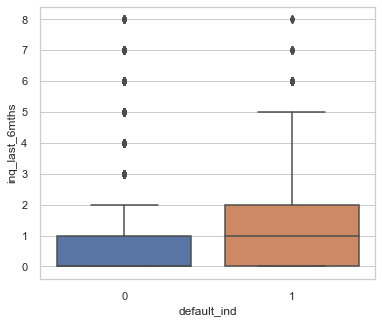

In [672]:
sns.boxplot(y=ldCleaned.inq_last_6mths,x=ldCleaned.default_ind)

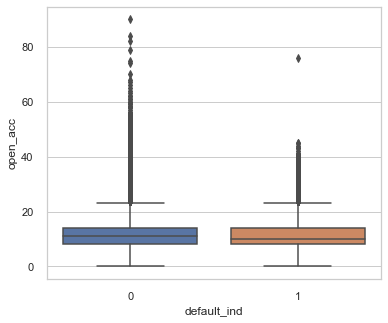

In [673]:
sns.boxplot(y=ldCleaned.open_acc,x=ldCleaned.default_ind)

In [674]:
ldFinalDataset=pd.concat([ldFinalDataset,ldCleaned.inq_last_6mths,ldCleaned.open_acc],axis=1).copy()
ldFinalDataset.shape

(855969, 22)

In [675]:
ldFinalDataset.columns

Index(['sub_grade', 'term', 'emp_length_ord', 'home_ownership',
       'verification_status', 'purpose', 'addr_state', 'initial_list_status',
       'int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'total_pymnt', 'last_pymnt_amnt', 'tot_cur_bal',
       'loan_funded_diff', 'fundedtoinstallmentratio', 'inq_last_6mths',
       'open_acc'],
      dtype='object')

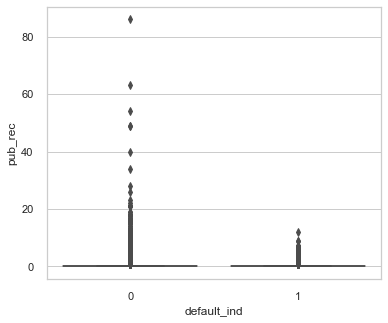

In [676]:
sns.boxplot(y=ldCleaned.pub_rec,x=ldCleaned.default_ind)

As the mean is zero for both and the no of records 0 is 84.5% removing this column from analysis

# End of Numeric variable graph plots

# Test to check dependency between independent variables and target variable

In [677]:
def expectedvalcal(x):
    valm=pd.Series(0)
    j=0
    k=x.columns[0]
    for i in x[k].unique():
        val=x.Count[x[k]==i].sum()
        for m in x["default_ind"].unique():
            valm.set_value(j,val/2)
            j=j+1
    val=pd.DataFrame(valm)
    cols=list(x.columns)
    cols.append("expectedcount")
    print(cols)
    x=pd.concat([x,valm],axis=1)
    x.columns=cols
    return x

In [678]:
def defaultcolvalcount(df,col):
    cols=[col,"default_ind"]
    x=df[cols]
    x=x.groupby(cols).size()
    x=pd.DataFrame(x)
    x.columns=["Count"]
    x.index.name="Value"
    x.reset_index(inplace=True)
    return x

In [679]:
termactualdist=defaultcolvalcount(ldCleaned,"term")
term_actexp_dist=expectedvalcal(termactualdist)
from scipy.stats import chisquare
chisquare(f_obs=term_actexp_dist["Count"],f_exp=term_actexp_dist["expectedcount"])

['term', 'default_ind', 'Count', 'expectedcount']


Power_divergenceResult(statistic=680365.3698516425, pvalue=0.0)

In [680]:
subgradeactualdist=defaultcolvalcount(ldCleaned,"sub_grade")
subgrade_actexp_count=expectedvalcal(subgradeactualdist)
chisquare(f_obs=subgrade_actexp_count.Count,f_exp=subgrade_actexp_count.expectedcount)

['sub_grade', 'default_ind', 'Count', 'expectedcount']


Power_divergenceResult(statistic=683134.3043345532, pvalue=0.0)

In [681]:
emplen_actualdist=defaultcolvalcount(ldCleaned,"emp_length")
emplen_actualexp_count=expectedvalcal(emplen_actualdist)
chisquare(f_obs=emplen_actualexp_count["Count"],f_exp=emplen_actualexp_count["expectedcount"])

['emp_length', 'default_ind', 'Count', 'expectedcount']


Power_divergenceResult(statistic=680294.8389756781, pvalue=0.0)

In [682]:
homeownership_actualdist=defaultcolvalcount(ldCleaned,"home_ownership")
homeownership_actualexp_count=expectedvalcal(homeownership_actualdist)
chisquare(f_obs=homeownership_actualexp_count["Count"],f_exp=homeownership_actualexp_count["expectedcount"])

['home_ownership', 'default_ind', 'Count', 'expectedcount']


Power_divergenceResult(statistic=680420.1377329063, pvalue=0.0)

In [683]:
verification_status_actualdist=defaultcolvalcount(ldCleaned,"verification_status")
verification_status_actualexp_count=expectedvalcal(verification_status_actualdist)
chisquare(f_obs=verification_status_actualexp_count["Count"],f_exp=verification_status_actualexp_count["expectedcount"])

['verification_status', 'default_ind', 'Count', 'expectedcount']


Power_divergenceResult(statistic=680643.8440490376, pvalue=0.0)

In [684]:
purpose_actualdist=defaultcolvalcount(ldCleaned,"purpose")
purpose_actualexp_count=expectedvalcal(purpose_actualdist)
chisquare(f_obs=purpose_actualexp_count["Count"],f_exp=purpose_actualexp_count["expectedcount"])

['purpose', 'default_ind', 'Count', 'expectedcount']


Power_divergenceResult(statistic=680828.4523073463, pvalue=0.0)

In [685]:
addr_state_actualdist=defaultcolvalcount(ldCleaned,"addr_state")

In [686]:
addr_state_actualdist.loc[addr_state_actualdist.Count.isna()==True,]

,addr_state,default_ind,Count


In [687]:
addr_state_actualexp_count=expectedvalcal(addr_state_actualdist)
addr_state_actualexp_count.loc[addr_state_actualexp_count.Count.isnull()==True,]

['addr_state', 'default_ind', 'Count', 'expectedcount']


,addr_state,default_ind,Count,expectedcount
100,NaN,NaN,NaN,987.0
101,NaN,NaN,NaN,987.0


In [688]:
addr_state_actualexp_count=addr_state_actualexp_count.drop([100,101],axis=0).copy()

In [689]:
chisquare(f_obs=addr_state_actualexp_count["Count"],f_exp=addr_state_actualexp_count["expectedcount"])

Power_divergenceResult(statistic=5079762.787037415, pvalue=0.0)

In [690]:
ils_actualdist=defaultcolvalcount(ldCleaned,"initial_list_status")
ils_actualexp_count=expectedvalcal(ils_actualdist)
chisquare(f_obs=ils_actualexp_count["Count"],f_exp=ils_actualexp_count["expectedcount"])

['initial_list_status', 'default_ind', 'Count', 'expectedcount']


Power_divergenceResult(statistic=681908.4639971951, pvalue=0.0)

In [691]:
colcat2.head(10)

0                   term
1              sub_grade
2             emp_length
3         home_ownership
4    verification_status
5                issue_d
6                purpose
7             addr_state
8    initial_list_status
dtype: object

In [692]:
purpose_actualdist=defaultcolvalcount(ldCleaned,"purpose")
purpose_actualexp_count=expectedvalcal(ils_actualdist)
chisquare(f_obs=purpose_actualexp_count["Count"],f_exp=purpose_actualexp_count["expectedcount"])

['initial_list_status', 'default_ind', 'Count', 'expectedcount']


Power_divergenceResult(statistic=681908.4639971951, pvalue=0.0)

# End of categorical variable dependency check

As none of the numeric variables is normally distributed using kruskal walis test to test the dependency of numeric variables

In [693]:
ldCleaned.loc[:,"default_ind"]=pd.Categorical(ldCleaned.default_ind)

In [694]:
ldFinalDataset=pd.concat([ldFinalDataset,ldCleaned.default_ind],axis=1).copy()

In [695]:
ldFinalDataset.tot_cur_bal.isnull().sum()

67313

In [696]:
ldFinalDataset.loc[ldFinalDataset.tot_cur_bal.isnull()==True,"tot_cur_bal"]=ldFinalDataset.tot_cur_bal.median()

In [697]:
ldFinalDataset.tot_cur_bal.isnull().sum()

0

# End of categorical and numeric variable dependency check.
# all varibles are found to be significant are stored in ldFinalDataset

We can also see how the Defaulter or Non-Defaulters can have (or not) different values for the features plotting the distribution of each type of diagnosis for each of the Numeric features.

In [698]:
ldFinalDataset.dtypes

sub_grade                     object
term                          object
emp_length_ord              category
home_ownership                object
verification_status           object
purpose                       object
addr_state                    object
initial_list_status           object
int_rate                     float64
annual_inc                   float64
dti                          float64
revol_bal                    float64
revol_util                   float64
total_acc                    float64
out_prncp                    float64
total_pymnt                  float64
last_pymnt_amnt              float64
tot_cur_bal                  float64
loan_funded_diff             float64
fundedtoinstallmentratio     float64
inq_last_6mths               float64
open_acc                     float64
default_ind                 category
dtype: object

In [699]:
Numcol=colNum(ldFinalDataset)

In [700]:
Numcol=Numcol[1:15]
Numcol

1                     int_rate
2                   annual_inc
3                          dti
4                    revol_bal
5                   revol_util
6                    total_acc
7                    out_prncp
8                  total_pymnt
9              last_pymnt_amnt
10                 tot_cur_bal
11            loan_funded_diff
12    fundedtoinstallmentratio
13              inq_last_6mths
14                    open_acc
dtype: object

In [701]:
ldFinalDataset.isnull().sum()

sub_grade                   0
term                        0
emp_length_ord              0
home_ownership              0
verification_status         0
purpose                     0
addr_state                  0
initial_list_status         0
int_rate                    0
annual_inc                  0
dti                         0
revol_bal                   0
revol_util                  0
total_acc                   0
out_prncp                   0
total_pymnt                 0
last_pymnt_amnt             0
tot_cur_bal                 0
loan_funded_diff            0
fundedtoinstallmentratio    0
inq_last_6mths              0
open_acc                    0
default_ind                 0
dtype: int64

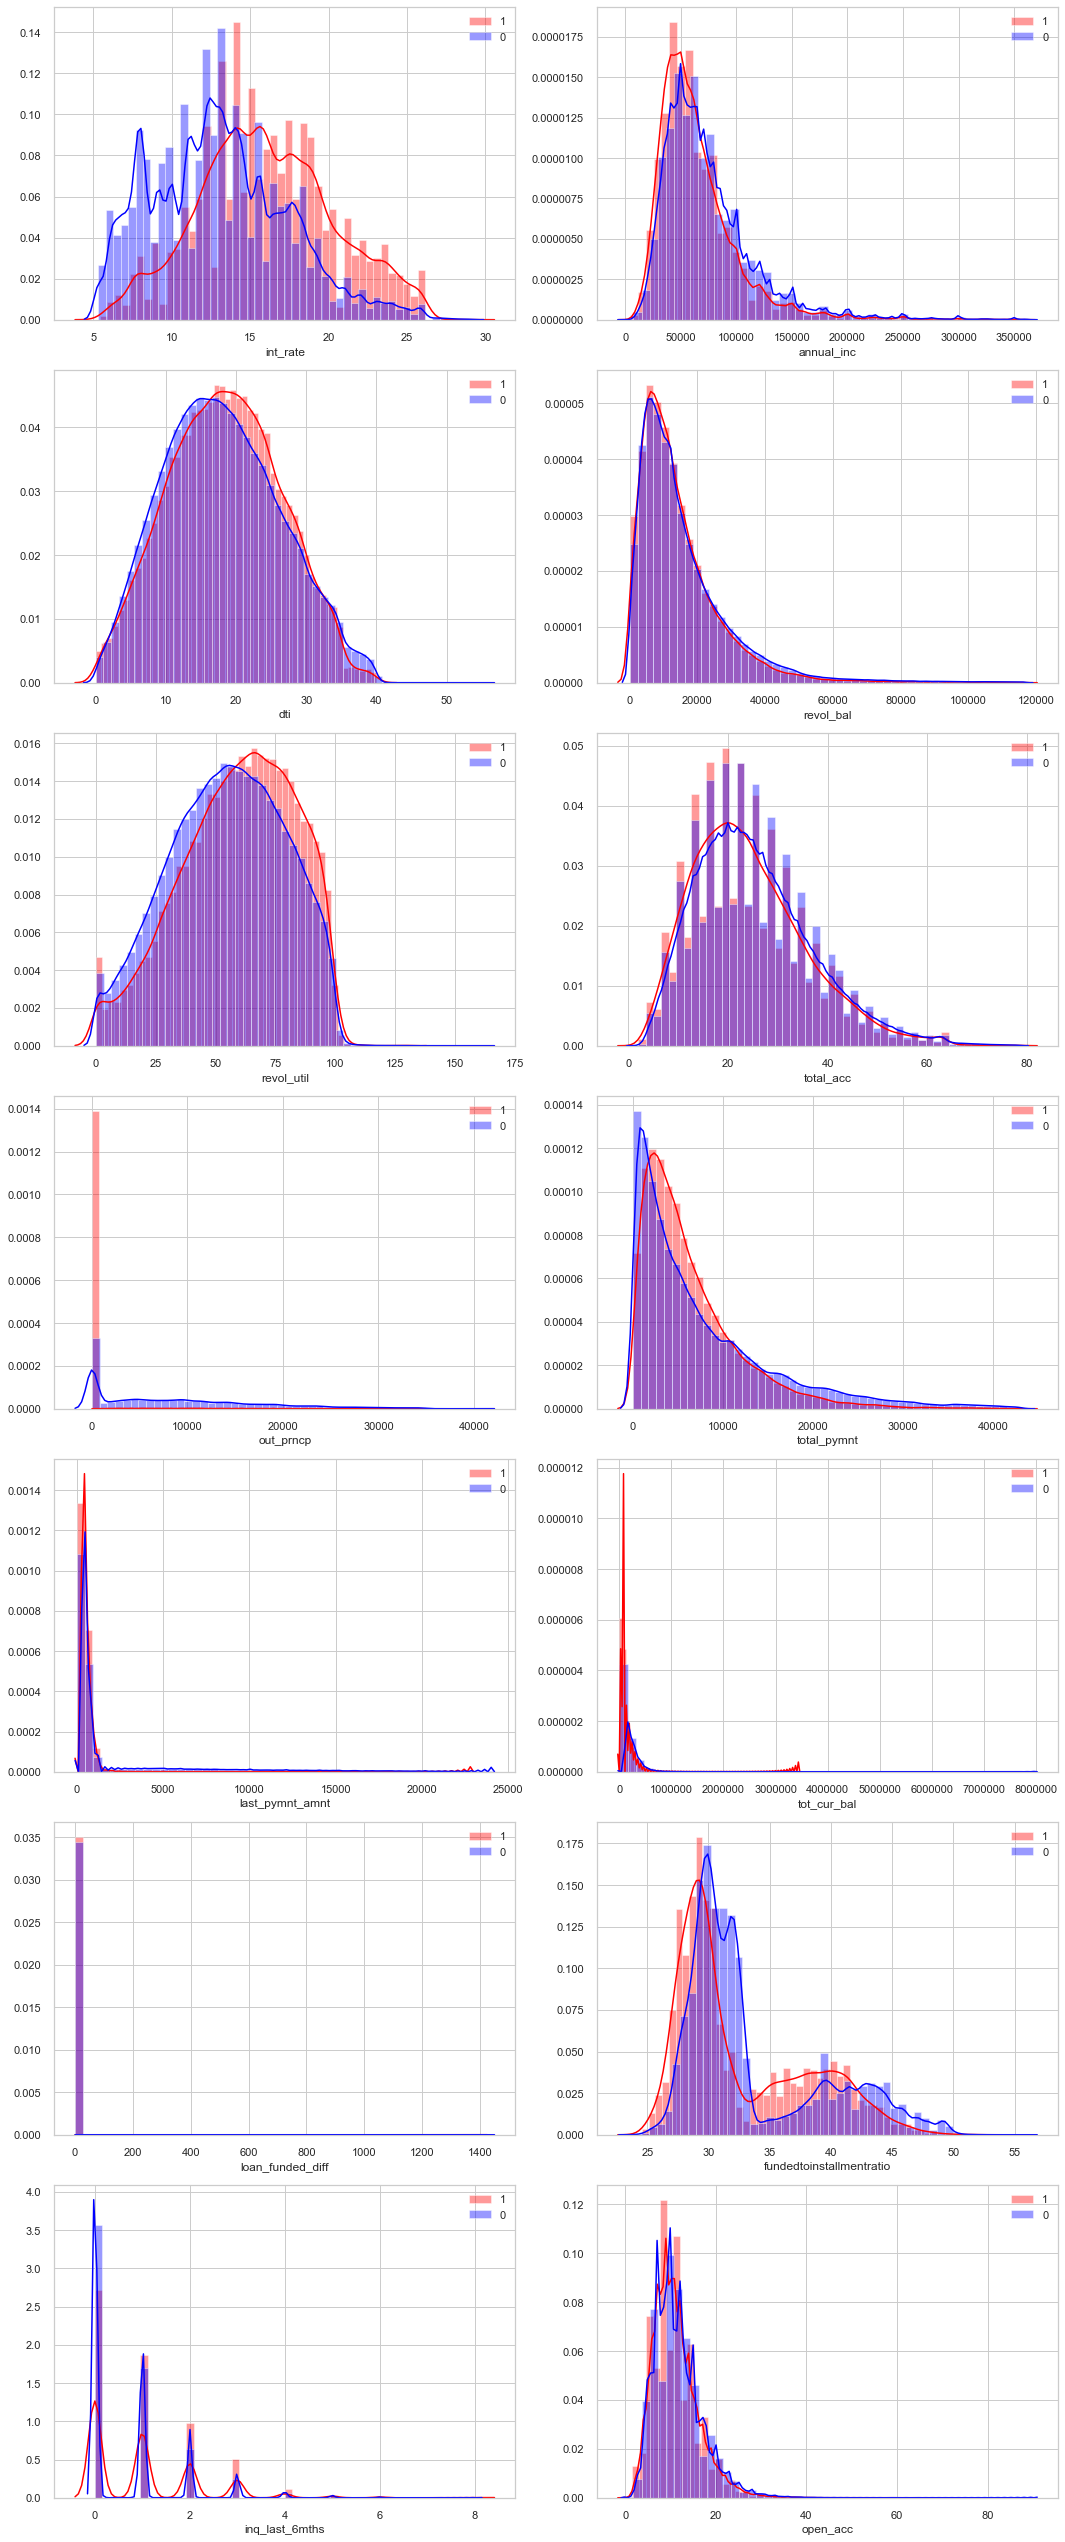

In [702]:
plt.figure(figsize=(15,40)) #individual Figure size

for i, feature in enumerate(Numcol):
    rows = int(16/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(ldFinalDataset[ldFinalDataset['default_ind']==1][feature], color='red', label='1');
    sns.distplot(ldFinalDataset[ldFinalDataset['default_ind']==0][feature], color='blue', label='0');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

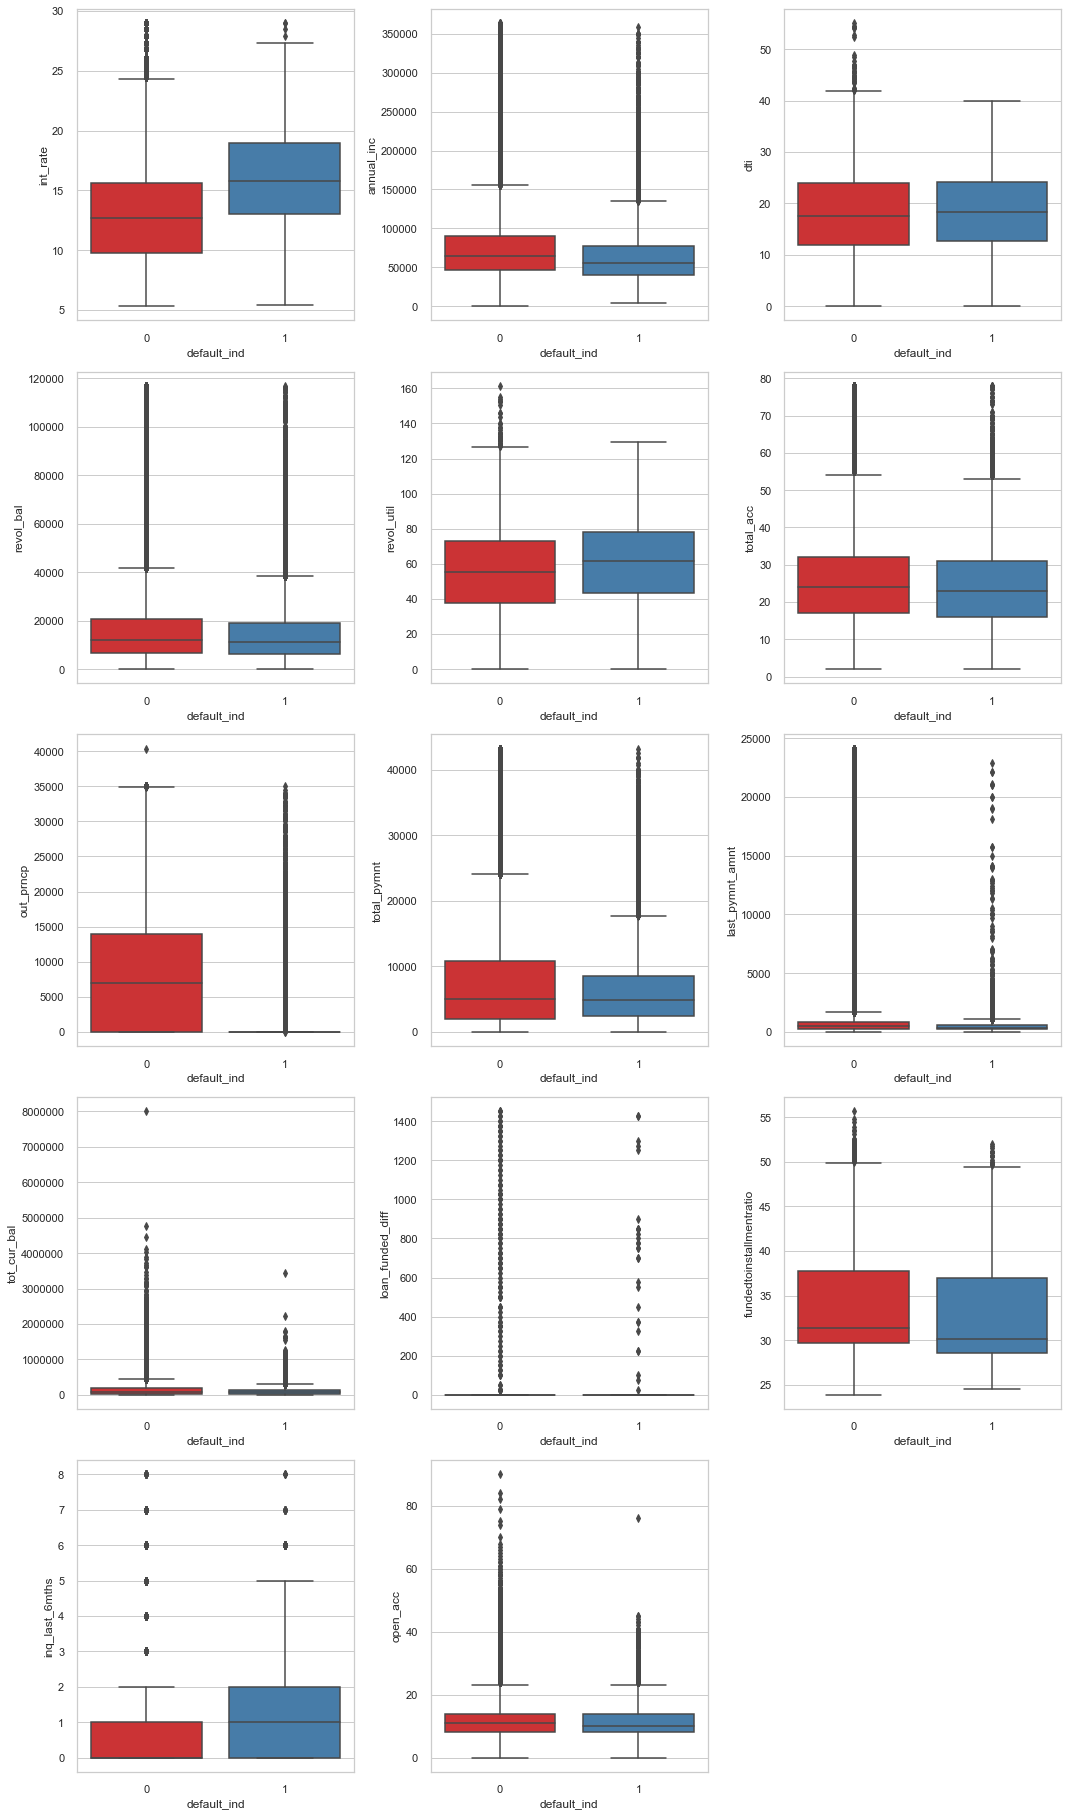

In [703]:
plt.figure(figsize=(15,40))

for i, feature in enumerate(Numcol):
    rows = int(16/2)
    
    plt.subplot(rows, 3, i+1)
    
    sns.boxplot(x='default_ind', y=feature, data=ldFinalDataset, palette="Set1")

plt.tight_layout()
plt.show()

In [704]:
#ldCleaned.columns

In [705]:
dataset=pd.get_dummies(ldFinalDataset, prefix_sep='_', drop_first=True)

In [706]:
ldCleaned.issue_d.head()

0    Dec-2011
1    Dec-2011
2    Dec-2011
3    Dec-2011
4    Dec-2011
Name: issue_d, dtype: object

In [707]:
issue=pd.to_datetime(pd.Series(ldCleaned["issue_d"]), format="%b-%Y")

In [708]:
print(issue.head())
print(issue.tail())

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]
855964   2015-01-01
855965   2015-01-01
855966   2015-01-01
855967   2015-01-01
855968   2015-01-01
Name: issue_d, dtype: datetime64[ns]


In [709]:
split_date=pd.datetime(2015,5,31)

In [710]:
train=dataset.loc[issue<split_date,]
testset=dataset.loc[issue>=split_date,]

In [711]:
train.shape

(598978, 129)

In [712]:
testset.shape

(256991, 129)

In [713]:
#ldCleaned.to_csv("FinalEDAMultivariateAnalysis.txt",sep="\t")

# Sampling : Stratified

In [714]:
from sklearn.model_selection import StratifiedKFold

In [715]:
import sklearn

def data_split(examples, labels, train_frac, random_state=None):
    ''' param data:       Data to be split
        param train_frac: Ratio of train set to whole dataset
        Input parameters:
        examples : dataset to be split
        labels : target variable according to which to do stratified sampling
        
        Randomly split dataset, based on these ratios:
        'train': train_frac
        'valid': (1-train_frac) / 2
        'test':  (1-train_frac) / 2

        Eg: passing train_frac=0.8 gives a 80% / 10% / 10% split
    '''

    assert train_frac >= 0 and train_frac <= 1, "Invalid training set fraction"

    X_train, X_tmp, y_train, Y_tmp = sklearn.model_selection.train_test_split(
                                        examples, labels, train_size=train_frac, stratify=labels, random_state=random_state)

    X_val, X_test, y_val, y_test   = sklearn.model_selection.train_test_split(
                                        X_tmp, Y_tmp, train_size=0.5, stratify=Y_tmp, random_state=random_state)

    return X_train, X_val, X_test,  y_train, y_val, y_test

In [716]:
train.columns

Index(['int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'total_pymnt', 'last_pymnt_amnt', 'tot_cur_bal',
       ...
       'addr_state_TX', 'addr_state_UT', 'addr_state_VA', 'addr_state_VT',
       'addr_state_WA', 'addr_state_WI', 'addr_state_WV', 'addr_state_WY',
       'initial_list_status_w', 'default_ind_1'],
      dtype='object', length=129)

In [717]:
X=train.iloc[:,:128].copy()

In [718]:
X.columns

Index(['int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'total_pymnt', 'last_pymnt_amnt', 'tot_cur_bal',
       ...
       'addr_state_TN', 'addr_state_TX', 'addr_state_UT', 'addr_state_VA',
       'addr_state_VT', 'addr_state_WA', 'addr_state_WI', 'addr_state_WV',
       'addr_state_WY', 'initial_list_status_w'],
      dtype='object', length=128)

In [719]:
Y=train.iloc[:,128:129].copy()
Y.columns

Index(['default_ind_1'], dtype='object')

In [720]:
X_train_s, X_val_s, X_test_s,  y_train_s, y_val_s, y_test_s = data_split(X, Y, 0.7, 100)

In [721]:
print(X_train_s.shape)
print(y_train_s.shape)
print(X_test_s.shape)
print(y_test_s.shape)
print(X_val_s.shape)
print(y_val_s.shape)

(419284, 128)
(419284, 1)
(89847, 128)
(89847, 1)
(89847, 128)
(89847, 1)


Text(0.5, 1.0, 'Train complete without breaking into train test validation set Dataset')

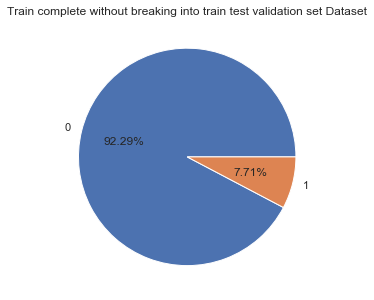

In [722]:
plt.figure(figsize=(10,5))
plt.pie(train.default_ind_1.value_counts(),labels=train.default_ind_1.unique(),autopct = '%1.2f%%')
plt.title('Train complete without breaking into train test validation set Dataset')

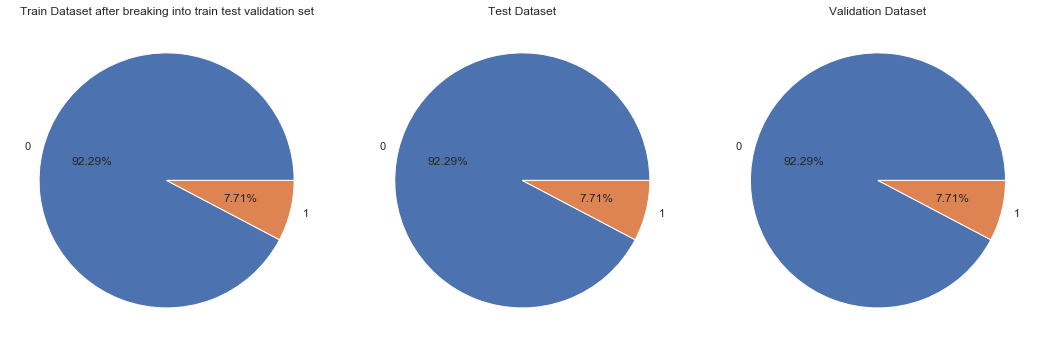

In [723]:
plt.figure(figsize=(15,20))
plt.subplot('131')
plt.pie(y_train_s.default_ind_1.value_counts(),labels=y_train_s.default_ind_1.unique(),autopct = '%1.2f%%')
plt.title('Train Dataset after breaking into train test validation set')

plt.subplot('132')
plt.pie(y_test_s.default_ind_1.value_counts(),labels=y_test_s.default_ind_1.unique(),autopct = '%1.2f%%')
plt.title('Test Dataset')

plt.subplot('133')
plt.pie(y_val_s.default_ind_1.value_counts(),labels=y_val_s.default_ind_1.unique(),autopct = '%1.2f%%')
plt.title('Validation Dataset')

plt.tight_layout()

In [724]:
# Import the classifiers

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# ROC & precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report, confusion_matrix,f1_score,recall_score,precision_score
from sklearn.model_selection import train_test_split, cross_val_score

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [725]:
from sklearn.metrics import precision_recall_fscore_support 

In [776]:
import random
#setting seed=100
random.seed(100)
lgr_s=LogisticRegression()

#fitting the model with no tuning of hyper parameters
lgr_s.fit(X_train_s,y_train_s)
#getting the predicted probabilities for test set
y_lgr_s_proba=lgr_s.predict_proba(X_test_s)[:,1]

#false positive rate , true positive rate values
fpr_lgr_s, tpr_lgr_s, _ = roc_curve(y_test_s,  y_lgr_s_proba)
#area under curve and receiver operating characteristics curve
auc_roc_lgr_s = roc_auc_score(y_test_s, y_lgr_s_proba)

#precision and recall of test data
precision_lgr_s, recall_lgr_s, _ = precision_recall_curve(y_test_s, y_lgr_s_proba)
auc_pr_lgr_s = auc(recall_lgr_s, precision_lgr_s)

#predicted output for test set
y_test_pred_lgr_s=lgr_s.predict(X_test_s)

#accuracy precision recall and F1 score for test set
acc_test_lgr_s=accuracy_score(y_test_s,y_test_pred_lgr_s)
precision_test_lgr_s=precision_score(y_test_s,y_test_pred_lgr_s,average="binary")
recall_test_lgr_s=recall_score(y_test_s,y_test_pred_lgr_s,average="binary")
f1_test_lgr_s=f1_score(y_test_s,y_test_pred_lgr_s,average="binary")
cm_test_lgr_s=confusion_matrix(y_test_s,y_test_pred_lgr_s)

#accuracy precision recall and F1 score for validation set
acc_cv_lgr_s = cross_val_score(lgr_s, X_val_s, y_val_s, cv=5)
precision_cv_lgr_s = cross_val_score(lgr_s, X_val_s, y_val_s, cv=5, scoring='precision')
recall_cv_lgr_s = cross_val_score(lgr_s, X_val_s, y_val_s, cv=5, scoring='recall')
f1_cv_lgr_s = cross_val_score(lgr_s, X_val_s, y_val_s, cv=5, scoring='f1')
#One time run On validation set
cm_val_lgr_s = confusion_matrix(y_val_s,lgr_s.predict(X_val_s))

print("Confusion Matrix : Logistic Regression For test set\n",cm_test_lgr_s)
print("Accuracy : ",acc_test_lgr_s)
print("Precision : ",precision_test_lgr_s)
print("Recall : ",recall_test_lgr_s)
print("F1 score : ",f1_test_lgr_s)
print("Confusion Matrix : Logistic Regression For Crossvalidation set\n",cm_val_lgr_s)
print("Accuracy : ",acc_cv_lgr_s)
print("Precision : ",precision_cv_lgr_s)
print("Recall : ",recall_cv_lgr_s)
print("F1 score : ",f1_cv_lgr_s)

Confusion Matrix : Logistic Regression For test set
 [[81902  1022]
 [ 4636  2287]]
Accuracy :  0.9370262780059434
Precision :  0.691145361136295
Recall :  0.3303481149790553
F1 score :  0.4470289288506646
Confusion Matrix : Logistic Regression For Crossvalidation set
 [[81888  1035]
 [ 4640  2284]]
Accuracy :  [0.93672788 0.93956594 0.94079021 0.93889476 0.94156278]
Precision :  [0.68618619 0.68434032 0.67774086 0.69902913 0.68191721]
Recall :  [0.3299639  0.40072202 0.44187726 0.36389892 0.45231214]
F1 score :  [0.44563627 0.50546448 0.53496503 0.47863248 0.54387489]


In [727]:
import random
#setting seed=100
random.seed(100)
dtree_s=DecisionTreeClassifier()

#fitting the model with no tuning of hyper parameters
dtree_s.fit(X_train_s,y_train_s)
#getting the predicted probabilities for test set
y_dtree_s_proba=dtree_s.predict_proba(X_test_s)[:,1]

#false positive rate , true positive rate values
fpr_dtree_s, tpr_dtree_s, _ = roc_curve(y_test_s,  y_dtree_s_proba)
#area under curve and receiver operating characteristics curve
auc_roc_dtree_s = roc_auc_score(y_test_s, y_dtree_s_proba)

#precision and recall of test data
precision_dtree_s, recall_dtree_s, _ = precision_recall_curve(y_test_s, y_dtree_s_proba)
auc_pr_dtree_s = auc(recall_dtree_s, precision_dtree_s)

#predicted output for test set
y_test_pred_dtree_s=dtree_s.predict(X_test_s)

#accuracy precision recall and F1 score for test set
acc_test_dtree_s=accuracy_score(y_test_s,y_test_pred_dtree_s)
precision_test_dtree_s=precision_score(y_test_s,y_test_pred_dtree_s,average="binary")
recall_test_dtree_s=recall_score(y_test_s,y_test_pred_dtree_s,average="binary")
f1_test_dtree_s=f1_score(y_test_s,y_test_pred_dtree_s,average="binary")
cm_test_dtree_s=confusion_matrix(y_test_s,y_test_pred_dtree_s)

#accuracy precision recall and F1 score for validation set
acc_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5)
precision_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5, scoring='precision')
recall_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5, scoring='recall')
f1_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5, scoring='f1')
#One time run On validation set
cm_val_dtree_s = confusion_matrix(y_val_s,dtree_s.predict(X_val_s))

print("Confusion Matrix : Decision tree For test set\n",cm_test_dtree_s)
print("Accuracy : ",acc_test_dtree_s)
print("Precision : ",precision_test_dtree_s)
print("Recall : ",recall_test_dtree_s)
print("F1 score : ",f1_test_dtree_s)
print("Confusion Matrix : Decision tree For Crossvalidation set\n",cm_val_dtree_s)
print("Accuracy : ",acc_cv_dtree_s)
print("Precision : ",precision_cv_dtree_s)
print("Recall : ",recall_cv_dtree_s)
print("F1 score : ",f1_cv_dtree_s)

Confusion Matrix : Decision tree For test set
 [[81773  1151]
 [ 1081  5842]]
Accuracy :  0.9751577682059501
Precision :  0.8354068354068354
Recall :  0.8438538205980066
F1 score :  0.8396090830698477
Confusion Matrix : Decision tree For Crossvalidation set
 [[81806  1117]
 [ 1111  5813]]
Accuracy :  [0.97250974 0.97250974 0.97072899 0.97150648 0.96922306]
Precision :  [0.82300885 0.82129832 0.80854093 0.80393535 0.8028065 ]
Recall :  [0.8101083  0.81949458 0.82599278 0.82815884 0.78323699]
F1 score :  [0.81403763 0.8148688  0.8211731  0.81589216 0.79499448]


In [728]:
import random
#setting seed=100
random.seed(100)
dtree_s=DecisionTreeClassifier(max_depth=4)

#fitting the model with no tuning of hyper parameters
dtree_s.fit(X_train_s,y_train_s)
#getting the predicted probabilities for test set
y_dtree_s_proba=dtree_s.predict_proba(X_test_s)[:,1]

#false positive rate , true positive rate values
fpr_dtree_s, tpr_dtree_s, _ = roc_curve(y_test_s,  y_dtree_s_proba)
#area under curve and receiver operating characteristics curve
auc_roc_dtree_s = roc_auc_score(y_test_s, y_dtree_s_proba)

#precision and recall of test data
precision_dtree_s, recall_dtree_s, _ = precision_recall_curve(y_test_s, y_dtree_s_proba)
auc_pr_dtree_s = auc(recall_dtree_s, precision_dtree_s)

#predicted output for test set
y_test_pred_dtree_s=dtree_s.predict(X_test_s)

#accuracy precision recall and F1 score for test set
acc_test_dtree_s=accuracy_score(y_test_s,y_test_pred_dtree_s)
precision_test_dtree_s=precision_score(y_test_s,y_test_pred_dtree_s,average="binary")
recall_test_dtree_s=recall_score(y_test_s,y_test_pred_dtree_s,average="binary")
f1_test_dtree_s=f1_score(y_test_s,y_test_pred_dtree_s,average="binary")
cm_test_dtree_s=confusion_matrix(y_test_s,y_test_pred_dtree_s)

#accuracy precision recall and F1 score for validation set
acc_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5)
precision_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5, scoring='precision')
recall_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5, scoring='recall')
f1_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5, scoring='f1')
#One time run On validation set
cm_val_dtree_s = confusion_matrix(y_val_s,dtree_s.predict(X_val_s))

print("Confusion Matrix : Decision tree For test set\n",cm_test_dtree_s)
print("Accuracy : ",acc_test_dtree_s)
print("Precision : ",precision_test_dtree_s)
print("Recall : ",recall_test_dtree_s)
print("F1 score : ",f1_test_dtree_s)
print("Confusion Matrix : Decision tree For Crossvalidation set\n",cm_val_dtree_s)
print("Accuracy : ",acc_cv_dtree_s)
print("Precision : ",precision_cv_dtree_s)
print("Recall : ",recall_cv_dtree_s)
print("F1 score : ",f1_cv_dtree_s)

Confusion Matrix : Decision tree For test set
 [[81300  1624]
 [ 2601  4322]]
Accuracy :  0.9529756140995247
Precision :  0.7268752102253616
Recall :  0.6242958255091723
F1 score :  0.6716916621338099
Confusion Matrix : Decision tree For Crossvalidation set
 [[81248  1675]
 [ 2649  4275]]
Accuracy :  [0.95442404 0.94980523 0.95058431 0.95380934 0.94874221]
Precision :  [0.73531844 0.71265378 0.69991955 0.72182254 0.69022186]
Recall :  [0.64187726 0.58555957 0.62815884 0.65198556 0.60693642]
F1 score :  [0.68516378 0.64234734 0.66210046 0.68512898 0.64590542]


In [729]:
import random
#setting seed=100
random.seed(100)
dtree_s=DecisionTreeClassifier(max_depth=6)

#fitting the model with no tuning of hyper parameters
dtree_s.fit(X_train_s,y_train_s)
#getting the predicted probabilities for test set
y_dtree_s_proba=dtree_s.predict_proba(X_test_s)[:,1]

#false positive rate , true positive rate values
fpr_dtree_s, tpr_dtree_s, _ = roc_curve(y_test_s,  y_dtree_s_proba)
#area under curve and receiver operating characteristics curve
auc_roc_dtree_s = roc_auc_score(y_test_s, y_dtree_s_proba)

#precision and recall of test data
precision_dtree_s, recall_dtree_s, _ = precision_recall_curve(y_test_s, y_dtree_s_proba)
auc_pr_dtree_s = auc(recall_dtree_s, precision_dtree_s)

#predicted output for test set
y_test_pred_dtree_s=dtree_s.predict(X_test_s)

#accuracy precision recall and F1 score for test set
acc_test_dtree_s=accuracy_score(y_test_s,y_test_pred_dtree_s)
precision_test_dtree_s=precision_score(y_test_s,y_test_pred_dtree_s,average="binary")
recall_test_dtree_s=recall_score(y_test_s,y_test_pred_dtree_s,average="binary")
f1_test_dtree_s=f1_score(y_test_s,y_test_pred_dtree_s,average="binary")
cm_test_dtree_s=confusion_matrix(y_test_s,y_test_pred_dtree_s)

#accuracy precision recall and F1 score for validation set
acc_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5)
precision_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5, scoring='precision')
recall_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5, scoring='recall')
f1_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5, scoring='f1')
#One time run On validation set
cm_val_dtree_s = confusion_matrix(y_val_s,dtree_s.predict(X_val_s))

print("Confusion Matrix : Decision tree For test set\n",cm_test_dtree_s)
print("Accuracy : ",acc_test_dtree_s)
print("Precision : ",precision_test_dtree_s)
print("Recall : ",recall_test_dtree_s)
print("F1 score : ",f1_test_dtree_s)
print("Confusion Matrix : Decision tree For Crossvalidation set\n",cm_val_dtree_s)
print("Accuracy : ",acc_cv_dtree_s)
print("Precision : ",precision_cv_dtree_s)
print("Recall : ",recall_cv_dtree_s)
print("F1 score : ",f1_cv_dtree_s)

Confusion Matrix : Decision tree For test set
 [[80354  2570]
 [  986  5937]]
Accuracy :  0.9604216056184403
Precision :  0.6978958504760785
Recall :  0.8575761952910588
F1 score :  0.7695398574206093
Confusion Matrix : Decision tree For Crossvalidation set
 [[80355  2568]
 [  998  5926]]
Accuracy :  [0.96505287 0.95843072 0.96037841 0.96249096 0.95959484]
Precision :  [0.76499303 0.73790022 0.78492803 0.79882649 0.76489533]
Recall :  [0.79205776 0.71407942 0.66931408 0.68808664 0.68641618]
F1 score :  [0.77691218 0.72607261 0.72252533 0.73847346 0.72353389]


In [730]:
#setting seed=100
random.seed(100)
dtree_s=DecisionTreeClassifier(max_depth=8)

#fitting the model with no tuning of hyper parameters
dtree_s.fit(X_train_s,y_train_s)
#getting the predicted probabilities for test set
y_dtree_s_proba=dtree_s.predict_proba(X_test_s)[:,1]

#false positive rate , true positive rate values
fpr_dtree_s, tpr_dtree_s, _ = roc_curve(y_test_s,  y_dtree_s_proba)
#area under curve and receiver operating characteristics curve
auc_roc_dtree_s = roc_auc_score(y_test_s, y_dtree_s_proba)

#precision and recall of test data
precision_dtree_s, recall_dtree_s, _ = precision_recall_curve(y_test_s, y_dtree_s_proba)
auc_pr_dtree_s = auc(recall_dtree_s, precision_dtree_s)

#predicted output for test set
y_test_pred_dtree_s=dtree_s.predict(X_test_s)

#accuracy precision recall and F1 score for test set
acc_test_dtree_s=accuracy_score(y_test_s,y_test_pred_dtree_s)
precision_test_dtree_s=precision_score(y_test_s,y_test_pred_dtree_s,average="binary")
recall_test_dtree_s=recall_score(y_test_s,y_test_pred_dtree_s,average="binary")
f1_test_dtree_s=f1_score(y_test_s,y_test_pred_dtree_s,average="binary")
cm_test_dtree_s=confusion_matrix(y_test_s,y_test_pred_dtree_s)

#accuracy precision recall and F1 score for validation set
acc_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5)
precision_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5, scoring='precision')
recall_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5, scoring='recall')
f1_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5, scoring='f1')
#One time run On validation set
cm_val_dtree_s = confusion_matrix(y_val_s,dtree_s.predict(X_val_s))

print("Confusion Matrix : Decision tree For test set\n",cm_test_dtree_s)
print("Accuracy : ",acc_test_dtree_s)
print("Precision : ",precision_test_dtree_s)
print("Recall : ",recall_test_dtree_s)
print("F1 score : ",f1_test_dtree_s)
print("Confusion Matrix : Decision tree For Crossvalidation set\n",cm_val_dtree_s)
print("Accuracy : ",acc_cv_dtree_s)
print("Precision : ",precision_cv_dtree_s)
print("Recall : ",recall_cv_dtree_s)
print("F1 score : ",f1_cv_dtree_s)

Confusion Matrix : Decision tree For test set
 [[81830  1094]
 [ 1228  5695]]
Accuracy :  0.9741560653110287
Precision :  0.838856974517602
Recall :  0.8226202513361259
F1 score :  0.8306592765460911
Confusion Matrix : Decision tree For Crossvalidation set
 [[81872  1051]
 [ 1223  5701]]
Accuracy :  [0.9754591  0.97173066 0.97356706 0.97267516 0.97306322]
Precision :  [0.84852941 0.83108108 0.83236152 0.8170904  0.82773723]
Recall :  [0.833213   0.79494585 0.82310469 0.83537906 0.81864162]
F1 score :  [0.84080146 0.81342183 0.83001087 0.82483054 0.82442748]


In [731]:
import random
#setting seed=100
random.seed(100)
dtree_s=DecisionTreeClassifier(max_depth=9)

#fitting the model with no tuning of hyper parameters
dtree_s.fit(X_train_s,y_train_s)
#getting the predicted probabilities for test set
y_dtree_s_proba=dtree_s.predict_proba(X_test_s)[:,1]

#false positive rate , true positive rate values
fpr_dtree_s, tpr_dtree_s, _ = roc_curve(y_test_s,  y_dtree_s_proba)
#area under curve and receiver operating characteristics curve
auc_roc_dtree_s = roc_auc_score(y_test_s, y_dtree_s_proba)

#precision and recall of test data
precision_dtree_s, recall_dtree_s, _ = precision_recall_curve(y_test_s, y_dtree_s_proba)
auc_pr_dtree_s = auc(recall_dtree_s, precision_dtree_s)

#predicted output for test set
y_test_pred_dtree_s=dtree_s.predict(X_test_s)

#accuracy precision recall and F1 score for test set
acc_test_dtree_s=accuracy_score(y_test_s,y_test_pred_dtree_s)
precision_test_dtree_s=precision_score(y_test_s,y_test_pred_dtree_s,average="binary")
recall_test_dtree_s=recall_score(y_test_s,y_test_pred_dtree_s,average="binary")
f1_test_dtree_s=f1_score(y_test_s,y_test_pred_dtree_s,average="binary")
cm_test_dtree_s=confusion_matrix(y_test_s,y_test_pred_dtree_s)

#accuracy precision recall and F1 score for validation set
acc_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5)
precision_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5, scoring='precision')
recall_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5, scoring='recall')
f1_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5, scoring='f1')
#One time run On validation set
cm_val_dtree_s = confusion_matrix(y_val_s,dtree_s.predict(X_val_s))

print("Confusion Matrix : Decision tree For test set\n",cm_test_dtree_s)
print("Accuracy : ",acc_test_dtree_s)
print("Precision : ",precision_test_dtree_s)
print("Recall : ",recall_test_dtree_s)
print("F1 score : ",f1_test_dtree_s)
print("Confusion Matrix : Decision tree For Crossvalidation set\n",cm_val_dtree_s)
print("Accuracy : ",acc_cv_dtree_s)
print("Precision : ",precision_cv_dtree_s)
print("Recall : ",recall_cv_dtree_s)
print("F1 score : ",f1_cv_dtree_s)

Confusion Matrix : Decision tree For test set
 [[81976   948]
 [ 1040  5883]]
Accuracy :  0.9778734960544035
Precision :  0.8612209046991656
Recall :  0.8497761086234291
F1 score :  0.8554602297513451
Confusion Matrix : Decision tree For Crossvalidation set
 [[82018   905]
 [ 1031  5893]]
Accuracy :  [0.97646077 0.97523651 0.97662771 0.97718293 0.97606857]
Precision :  [0.85419735 0.84279476 0.84916606 0.84626335 0.85575486]
Recall :  [0.83754513 0.8368231  0.84548736 0.85703971 0.83020231]
F1 score :  [0.84693878 0.84004353 0.84980094 0.85098743 0.84225972]


In [732]:
import random
#setting seed=100
random.seed(100)
dtree_s=DecisionTreeClassifier(max_depth=10)

#fitting the model with no tuning of hyper parameters
dtree_s.fit(X_train_s,y_train_s)
#getting the predicted probabilities for test set
y_dtree_s_proba=dtree_s.predict_proba(X_test_s)[:,1]

#false positive rate , true positive rate values
fpr_dtree_s, tpr_dtree_s, _ = roc_curve(y_test_s,  y_dtree_s_proba)
#area under curve and receiver operating characteristics curve
auc_roc_dtree_s = roc_auc_score(y_test_s, y_dtree_s_proba)

#precision and recall of test data
precision_dtree_s, recall_dtree_s, _ = precision_recall_curve(y_test_s, y_dtree_s_proba)
auc_pr_dtree_s = auc(recall_dtree_s, precision_dtree_s)

#predicted output for test set
y_test_pred_dtree_s=dtree_s.predict(X_test_s)

#accuracy precision recall and F1 score for test set
acc_test_dtree_s=accuracy_score(y_test_s,y_test_pred_dtree_s)
precision_test_dtree_s=precision_score(y_test_s,y_test_pred_dtree_s,average="binary")
recall_test_dtree_s=recall_score(y_test_s,y_test_pred_dtree_s,average="binary")
f1_test_dtree_s=f1_score(y_test_s,y_test_pred_dtree_s,average="binary")
cm_test_dtree_s=confusion_matrix(y_test_s,y_test_pred_dtree_s)

#accuracy precision recall and F1 score for validation set
acc_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5)
precision_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5, scoring='precision')
recall_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5, scoring='recall')
f1_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5, scoring='f1')
#One time run On validation set
cm_val_dtree_s = confusion_matrix(y_val_s,dtree_s.predict(X_val_s))

print("Confusion Matrix : Decision tree For test set\n",cm_test_dtree_s)
print("Accuracy : ",acc_test_dtree_s)
print("Precision : ",precision_test_dtree_s)
print("Recall : ",recall_test_dtree_s)
print("F1 score : ",f1_test_dtree_s)
print("Confusion Matrix : Decision tree For Crossvalidation set\n",cm_val_dtree_s)
print("Accuracy : ",acc_cv_dtree_s)
print("Precision : ",precision_cv_dtree_s)
print("Recall : ",recall_cv_dtree_s)
print("F1 score : ",f1_cv_dtree_s)

Confusion Matrix : Decision tree For test set
 [[82024   900]
 [  976  5947]]
Accuracy :  0.9791200596569725
Precision :  0.8685555717832627
Recall :  0.8590206557850643
F1 score :  0.8637618010167031
Confusion Matrix : Decision tree For Crossvalidation set
 [[82071   852]
 [  979  5945]]
Accuracy :  [0.97801892 0.97623817 0.97640512 0.97746118 0.97668077]
Precision :  [0.85871157 0.85168869 0.84710145 0.86518519 0.8526393 ]
Recall :  [0.84909747 0.83610108 0.8433213  0.84404332 0.83815029]
F1 score :  [0.8540146  0.84475219 0.84397678 0.84994524 0.84808743]


In [733]:
#setting seed=100
random.seed(100)
dtree_s=DecisionTreeClassifier(max_depth=12)

#fitting the model with no tuning of hyper parameters
dtree_s.fit(X_train_s,y_train_s)
#getting the predicted probabilities for test set
y_dtree_s_proba=dtree_s.predict_proba(X_test_s)[:,1]

#false positive rate , true positive rate values
fpr_dtree_s, tpr_dtree_s, _ = roc_curve(y_test_s,  y_dtree_s_proba)
#area under curve and receiver operating characteristics curve
auc_roc_dtree_s = roc_auc_score(y_test_s, y_dtree_s_proba)

#precision and recall of test data
precision_dtree_s, recall_dtree_s, _ = precision_recall_curve(y_test_s, y_dtree_s_proba)
auc_pr_dtree_s = auc(recall_dtree_s, precision_dtree_s)

#predicted output for test set
y_test_pred_dtree_s=dtree_s.predict(X_test_s)

#accuracy precision recall and F1 score for test set
acc_test_dtree_s=accuracy_score(y_test_s,y_test_pred_dtree_s)
precision_test_dtree_s=precision_score(y_test_s,y_test_pred_dtree_s,average="binary")
recall_test_dtree_s=recall_score(y_test_s,y_test_pred_dtree_s,average="binary")
f1_test_dtree_s=f1_score(y_test_s,y_test_pred_dtree_s,average="binary")
cm_test_dtree_s=confusion_matrix(y_test_s,y_test_pred_dtree_s)

#accuracy precision recall and F1 score for validation set
acc_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5)
precision_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5, scoring='precision')
recall_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5, scoring='recall')
f1_cv_dtree_s = cross_val_score(dtree_s, X_val_s, y_val_s, cv=5, scoring='f1')
#One time run On validation set
cm_val_dtree_s = confusion_matrix(y_val_s,dtree_s.predict(X_val_s))

print("Confusion Matrix : Decision tree For test set\n",cm_test_dtree_s)
print("Accuracy : ",acc_test_dtree_s)
print("Precision : ",precision_test_dtree_s)
print("Recall : ",recall_test_dtree_s)
print("F1 score : ",f1_test_dtree_s)
print("Confusion Matrix : Decision tree For Crossvalidation set\n",cm_val_dtree_s)
print("Accuracy : ",acc_cv_dtree_s)
print("Precision : ",precision_cv_dtree_s)
print("Recall : ",recall_cv_dtree_s)
print("F1 score : ",f1_cv_dtree_s)

Confusion Matrix : Decision tree For test set
 [[82094   830]
 [  887  6036]]
Accuracy :  0.9808897347713335
Precision :  0.8791144771337023
Recall :  0.8718763541817132
F1 score :  0.875480455435492
Confusion Matrix : Decision tree For Crossvalidation set
 [[82106   817]
 [  894  6030]]
Accuracy :  [0.97701725 0.97623817 0.97562604 0.97668206 0.97501113]
Precision :  [0.86237846 0.86152695 0.84126984 0.85840708 0.84706756]
Recall :  [0.833213   0.83032491 0.83971119 0.84765343 0.82297688]
F1 score :  [0.85231447 0.8456179  0.84195298 0.84971098 0.83700441]


In [734]:
from sklearn import metrics
def plot_threshold_precision_recall_curve(y_p,y_proba):
    precision, recall, thresholds = precision_recall_curve(y_p,y_proba) 
   #retrieve probability of being 1(in second column of probs_y)
    #pr_auc = metrics.auc(recall, precision)

    plt.title("Precision-Recall vs Threshold Chart")
    subplot(1,2,1)
    plt.plot(thresholds, precision[: -1],"b--", label="Precision")
    plt.ylabel("Precision")
    plt.xlabel("Threshold")
    subplot(1,2,2)
    plt.plot(thresholds, recall[: -1], "r--", label="Recall")
    plt.ylabel("Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="lower left")
    plt.ylim([0,1])

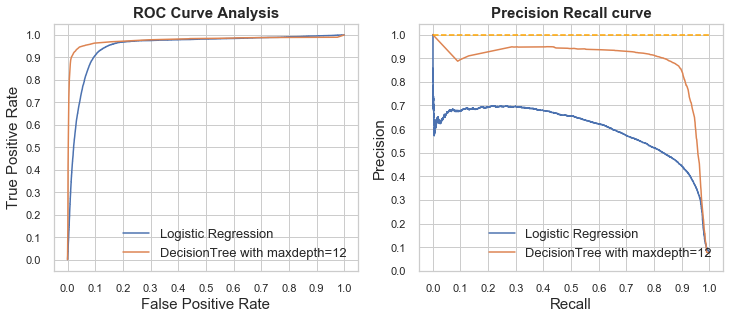

In [735]:
from pylab import *
sns.set(rc={"figure.figsize":(12,10)})
sns.set_style("whitegrid")
subplot(2,2,1)
plt.plot(fpr_lgr_s,tpr_lgr_s,label="Logistic Regression")
plt.plot(fpr_dtree_s,tpr_dtree_s,label="DecisionTree with maxdepth=12")
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

subplot(2,2,2)
plt.plot(recall_lgr_s,precision_lgr_s,label="Logistic Regression")
plt.plot(recall_dtree_s,precision_dtree_s,label="DecisionTree with maxdepth=12")

no_skill=len(y_test_s[y_test_s==1])/len(y_test_s)
plt.plot([0,1],[no_skill,no_skill],color="orange",linestyle="--")

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=15)

plt.title('Precision Recall curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

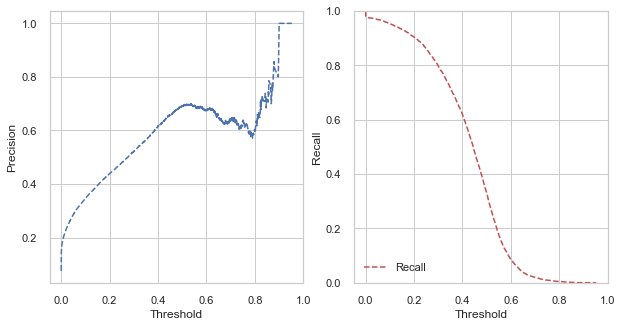

In [736]:
sns.set(rc={"figure.figsize":(10,5)})
sns.set_style("whitegrid")
subplot(2,2,1)
plot_threshold_precision_recall_curve(y_test_s,y_lgr_s_proba)

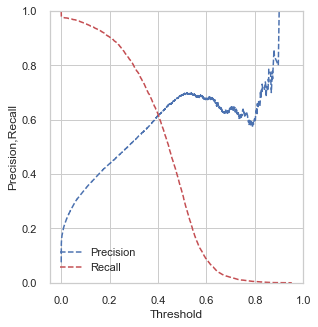

In [777]:
sns.set(rc={"figure.figsize":(10,5)})
sns.set_style("whitegrid")
subplot(2,2,1)
plot_threshold_precision_recall_curve_v2(y_test_s,y_lgr_s_proba)

#therefore we will consider the threshold of 0.4

In [737]:
temp_lgr_s_proba=lgr_s.predict_proba(X_test_s)
y_pred_proba_test_lgr_s=np.where(temp_lgr_s_proba[:,1]<0.4,0,1)
print(confusion_matrix(y_test_s,y_pred_proba_test_lgr_s))
print(confusion_matrix(y_test_s,y_test_pred_lgr_s))

[[80235  2689]
 [ 2628  4295]]
[[81902  1022]
 [ 4636  2287]]


#therefore from above : We conclude that decision tree is performing better than logistic regression but let us now check if the decision tree also work better on the final test set using stratified sampling.

In [738]:
X_test=testset.iloc[:,:128].copy()
y_test=testset.iloc[:,128:129].copy()
print(X_test.shape)
print(y_test.shape)
print(X_test.columns)
print(y_test.columns)

(256991, 128)
(256991, 1)
Index(['int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'total_pymnt', 'last_pymnt_amnt', 'tot_cur_bal',
       ...
       'addr_state_TN', 'addr_state_TX', 'addr_state_UT', 'addr_state_VA',
       'addr_state_VT', 'addr_state_WA', 'addr_state_WI', 'addr_state_WV',
       'addr_state_WY', 'initial_list_status_w'],
      dtype='object', length=128)
Index(['default_ind_1'], dtype='object')


In [739]:
#getting the predicted probabilities for test set
y_lgr_proba=lgr_s.predict_proba(X_test)

#false positive rate , true positive rate values
fpr_lgr, tpr_lgr, _ = roc_curve(y_test,  y_lgr_proba[:,1])
#area under curve and receiver operating characteristics curve
auc_roc_lgr = roc_auc_score(y_test, y_lgr_proba[:,1])

#precision and recall of test data
precision_lgr, recall_lgr, _ = precision_recall_curve(y_test, y_lgr_proba[:,1])
auc_pr_lgr = auc(recall_lgr, precision_lgr)

#predicted output for test set
y_test_pred_lgr=np.where(y_lgr_proba[:,1]<0.4,0,1)

#accuracy precision recall and F1 score for test set
acc_test_lgr=accuracy_score(y_test,y_test_pred_lgr)
precision_test_lgr=precision_score(y_test,y_test_pred_lgr,average="binary")
recall_test_lgr=recall_score(y_test,y_test_pred_lgr,average="binary")
f1_test_lgr=f1_score(y_test,y_test_pred_lgr,average="binary")
cm_test_lgr=confusion_matrix(y_test,y_test_pred_lgr)

print("Confusion Matrix : Logistic regression For test set\n",cm_test_lgr)
print("Accuracy : ",acc_test_lgr)
print("Precision : ",precision_test_lgr)
print("Recall : ",recall_test_lgr)
print("F1 score : ",f1_test_lgr)

Confusion Matrix : Logistic regression For test set
 [[256096    584]
 [    71    240]]
Accuracy :  0.9974512726126595
Precision :  0.2912621359223301
Recall :  0.7717041800643086
F1 score :  0.42290748898678415


In [740]:
import random
#setting seed=100
random.seed(100)
dtree_s=DecisionTreeClassifier(max_depth=6)
dtree_s.fit(X_train_s,y_train_s)

#getting the predicted probabilities for test set
y_dtree_proba=dtree_s.predict_proba(X_test)

#false positive rate , true positive rate values
fpr_dtree, tpr_dtree, _ = roc_curve(y_test,  y_dtree_proba[:,1])
#area under curve and receiver operating characteristics curve
auc_roc_dtree = roc_auc_score(y_test, y_dtree_proba[:,1])

#precision and recall of test data
precision_dtree, recall_dtree, _ = precision_recall_curve(y_test, y_dtree_proba[:,1])
auc_pr_dtree = auc(recall_dtree, precision_dtree)

#predicted output for test set
y_test_pred_dtree=dtree_s.predict(X_test)

#accuracy precision recall and F1 score for test set
acc_test_dtree=accuracy_score(y_test,y_test_pred_dtree)
precision_test_dtree=precision_score(y_test,y_test_pred_dtree,average="binary")
recall_test_dtree=recall_score(y_test,y_test_pred_dtree,average="binary")
f1_test_dtree=f1_score(y_test,y_test_pred_dtree,average="binary")
cm_test_dtree=confusion_matrix(y_test,y_test_pred_dtree)

print("Confusion Matrix : Decision For test set\n",cm_test_dtree)
print("Accuracy : ",acc_test_dtree)
print("Precision : ",precision_test_dtree)
print("Recall : ",recall_test_dtree)
print("F1 score : ",f1_test_dtree)

Confusion Matrix : Decision For test set
 [[217879  38801]
 [    45    266]]
Accuracy :  0.8488429555898844
Precision :  0.006808815624440064
Recall :  0.8553054662379421
F1 score :  0.013510081771547564


As can be seen that the decision tree algorithm over fit the testing and crossvalidation sets. Therefore using the logistic regression for the model building as it shows consistently good behaviour across testing, cross validation and final test set.

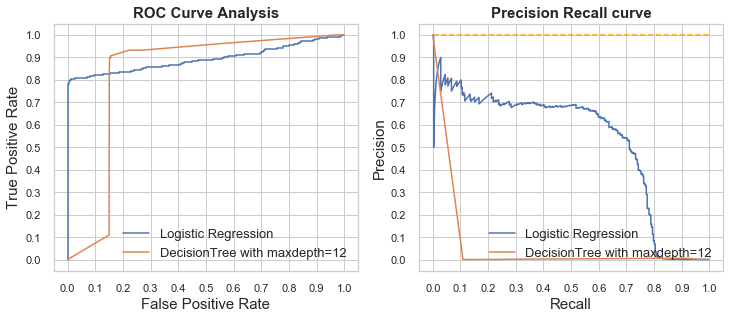

In [741]:
from pylab import *
sns.set(rc={"figure.figsize":(12,10)})
sns.set_style("whitegrid")
subplot(2,2,1)
plt.plot(fpr_lgr,tpr_lgr,label="Logistic Regression")
plt.plot(fpr_dtree,tpr_dtree,label="DecisionTree with maxdepth=12")
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

subplot(2,2,2)
plt.plot(recall_lgr,precision_lgr,label="Logistic Regression")
plt.plot(recall_dtree,precision_dtree,label="DecisionTree with maxdepth=12")

nokill=len(y_test[y_test==1])/len(y_test)
plt.plot([0,1],[nokill,nokill],color="orange",linestyle="--")

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=15)

plt.title('Precision Recall curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [742]:
import random
#setting seed=100
random.seed(100)
dtree_s=DecisionTreeClassifier(max_depth=4)
dtree_s.fit(X_train_s,y_train_s)

#getting the predicted probabilities for test set
y_dtree_proba=dtree_s.predict_proba(X_test)

#false positive rate , true positive rate values
fpr_dtree, tpr_dtree, _ = roc_curve(y_test,  y_dtree_proba[:,1])
#area under curve and receiver operating characteristics curve
auc_roc_dtree = roc_auc_score(y_test, y_dtree_proba[:,1])

#precision and recall of test data
precision_dtree, recall_dtree, _ = precision_recall_curve(y_test, y_dtree_proba[:,1])
auc_pr_dtree = auc(recall_dtree, precision_dtree)

#predicted output for test set
y_test_pred_dtree=dtree_s.predict(X_test)

#accuracy precision recall and F1 score for test set
acc_test_dtree=accuracy_score(y_test,y_test_pred_dtree)
precision_test_dtree=precision_score(y_test,y_test_pred_dtree,average="binary")
recall_test_dtree=recall_score(y_test,y_test_pred_dtree,average="binary")
f1_test_dtree=f1_score(y_test,y_test_pred_dtree,average="binary")
cm_test_dtree=confusion_matrix(y_test,y_test_pred_dtree)

print("Confusion Matrix : Decision For test set\n",cm_test_dtree)
print("Accuracy : ",acc_test_dtree)
print("Precision : ",precision_test_dtree)
print("Recall : ",recall_test_dtree)
print("F1 score : ",f1_test_dtree)

Confusion Matrix : Decision For test set
 [[233610  23070]
 [    95    216]]
Accuracy :  0.9098606565988692
Precision :  0.009275959804174182
Recall :  0.6945337620578779
F1 score :  0.01830741195914735


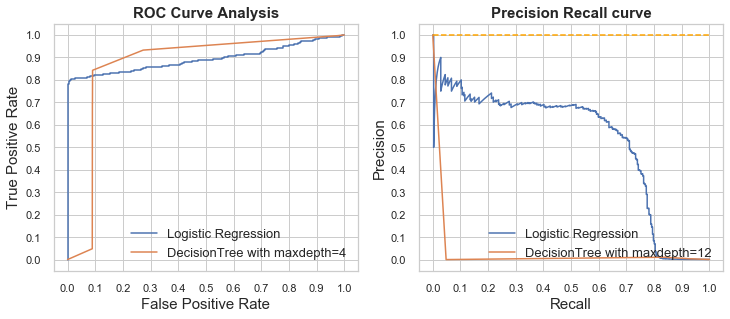

In [743]:
from pylab import *
sns.set(rc={"figure.figsize":(12,10)})
sns.set_style("whitegrid")
subplot(2,2,1)
plt.plot(fpr_lgr,tpr_lgr,label="Logistic Regression")
plt.plot(fpr_dtree,tpr_dtree,label="DecisionTree with maxdepth=4")
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

subplot(2,2,2)
plt.plot(recall_lgr,precision_lgr,label="Logistic Regression")
plt.plot(recall_dtree,precision_dtree,label="DecisionTree with maxdepth=12")

nokill=len(y_test[y_test==1])/len(y_test)
plt.plot([0,1],[nokill,nokill],color="orange",linestyle="--")

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=15)

plt.title('Precision Recall curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [744]:
import random
#setting seed=100
random.seed(100)
dtree_s=DecisionTreeClassifier(max_depth=12)
dtree_s.fit(X_train_s,y_train_s)

#getting the predicted probabilities for test set
y_dtree_proba=dtree_s.predict_proba(X_test)

#false positive rate , true positive rate values
fpr_dtree, tpr_dtree, _ = roc_curve(y_test,  y_dtree_proba[:,1])
#area under curve and receiver operating characteristics curve
auc_roc_dtree = roc_auc_score(y_test, y_dtree_proba[:,1])

#precision and recall of test data
precision_dtree, recall_dtree, _ = precision_recall_curve(y_test, y_dtree_proba[:,1])
auc_pr_dtree = auc(recall_dtree, precision_dtree)

#predicted output for test set
y_test_pred_dtree=dtree_s.predict(X_test)

#accuracy precision recall and F1 score for test set
acc_test_dtree=accuracy_score(y_test,y_test_pred_dtree)
precision_test_dtree=precision_score(y_test,y_test_pred_dtree,average="binary")
recall_test_dtree=recall_score(y_test,y_test_pred_dtree,average="binary")
f1_test_dtree=f1_score(y_test,y_test_pred_dtree,average="binary")
cm_test_dtree=confusion_matrix(y_test,y_test_pred_dtree)

print("Confusion Matrix : Decision For test set\n",cm_test_dtree)
print("Accuracy : ",acc_test_dtree)
print("Precision : ",precision_test_dtree)
print("Recall : ",recall_test_dtree)
print("F1 score : ",f1_test_dtree)

Confusion Matrix : Decision For test set
 [[143497 113183]
 [    26    285]]
Accuracy :  0.5594826277963042
Precision :  0.0025117213663764233
Recall :  0.9163987138263665
F1 score :  0.005009711809736419


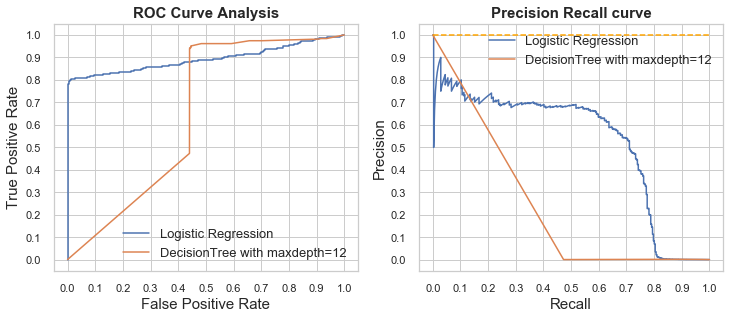

In [745]:
from pylab import *
sns.set(rc={"figure.figsize":(12,10)})
sns.set_style("whitegrid")
subplot(2,2,1)
plt.plot(fpr_lgr,tpr_lgr,label="Logistic Regression")
plt.plot(fpr_dtree,tpr_dtree,label="DecisionTree with maxdepth=12")
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

subplot(2,2,2)
plt.plot(recall_lgr,precision_lgr,label="Logistic Regression")
plt.plot(recall_dtree,precision_dtree,label="DecisionTree with maxdepth=12")

nokill=len(y_test[y_test==1])/len(y_test)
plt.plot([0,1],[nokill,nokill],color="orange",linestyle="--")

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=15)

plt.title('Precision Recall curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='upper right')

plt.show()

As we can see that the logistic regression both AUC of ROC and precision and recall are good than the decision tree with maxdepth=6. Therefore choosing logistic regression.

# Oversampling Data to fit on decision trees

In [746]:
num_0 = len(X[train['default_ind_1']==0])
num_1 = len(X[train['default_ind_1']==1])
print(num_0,num_1)

552822 46156


In [747]:
temp=train.copy()

In [748]:
#Random oversample
oversampled_data = pd.concat([ temp[temp['default_ind_1']==0] , temp[temp['default_ind_1']==1].sample(num_0, replace=True) ]).copy()
print(len(oversampled_data))

1105644


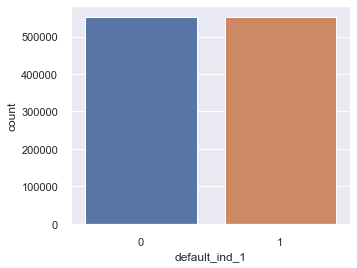

In [749]:
sns.set(rc={"figure.figsize":(5,4)})
sns.countplot(x="default_ind_1",data=oversampled_data)

In [750]:
oversampled_data.columns

Index(['int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'total_pymnt', 'last_pymnt_amnt', 'tot_cur_bal',
       ...
       'addr_state_TX', 'addr_state_UT', 'addr_state_VA', 'addr_state_VT',
       'addr_state_WA', 'addr_state_WI', 'addr_state_WV', 'addr_state_WY',
       'initial_list_status_w', 'default_ind_1'],
      dtype='object', length=129)

In [751]:
X_os=oversampled_data.iloc[:,0:128].copy()
Y_os=oversampled_data.iloc[:,128:139].copy()
print(X_os.columns)
print(X_os.shape)
print(Y_os.columns)
print(Y_os.shape)

Index(['int_rate', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'total_pymnt', 'last_pymnt_amnt', 'tot_cur_bal',
       ...
       'addr_state_TN', 'addr_state_TX', 'addr_state_UT', 'addr_state_VA',
       'addr_state_VT', 'addr_state_WA', 'addr_state_WI', 'addr_state_WV',
       'addr_state_WY', 'initial_list_status_w'],
      dtype='object', length=128)
(1105644, 128)
Index(['default_ind_1'], dtype='object')
(1105644, 1)


In [752]:
def data_split_os(examples, labels, train_frac, random_state=None):
    ''' https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    param data:       Data to be split
    param train_frac: Ratio of train set to whole dataset

    Randomly split dataset, based on these ratios:
        'train': train_frac
        'valid': (1-train_frac) / 2
        'test':  (1-train_frac) / 2

    Eg: passing train_frac=0.8 gives a 80% / 10% / 10% split
    '''

    assert train_frac >= 0 and train_frac <= 1, "Invalid training set fraction"

    X_train, X_tmp, y_train, Y_tmp = sklearn.model_selection.train_test_split(
                                        examples, labels, train_size=train_frac, random_state=random_state)

    X, X_test, y, y_test   = sklearn.model_selection.train_test_split(
                                        X_tmp, Y_tmp, train_size=0.5, random_state=random_state)

    return X_train, X, X_test,  y_train, y, y_test

In [753]:
X_train_os,X_val_os,X_test_os,y_train_os,y_val_os,y_test_os=data_split_os(X_os,Y_os,0.70,100)

In [754]:
print(X_train_os.shape)
print(X_val_os.shape)
print(X_test_os.shape)

print(y_train_os.shape)
print(y_val_os.shape)
print(y_test_os.shape)

(773950, 128)
(165847, 128)
(165847, 128)
(773950, 1)
(165847, 1)
(165847, 1)


In [755]:
import random
#setting seed=100
random.seed(100)
dtree_os=DecisionTreeClassifier(max_depth=6)

#fitting the model with no tuning of hyper parameters
dtree_os.fit(X_train_os,y_train_os)
#getting the predicted probabilities for test set
y_dtree_os_proba=dtree_os.predict_proba(X_test_os)[:,1]

#false positive rate , true positive rate values
fpr_dtree_os, tpr_dtree_os, _ = roc_curve(y_test_os,  y_dtree_os_proba)
#area under curve and receiver operating characteristics curve
auc_roc_dtree_os = roc_auc_score(y_test_os, y_dtree_os_proba)

#precision and recall of test data
precision_dtree_os, recall_dtree_os, _ = precision_recall_curve(y_test_os, y_dtree_os_proba)
auc_pr_dtree_os = auc(recall_dtree_os, precision_dtree_os)

#predicted output for test set
y_test_pred_dtree_os=dtree_os.predict(X_test_os)

#accuracy precision recall and F1 score for test set
acc_test_dtree_os=accuracy_score(y_test_os,y_test_pred_dtree_os)
precision_test_dtree_os=precision_score(y_test_os,y_test_pred_dtree_os,average="binary")
recall_test_dtree_os=recall_score(y_test_os,y_test_pred_dtree_os,average="binary")
f1_test_dtree_os=f1_score(y_test_os,y_test_pred_dtree_os,average="binary")
cm_test_dtree_os=confusion_matrix(y_test_os,y_test_pred_dtree_os)

#accuracy precision recall and F1 score for validation set
acc_cv_dtree_os = cross_val_score(dtree_os, X_val_os, y_val_os, cv=5)
precision_cv_dtree_os = cross_val_score(dtree_os, X_val_os, y_val_os, cv=5, scoring='precision')
recall_cv_dtree_os = cross_val_score(dtree_os, X_val_os, y_val_os, cv=5, scoring='recall')
f1_cv_dtree_os = cross_val_score(dtree_os, X_val_os, y_val_os, cv=5, scoring='f1')
#One time run On validation set
cm_val_dtree_os = confusion_matrix(y_val_os,dtree_os.predict(X_val_os))

print("Confusion Matrix : Decision tree For test set\n",cm_test_dtree_os)
print("Accuracy : ",acc_test_dtree_os)
print("Precision : ",precision_test_dtree_os)
print("Recall : ",recall_test_dtree_os)
print("F1 score : ",f1_test_dtree_os)
print("Confusion Matrix : Decision tree For Crossvalidation set\n",cm_val_dtree_os)
print("Accuracy : ",acc_cv_dtree_os)
print("Precision : ",precision_cv_dtree_os)
print("Recall : ",recall_cv_dtree_os)
print("F1 score : ",f1_cv_dtree_os)

Confusion Matrix : Decision tree For test set
 [[77060  5982]
 [ 3227 79578]]
Accuracy :  0.9444729178097886
Precision :  0.9300841514726508
Recall :  0.9610289233741924
F1 score :  0.945303358774092
Confusion Matrix : Decision tree For Crossvalidation set
 [[76779  6091]
 [ 3100 79877]]
Accuracy :  [0.94410612 0.94428701 0.94386325 0.9437125  0.94196388]
Precision :  [0.93095586 0.93002099 0.93072606 0.93074403 0.92824615]
Recall :  [0.95950832 0.96095445 0.95938536 0.95884303 0.95805966]
F1 score :  [0.94504451 0.94523471 0.94478564 0.94458461 0.9429173 ]


In [756]:
#getting the predicted probabilities for test set
y_dtree_proba=dtree_os.predict_proba(X_test)

#false positive rate , true positive rate values
fpr_dtree, tpr_dtree, _ = roc_curve(y_test,  y_dtree_proba[:,1])
#area under curve and receiver operating characteristics curve
auc_roc_dtree = roc_auc_score(y_test, y_dtree_proba[:,1])

#precision and recall of test data
precision_dtree, recall_dtree, _ = precision_recall_curve(y_test, y_dtree_proba[:,1])
auc_pr_dtree = auc(recall_dtree, precision_dtree)

#predicted output for test set
y_test_pred_dtree=dtree_os.predict(X_test)

#accuracy precision recall and F1 score for test set
acc_test_dtree=accuracy_score(y_test,y_test_pred_dtree)
precision_test_dtree=precision_score(y_test,y_test_pred_dtree,average="binary")
recall_test_dtree=recall_score(y_test,y_test_pred_dtree,average="binary")
f1_test_dtree=f1_score(y_test,y_test_pred_dtree,average="binary")
cm_test_dtree=confusion_matrix(y_test,y_test_pred_dtree)

print("Confusion Matrix : Decision For test set\n",cm_test_dtree)
print("Accuracy : ",acc_test_dtree)
print("Precision : ",precision_test_dtree)
print("Recall : ",recall_test_dtree)
print("F1 score : ",f1_test_dtree)

Confusion Matrix : Decision For test set
 [[151011 105669]
 [    20    291]]
Accuracy :  0.5887443529150826
Precision :  0.0027463193657984147
Recall :  0.9356913183279743
F1 score :  0.005476564631931571


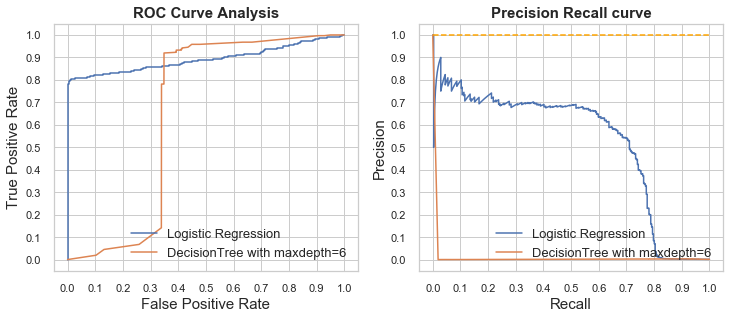

In [757]:
from pylab import *
sns.set(rc={"figure.figsize":(12,10)})
sns.set_style("whitegrid")
subplot(2,2,1)
plt.plot(fpr_lgr,tpr_lgr,label="Logistic Regression")
plt.plot(fpr_dtree,tpr_dtree,label="DecisionTree with maxdepth=6")
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

subplot(2,2,2)
plt.plot(recall_lgr,precision_lgr,label="Logistic Regression")
plt.plot(recall_dtree,precision_dtree,label="DecisionTree with maxdepth=6")

nokill=len(y_test[y_test==1])/len(y_test)
plt.plot([0,1],[nokill,nokill],color="orange",linestyle="--")

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=15)

plt.title('Precision Recall curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [758]:
import random
#setting seed=100
random.seed(100)
dtree_os=DecisionTreeClassifier(max_depth=4)

#fitting the model with no tuning of hyper parameters
dtree_os.fit(X_train_os,y_train_os)
#getting the predicted probabilities for test set
y_dtree_os_proba=dtree_os.predict_proba(X_test_os)[:,1]

#false positive rate , true positive rate values
fpr_dtree_os, tpr_dtree_os, _ = roc_curve(y_test_os,  y_dtree_os_proba)
#area under curve and receiver operating characteristics curve
auc_roc_dtree_os = roc_auc_score(y_test_os, y_dtree_os_proba)

#precision and recall of test data
precision_dtree_os, recall_dtree_os, _ = precision_recall_curve(y_test_os, y_dtree_os_proba)
auc_pr_dtree_os = auc(recall_dtree_os, precision_dtree_os)

#predicted output for test set
y_test_pred_dtree_os=dtree_os.predict(X_test_os)

#accuracy precision recall and F1 score for test set
acc_test_dtree_os=accuracy_score(y_test_os,y_test_pred_dtree_os)
precision_test_dtree_os=precision_score(y_test_os,y_test_pred_dtree_os,average="binary")
recall_test_dtree_os=recall_score(y_test_os,y_test_pred_dtree_os,average="binary")
f1_test_dtree_os=f1_score(y_test_os,y_test_pred_dtree_os,average="binary")
cm_test_dtree_os=confusion_matrix(y_test_os,y_test_pred_dtree_os)

#accuracy precision recall and F1 score for validation set
acc_cv_dtree_os = cross_val_score(dtree_os, X_val_os, y_val_os, cv=5)
precision_cv_dtree_os = cross_val_score(dtree_os, X_val_os, y_val_os, cv=5, scoring='precision')
recall_cv_dtree_os = cross_val_score(dtree_os, X_val_os, y_val_os, cv=5, scoring='recall')
f1_cv_dtree_os = cross_val_score(dtree_os, X_val_os, y_val_os, cv=5, scoring='f1')
#One time run On validation set
cm_val_dtree_os = confusion_matrix(y_val_os,dtree_os.predict(X_val_os))

print("Confusion Matrix : Decision tree For test set\n",cm_test_dtree_os)
print("Accuracy : ",acc_test_dtree_os)
print("Precision : ",precision_test_dtree_os)
print("Recall : ",recall_test_dtree_os)
print("F1 score : ",f1_test_dtree_os)
print("Confusion Matrix : Decision tree For Crossvalidation set\n",cm_val_dtree_os)
print("Accuracy : ",acc_cv_dtree_os)
print("Precision : ",precision_cv_dtree_os)
print("Recall : ",recall_cv_dtree_os)
print("F1 score : ",f1_cv_dtree_os)

Confusion Matrix : Decision tree For test set
 [[75632  7410]
 [ 2725 80080]]
Accuracy :  0.9388894583561957
Precision :  0.9153046062407132
Recall :  0.9670913592174386
F1 score :  0.94048562788103
Confusion Matrix : Decision tree For Crossvalidation set
 [[75288  7582]
 [ 2696 80281]]
Accuracy :  [0.93729273 0.9396744  0.9381953  0.93864753 0.93650698]
Precision :  [0.91313752 0.917501   0.91431664 0.91614268 0.91456366]
Recall :  [0.96661846 0.96631718 0.96709852 0.96577282 0.96306116]
F1 score :  [0.9391172  0.9412766  0.9399672  0.94030332 0.93818609]


In [759]:
#getting the predicted probabilities for test set
y_dtree_proba=dtree_os.predict_proba(X_test)

#false positive rate , true positive rate values
fpr_dtree, tpr_dtree, _ = roc_curve(y_test,  y_dtree_proba[:,1])
#area under curve and receiver operating characteristics curve
auc_roc_dtree = roc_auc_score(y_test, y_dtree_proba[:,1])

#precision and recall of test data
precision_dtree, recall_dtree, _ = precision_recall_curve(y_test, y_dtree_proba[:,1])
auc_pr_dtree = auc(recall_dtree, precision_dtree)

#predicted output for test set
y_test_pred_dtree=dtree_os.predict(X_test)

#accuracy precision recall and F1 score for test set
acc_test_dtree=accuracy_score(y_test,y_test_pred_dtree)
precision_test_dtree=precision_score(y_test,y_test_pred_dtree,average="binary")
recall_test_dtree=recall_score(y_test,y_test_pred_dtree,average="binary")
f1_test_dtree=f1_score(y_test,y_test_pred_dtree,average="binary")
cm_test_dtree=confusion_matrix(y_test,y_test_pred_dtree)

print("Confusion Matrix : Decision For test set\n",cm_test_dtree)
print("Accuracy : ",acc_test_dtree)
print("Precision : ",precision_test_dtree)
print("Recall : ",recall_test_dtree)
print("F1 score : ",f1_test_dtree)

Confusion Matrix : Decision For test set
 [[230602  26078]
 [    42    269]]
Accuracy :  0.8983621994544556
Precision :  0.010209891069191939
Recall :  0.864951768488746
F1 score :  0.020181559006677174


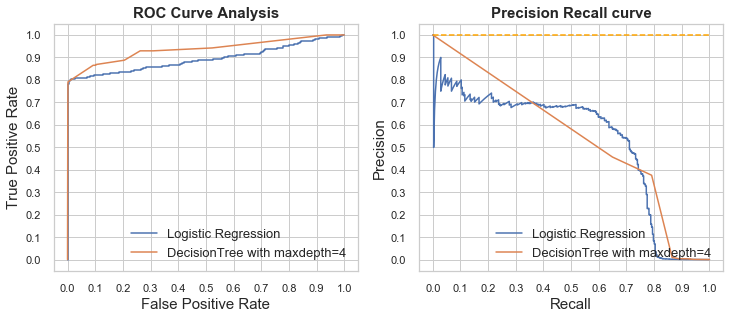

In [760]:
from pylab import *
sns.set(rc={"figure.figsize":(12,10)})
sns.set_style("whitegrid")
subplot(2,2,1)
plt.plot(fpr_lgr,tpr_lgr,label="Logistic Regression")
plt.plot(fpr_dtree,tpr_dtree,label="DecisionTree with maxdepth=4")
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

subplot(2,2,2)
plt.plot(recall_lgr,precision_lgr,label="Logistic Regression")
plt.plot(recall_dtree,precision_dtree,label="DecisionTree with maxdepth=4")

nokill=len(y_test[y_test==1])/len(y_test)
plt.plot([0,1],[nokill,nokill],color="orange",linestyle="--")

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=15)

plt.title('Precision Recall curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [761]:
import random
#setting seed=100
random.seed(100)
dtree_os=DecisionTreeClassifier(max_depth=12)

#fitting the model with no tuning of hyper parameters
dtree_os.fit(X_train_os,y_train_os)
#getting the predicted probabilities for test set
y_dtree_os_proba=dtree_os.predict_proba(X_test_os)[:,1]

#false positive rate , true positive rate values
fpr_dtree_os, tpr_dtree_os, _ = roc_curve(y_test_os,  y_dtree_os_proba)
#area under curve and receiver operating characteristics curve
auc_roc_dtree_os = roc_auc_score(y_test_os, y_dtree_os_proba)

#precision and recall of test data
precision_dtree_os, recall_dtree_os, _ = precision_recall_curve(y_test_os, y_dtree_os_proba)
auc_pr_dtree_os = auc(recall_dtree_os, precision_dtree_os)

#predicted output for test set
y_test_pred_dtree_os=dtree_os.predict(X_test_os)

#accuracy precision recall and F1 score for test set
acc_test_dtree_os=accuracy_score(y_test_os,y_test_pred_dtree_os)
precision_test_dtree_os=precision_score(y_test_os,y_test_pred_dtree_os,average="binary")
recall_test_dtree_os=recall_score(y_test_os,y_test_pred_dtree_os,average="binary")
f1_test_dtree_os=f1_score(y_test_os,y_test_pred_dtree_os,average="binary")
cm_test_dtree_os=confusion_matrix(y_test_os,y_test_pred_dtree_os)

#accuracy precision recall and F1 score for validation set
acc_cv_dtree_os = cross_val_score(dtree_os, X_val_os, y_val_os, cv=5)
precision_cv_dtree_os = cross_val_score(dtree_os, X_val_os, y_val_os, cv=5, scoring='precision')
recall_cv_dtree_os = cross_val_score(dtree_os, X_val_os, y_val_os, cv=5, scoring='recall')
f1_cv_dtree_os = cross_val_score(dtree_os, X_val_os, y_val_os, cv=5, scoring='f1')
#One time run On validation set
cm_val_dtree_os = confusion_matrix(y_val_os,dtree_os.predict(X_val_os))

print("Confusion Matrix : Decision tree For test set\n",cm_test_dtree_os)
print("Accuracy : ",acc_test_dtree_os)
print("Precision : ",precision_test_dtree_os)
print("Recall : ",recall_test_dtree_os)
print("F1 score : ",f1_test_dtree_os)
print("Confusion Matrix : Decision tree For Crossvalidation set\n",cm_val_dtree_os)
print("Accuracy : ",acc_cv_dtree_os)
print("Precision : ",precision_cv_dtree_os)
print("Recall : ",recall_cv_dtree_os)
print("F1 score : ",f1_cv_dtree_os)

Confusion Matrix : Decision tree For test set
 [[80377  2665]
 [ 2875 79930]]
Accuracy :  0.9665957177398445
Precision :  0.9677341243416672
Recall :  0.9652798744037195
F1 score :  0.9665054413542926
Confusion Matrix : Decision tree For Crossvalidation set
 [[80183  2687]
 [ 2734 80243]]
Accuracy :  [0.96183298 0.96204402 0.96107812 0.96336941 0.95908831]
Precision :  [0.95950324 0.96204591 0.95955529 0.96548592 0.9602513 ]
Recall :  [0.96378645 0.96221981 0.96233805 0.9606508  0.95781862]
F1 score :  [0.96160438 0.96213969 0.96120391 0.96337926 0.95894791]


In [762]:
#getting the predicted probabilities for test set
y_dtree_proba=dtree_os.predict_proba(X_test)

#false positive rate , true positive rate values
fpr_dtree, tpr_dtree, _ = roc_curve(y_test,  y_dtree_proba[:,1])
#area under curve and receiver operating characteristics curve
auc_roc_dtree = roc_auc_score(y_test, y_dtree_proba[:,1])

#precision and recall of test data
precision_dtree, recall_dtree, _ = precision_recall_curve(y_test, y_dtree_proba[:,1])
auc_pr_dtree = auc(recall_dtree, precision_dtree)

#predicted output for test set
y_test_pred_dtree=dtree_os.predict(X_test)

#accuracy precision recall and F1 score for test set
acc_test_dtree=accuracy_score(y_test,y_test_pred_dtree)
precision_test_dtree=precision_score(y_test,y_test_pred_dtree,average="binary")
recall_test_dtree=recall_score(y_test,y_test_pred_dtree,average="binary")
f1_test_dtree=f1_score(y_test,y_test_pred_dtree,average="binary")
cm_test_dtree=confusion_matrix(y_test,y_test_pred_dtree)

print("Confusion Matrix : Decision For test set\n",cm_test_dtree)
print("Accuracy : ",acc_test_dtree)
print("Precision : ",precision_test_dtree)
print("Recall : ",recall_test_dtree)
print("F1 score : ",f1_test_dtree)

Confusion Matrix : Decision For test set
 [[133278 123402]
 [    19    292]]
Accuracy :  0.5197458276748991
Precision :  0.0023606642197681374
Recall :  0.9389067524115756
F1 score :  0.004709487520664489


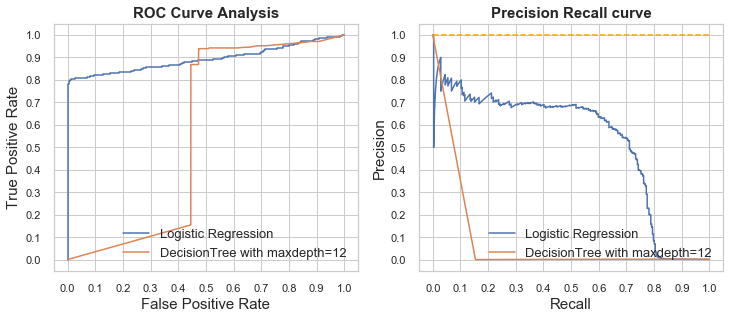

In [763]:
from pylab import *
sns.set(rc={"figure.figsize":(12,10)})
sns.set_style("whitegrid")
subplot(2,2,1)
plt.plot(fpr_lgr,tpr_lgr,label="Logistic Regression")
plt.plot(fpr_dtree,tpr_dtree,label="DecisionTree with maxdepth=12")
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

subplot(2,2,2)
plt.plot(recall_lgr,precision_lgr,label="Logistic Regression")
plt.plot(recall_dtree,precision_dtree,label="DecisionTree with maxdepth=12")

nokill=len(y_test[y_test==1])/len(y_test)
plt.plot([0,1],[nokill,nokill],color="orange",linestyle="--")

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=15)

plt.title('Precision Recall curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

There is not much improvement after oversampling on the predictions. Therefore we try for random forest to better predicts.

In [764]:
from sklearn.ensemble import RandomForestClassifier
import random
#setting seed=100
random.seed(100)
rfc_os=RandomForestClassifier()

#fitting the model with no tuning of hyper parameters
rfc_os.fit(X_train_os,y_train_os)
#getting the predicted probabilities for test set
y_rfc_os_proba=rfc_os.predict_proba(X_test_os)[:,1]

#false positive rate , true positive rate values
fpr_rfc_os, tpr_rfc_os, _ = roc_curve(y_test_os,  y_rfc_os_proba)
#area under curve and receiver operating characteristics curve
auc_roc_rfc_os = roc_auc_score(y_test_os, y_rfc_os_proba)

#precision and recall of test data
precision_rfc_os, recall_rfc_os, _ = precision_recall_curve(y_test_os, y_rfc_os_proba)
auc_pr_rfc_os = auc(recall_rfc_os, precision_rfc_os)

#predicted output for test set
y_test_pred_rfc_os=rfc_os.predict(X_test_os)

#accuracy precision recall and F1 score for test set
acc_test_rfc_os=accuracy_score(y_test_os,y_test_pred_rfc_os)
precision_test_rfc_os=precision_score(y_test_os,y_test_pred_rfc_os,average="binary")
recall_test_rfc_os=recall_score(y_test_os,y_test_pred_rfc_os,average="binary")
f1_test_rfc_os=f1_score(y_test_os,y_test_pred_rfc_os,average="binary")
cm_test_rfc_os=confusion_matrix(y_test_os,y_test_pred_rfc_os)

#accuracy precision recall and F1 score for validation set
acc_cv_rfc_os = cross_val_score(rfc_os, X_val_os, y_val_os, cv=5)
precision_cv_rfc_os = cross_val_score(rfc_os, X_val_os, y_val_os, cv=5, scoring='precision')
recall_cv_rfc_os = cross_val_score(rfc_os, X_val_os, y_val_os, cv=5, scoring='recall')
f1_cv_rfc_os = cross_val_score(rfc_os, X_val_os, y_val_os, cv=5, scoring='f1')
#One time run On validation set
cm_val_rfc_os = confusion_matrix(y_val_os,rfc_os.predict(X_val_os))

print("Confusion Matrix : Random Forest For test set\n",cm_test_rfc_os)
print("Accuracy : ",acc_test_rfc_os)
print("Precision : ",precision_test_rfc_os)
print("Recall : ",recall_test_rfc_os)
print("F1 score : ",f1_test_rfc_os)
print("Confusion Matrix : Random Forest For Crossvalidation set\n",cm_test_rfc_os)
print("Accuracy : ",acc_cv_rfc_os)
print("Precision : ",precision_cv_rfc_os)
print("Recall : ",recall_cv_rfc_os)
print("F1 score : ",f1_cv_rfc_os)

Confusion Matrix : Random Forest For test set
 [[81832  1210]
 [    8 82797]]
Accuracy :  0.9926558816258358
Precision :  0.9855964383920388
Recall :  0.9999033874766017
F1 score :  0.9926983670239552
Confusion Matrix : Random Forest For Crossvalidation set
 [[81832  1210]
 [    8 82797]]
Accuracy :  [0.965511   0.96647573 0.96508788 0.96650487 0.96376134]
Precision :  [0.95671404 0.95418456 0.95435269 0.95743799 0.95485886]
Recall :  [0.97589781 0.97662087 0.97999397 0.97788491 0.97643869]
F1 score :  [0.96573042 0.96366556 0.96621783 0.96624196 0.96509069]


In [765]:
#getting the predicted probabilities for test set
y_rfc_proba=rfc_os.predict_proba(X_test)

#false positive rate , true positive rate values
fpr_rfc, tpr_rfc, _ = roc_curve(y_test,  y_rfc_proba[:,1])
#area under curve and receiver operating characteristics curve
auc_roc_rfc = roc_auc_score(y_test, y_rfc_proba[:,1])

#precision and recall of test data
precision_rfc, recall_rfc, _ = precision_recall_curve(y_test, y_rfc_proba[:,1])
auc_pr_rfc = auc(recall_rfc, precision_rfc)

#predicted output for test set
y_test_pred_rfc=rfc_os.predict(X_test)

#accuracy precision recall and F1 score for test set
acc_test_rfc=accuracy_score(y_test,y_test_pred_rfc)
precision_test_rfc=precision_score(y_test,y_test_pred_rfc,average="binary")
recall_test_rfc=recall_score(y_test,y_test_pred_rfc,average="binary")
f1_test_rfc=f1_score(y_test,y_test_pred_rfc,average="binary")
cm_test_rfc=confusion_matrix(y_test,y_test_pred_rfc)

print("Confusion Matrix : Random Forest For test set\n",cm_test_rfc)
print("Accuracy : ",acc_test_rfc)
print("Precision : ",precision_test_rfc)
print("Recall : ",recall_test_rfc)
print("F1 score : ",f1_test_rfc)

Confusion Matrix : Random Forest For test set
 [[250957   5723]
 [    85    226]]
Accuracy :  0.9773999867699648
Precision :  0.03798957808034964
Recall :  0.7266881028938906
F1 score :  0.07220447284345048


Even the Random forest is not working well on the test set. Even if it does a good job on the training set. 

Therefore using the Logistic regression model as it consistently gives better results than decision trees and random forest.

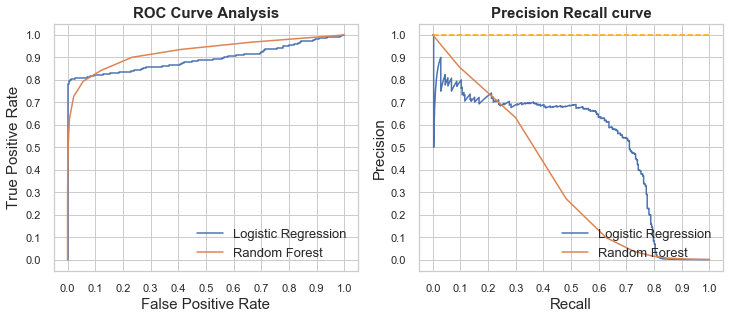

In [766]:
from pylab import *
sns.set(rc={"figure.figsize":(12,10)})
sns.set_style("whitegrid")
subplot(2,2,1)
plt.plot(fpr_lgr,tpr_lgr,label="Logistic Regression")
plt.plot(fpr_rfc,tpr_rfc,label="Random Forest")
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

subplot(2,2,2)
plt.plot(recall_lgr,precision_lgr,label="Logistic Regression")
plt.plot(recall_rfc,precision_rfc,label="Random Forest")

nokill=len(y_test[y_test==1])/len(y_test)
plt.plot([0,1],[nokill,nokill],color="orange",linestyle="--")

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=15)

plt.title('Precision Recall curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()


In [768]:
import random
#setting seed=100
random.seed(100)
lgr_s=LogisticRegression(penalty='l1')

#fitting the model with no tuning of hyper parameters
lgr_s.fit(X_train_s,y_train_s)
#getting the predicted probabilities for test set
y_lgr_s_proba=lgr_s.predict_proba(X_test_s)[:,1]

#false positive rate , true positive rate values
fpr_lgr_s, tpr_lgr_s, _ = roc_curve(y_test_s,  y_lgr_s_proba)
#area under curve and receiver operating characteristics curve
auc_roc_lgr_s = roc_auc_score(y_test_s, y_lgr_s_proba)

#precision and recall of test data
precision_lgr_s, recall_lgr_s, _ = precision_recall_curve(y_test_s, y_lgr_s_proba)
auc_pr_lgr_s = auc(recall_lgr_s, precision_lgr_s)

#predicted output for test set
y_test_pred_lgr_s=lgr_s.predict(X_test_s)

#accuracy precision recall and F1 score for test set
acc_test_lgr_s=accuracy_score(y_test_s,y_test_pred_lgr_s)
precision_test_lgr_s=precision_score(y_test_s,y_test_pred_lgr_s,average="binary")
recall_test_lgr_s=recall_score(y_test_s,y_test_pred_lgr_s,average="binary")
f1_test_lgr_s=f1_score(y_test_s,y_test_pred_lgr_s,average="binary")
cm_test_lgr_s=confusion_matrix(y_test_s,y_test_pred_lgr_s)

#accuracy precision recall and F1 score for validation set
acc_cv_lgr_s = cross_val_score(lgr_s, X_val_s, y_val_s, cv=5)
precision_cv_lgr_s = cross_val_score(lgr_s, X_val_s, y_val_s, cv=5, scoring='precision')
recall_cv_lgr_s = cross_val_score(lgr_s, X_val_s, y_val_s, cv=5, scoring='recall')
f1_cv_lgr_s = cross_val_score(lgr_s, X_val_s, y_val_s, cv=5, scoring='f1')
#One time run On validation set
cm_val_lgr_s = confusion_matrix(y_val_s,lgr_s.predict(X_val_s))

print("Confusion Matrix : Logistic Regression For test set\n",cm_test_lgr_s)
print("Accuracy : ",acc_test_lgr_s)
print("Precision : ",precision_test_lgr_s)
print("Recall : ",recall_test_lgr_s)
print("F1 score : ",f1_test_lgr_s)
print("Confusion Matrix : Logistic Regression For Crossvalidation set\n",cm_val_lgr_s)
print("Accuracy : ",acc_cv_lgr_s)
print("Precision : ",precision_cv_lgr_s)
print("Recall : ",recall_cv_lgr_s)
print("F1 score : ",f1_cv_lgr_s)

Confusion Matrix : Logistic Regression For test set
 [[82048   876]
 [ 3099  3824]]
Accuracy :  0.955758122140973
Precision :  0.8136170212765957
Recall :  0.552361692907699
F1 score :  0.6580056783962832
Confusion Matrix : Logistic Regression For Crossvalidation set
 [[82035   888]
 [ 3153  3771]]
Accuracy :  [0.95614914 0.95409015 0.9556483  0.95586844 0.95347284]
Precision :  [0.81886388 0.80482456 0.80144778 0.81041667 0.78781513]
Recall :  [0.55018051 0.52924188 0.56245487 0.56173285 0.54263006]
F1 score :  [0.65889465 0.63968668 0.66128347 0.66154503 0.64300983]


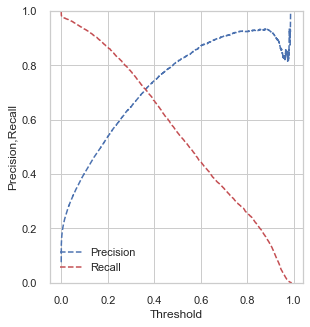

In [770]:
def plot_threshold_precision_recall_curve_v2(y_p,y_proba):
    precision, recall, thresholds = precision_recall_curve(y_p,y_proba)
    plt.title("Precision-Recall vs Threshold Chart")
    subplot(1,2,1)
    plt.plot(thresholds, precision[: -1],"b--", label="Precision")
    plt.ylabel("Precision,Recall")
    plt.xlabel("Threshold")
    plt.plot(thresholds, recall[: -1], "r--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="lower left")
    plt.ylim([0,1])
sns.set(rc={"figure.figsize":(10,5)})
sns.set_style("whitegrid")
subplot(2,2,1)
plot_threshold_precision_recall_curve_v2(y_test_s,y_lgr_s_proba)

In [771]:
#getting the predicted probabilities for test set
y_lgr_proba=lgr_s.predict_proba(X_test)

#false positive rate , true positive rate values
fpr_lgr, tpr_lgr, _ = roc_curve(y_test,  y_lgr_proba[:,1])
#area under curve and receiver operating characteristics curve
auc_roc_lgr = roc_auc_score(y_test, y_lgr_proba[:,1])

#precision and recall of test data
precision_lgr, recall_lgr, _ = precision_recall_curve(y_test, y_lgr_proba[:,1])
auc_pr_lgr = auc(recall_lgr, precision_lgr)

#predicted output for test set
y_test_pred_lgr=np.where(y_lgr_proba[:,1]<0.38,0,1)

#accuracy precision recall and F1 score for test set
acc_test_lgr=accuracy_score(y_test,y_test_pred_lgr)
precision_test_lgr=precision_score(y_test,y_test_pred_lgr,average="binary")
recall_test_lgr=recall_score(y_test,y_test_pred_lgr,average="binary")
f1_test_lgr=f1_score(y_test,y_test_pred_lgr,average="binary")
cm_test_lgr=confusion_matrix(y_test,y_test_pred_lgr)

print("Confusion Matrix : Logistic regression For test set\n",cm_test_lgr)
print("Accuracy : ",acc_test_lgr)
print("Precision : ",precision_test_lgr)
print("Recall : ",recall_test_lgr)
print("F1 score : ",f1_test_lgr)

Confusion Matrix : Logistic regression For test set
 [[255952    728]
 [    78    233]]
Accuracy :  0.9968637033981734
Precision :  0.24245577523413112
Recall :  0.7491961414790996
F1 score :  0.36635220125786166
